<a href="https://colab.research.google.com/github/vnthoai/BigData-BI_L01_N19/blob/main/BigData%26BI_L01_N19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===== Section 0: Install & Global Config =====
!pip -q install pandas numpy scikit-learn matplotlib seaborn category-encoders

import os, glob, warnings, numpy as np, pandas as pd
warnings.filterwarnings("ignore")

# Hiển thị đẹp
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)
np.random.seed(42)

print("Ready ✅  |  PWD:", os.getcwd())
print("Files here:", os.listdir("."))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00
Ready ✅  |  PWD: /content
Files here: ['.config', 'Social Media Engagement Dataset.csv', 'sample_data']


In [ ]:
# ===== Section 1: Resolve DATA_PATH (fixed & robust) =====
import os, glob

# In thông tin giúp kiểm tra nhanh
print("PWD:", os.getcwd())
print("Files in /content:", os.listdir("/content"))

# 1) Ưu tiên đúng tên file chuẩn nếu có
exact = "/content/Social Media Engagement Dataset.csv"
if os.path.isfile(exact):
    DATA_PATH = exact
else:
    # 2) Tìm kiếm linh hoạt theo pattern (không dùng flags)
    #    - tìm *.csv ở /content và thư mục hiện tại
    #    - nếu bạn đã mount Drive, cũng tìm sâu trong MyDrive
    search_spaces = [
        "/content/*.csv",
        "./*.csv",
        "/content/drive/MyDrive/**/*.csv",   # sẽ bỏ qua nếu Drive chưa mount
    ]
    candidates = []
    for patt in search_spaces:
        candidates.extend(glob.glob(patt, recursive=True))

    # Lọc những file có tên chứa các từ khoá mong đợi (không phân biệt hoa/thường)
    def looks_like_target(path):
        name = os.path.basename(path).lower()
        return all(k in name for k in ["social", "media", "engagement", "dataset"])

    candidates = [p for p in candidates if os.path.isfile(p) and looks_like_target(p)]

    if candidates:
        # Ưu tiên file nằm trong /content và đường dẫn ngắn hơn
        candidates.sort(key=lambda p: (not p.startswith("/content/"), len(p)))
        DATA_PATH = candidates[0]
    else:
        # 3) Fallback: đặt tay hoặc báo lỗi gợi ý
        DATA_PATH = "/content/Social Media Engagement Dataset.csv"  # chỉnh lại nếu tên khác

assert os.path.exists(DATA_PATH), (
    f"Không tìm thấy file: {DATA_PATH}.\n"
    "→ Kiểm tra tên file trong khung Files (bên trái) và sửa DATA_PATH cho đúng."
)
print("Using file:", DATA_PATH)

PWD: /content
Files in /content: ['.config', 'Social Media Engagement Dataset.csv', 'sample_data']
Using file: /content/Social Media Engagement Dataset.csv


In [ ]:
# ===== Section 2: Load & Quick Look =====
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head(5))
display(df.dtypes)

print("\nThiếu dữ liệu (top 10):")
display(df.isna().sum().sort_values(ascending=False).head(10))

print("Số bản ghi trùng lặp:", df.duplicated().sum())

Shape: (12000, 28)


post_id            timestamp day_of_week   platform        user_id              location language                                       text_content  \
0  kcqbs6hxybia  2024-12-09 11:26:15      Monday  Instagram  user_52nwb0a6  Melbourne, Australia       pt  Just tried the Chromebook from Google. Best pu...   
1  vkmervg4ioos  2024-07-28 19:59:26      Sunday    Twitter  user_ucryct98          Tokyo, Japan       ru  Just saw an ad for Microsoft Surface Laptop du...   
2  memhx4o1x6yu  2024-11-23 14:00:12    Saturday     Reddit  user_7rrev126        Beijing, China       ru  What's your opinion about Nike's Epic React?  ...   
3  bhyo6piijqt9  2024-09-16 04:35:25      Monday    YouTube  user_4mxuq0ax        Lagos, Nigeria       en  Bummed out with my new Diet Pepsi from Pepsi! ...   
4  c9dkiomowakt  2024-09-05 21:03:01    Thursday    Twitter  user_l1vpox2k       Berlin, Germany       hi  Just tried the Corolla from Toyota. Absolutely...   

                   hashtags                        mentions                               keywords topic_category  sentiment_score sentiment_label  \
0                     #Food                             NaN  price, unique, traditional, efficient        Pricing           0.9826        Positive   
1          #MustHave, #Food     @CustomerService, @BrandCEO                         delivery, slow       Delivery          -0.3793        Negative   
2  #Promo, #Food, #Trending                             NaN  reliable, budget, durable, experience        Product          -0.3596        Negative   
3    #Reviews, #Sustainable      @StyleGuide, @BrandSupport    improved, competitive, luxury, fast       Delivery          -0.7282        Negative   
4          #Health, #Travel  @BrandSupport, @InfluencerName    innovation, budget, helpful, luxury        Product           0.5460        Positive   

  emotion_type  toxicity_score  likes_count  shares_count  comments_count  impressions  engagement_rate brand_name    product_name     campaign_name  \
0     Confused          0.0376         1264          1704             701        18991          0.19319     Google      Chromebook       BlackFriday   
1        Angry          0.9715          522          1803             359        52764          0.05086  Microsoft  Surface Laptop      PowerRelease   
2     Confused          0.5124         2689           705             643         8887          0.45425       Nike      Epic React       BlackFriday   
3          Sad          0.4002         1827           262             743         6696          0.42293      Pepsi      Diet Pepsi        LaunchWave   
4        Happy          0.0862         2005          1443             703        47315          0.08773     Toyota         Corolla  LocalTouchpoints   

  campaign_phase  user_past_sentiment_avg  user_engagement_growth  buzz_change_rate  
0         Launch                   0.0953                 -0.3672              19.1  
1    Post-Launch                   0.1369                 -0.4510             -42.6  
2    Post-Launch                   0.2855                 -0.4112              17.4  
3         Launch                  -0.2094                 -0.0167              -5.5  
4         Launch                   0.6867                  0.0807              38.8

post_id                     object
timestamp                   object
day_of_week                 object
platform                    object
user_id                     object
location                    object
language                    object
text_content                object
hashtags                    object
mentions                    object
keywords                    object
topic_category              object
sentiment_score            float64
sentiment_label             object
emotion_type                object
toxicity_score             float64
likes_count                  int64
shares_count                 int64
comments_count               int64
impressions                  int64
engagement_rate            float64
brand_name                  object
product_name                object
campaign_name               object
campaign_phase              object
user_past_sentiment_avg    float64
user_engagement_growth     float64
buzz_change_rate           float64
dtype: object


Thiếu dữ liệu (top 10):


mentions        3941
post_id            0
day_of_week        0
timestamp          0
platform           0
user_id            0
language           0
location           0
text_content       0
hashtags           0
dtype: int64

Số bản ghi trùng lặp: 0


In [ ]:
# ===== Section 3: Time Features =====
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['year']      = df['timestamp'].dt.year
    df['month']     = df['timestamp'].dt.month
    df['dayofweek'] = df['timestamp'].dt.dayofweek  # 0=Mon
    df['hour']      = df['timestamp'].dt.hour

print("Thêm đặc trưng thời gian xong.")
cols_show = [c for c in ['timestamp','year','month','dayofweek','hour'] if c in df.columns]
display(df[cols_show].head())

Thêm đặc trưng thời gian xong.


timestamp  year  month  dayofweek  hour
0 2024-12-09 11:26:15  2024     12          0    11
1 2024-07-28 19:59:26  2024      7          6    19
2 2024-11-23 14:00:12  2024     11          5    14
3 2024-09-16 04:35:25  2024      9          0     4
4 2024-09-05 21:03:01  2024      9          3    21

In [ ]:
# ===== Section 4: Leakage Check & Targets =====
for c in ['likes_count','shares_count','comments_count','impressions']:
    assert c in df.columns, f"Thiếu cột {c}."

df['engagement_events'] = df['likes_count'] + df['shares_count'] + df['comments_count']
df['calc_rate'] = df['engagement_events'] / df['impressions'].replace(0, np.nan)

if 'engagement_rate' in df.columns:
    diff = (df['engagement_rate'] - df['calc_rate']).abs()
    print("Median |engagement_rate - calc_rate|:", diff.median())
    print("95th  |...|:", diff.quantile(0.95))

print("Tỉ lệ mẫu có calc_rate > 1:", round((df['calc_rate']>1).mean()*100, 2), "%")

# Tạo nhãn "viral" theo top 10% engagement_events
pct = 0.10
thr = df['engagement_events'].quantile(1 - pct)
df['is_viral'] = (df['engagement_events'] >= thr).astype(int)
print("Ngưỡng viral:", thr)
display(df['is_viral'].value_counts(normalize=True))

Median |engagement_rate - calc_rate|: 5.016679158295623e-06
95th  |...|: 9.49847768499136e-06
Tỉ lệ mẫu có calc_rate > 1: 4.06 %
Ngưỡng viral: 6130.0


is_viral
0    0.899667
1    0.100333
Name: proportion, dtype: float64

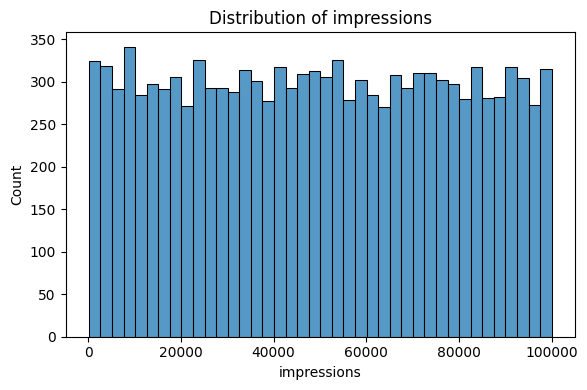

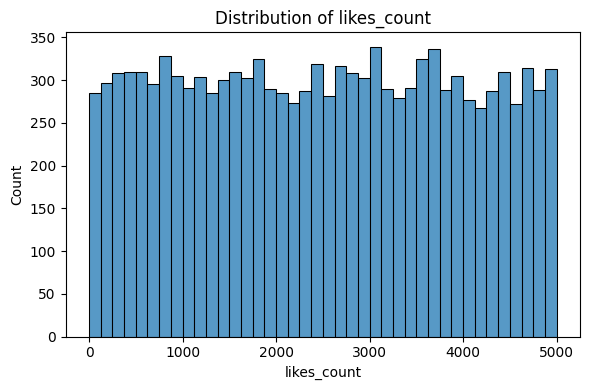

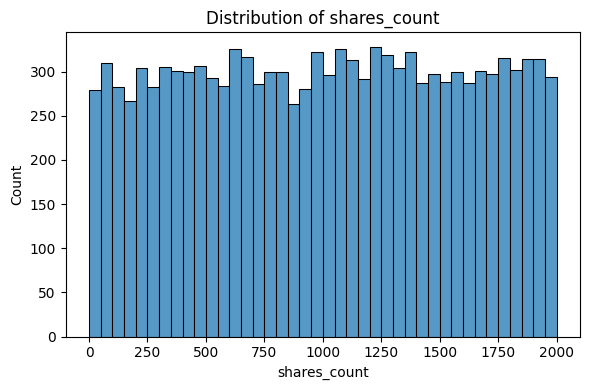

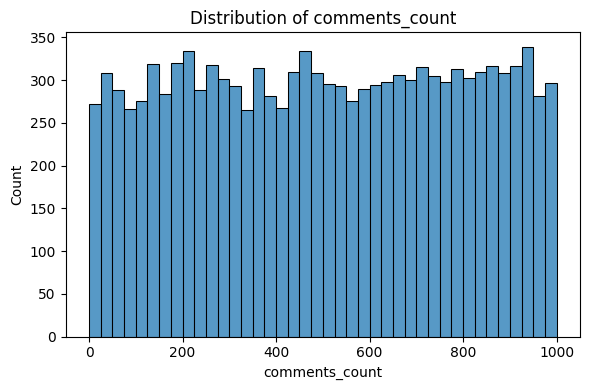

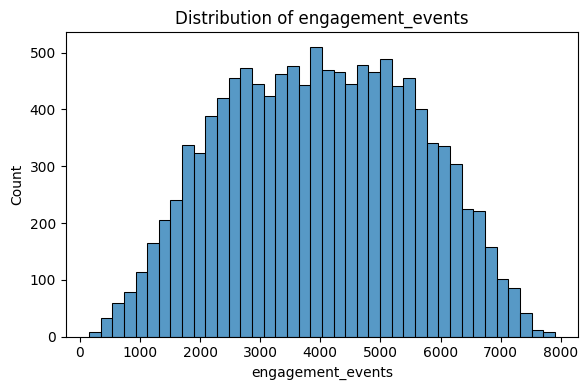

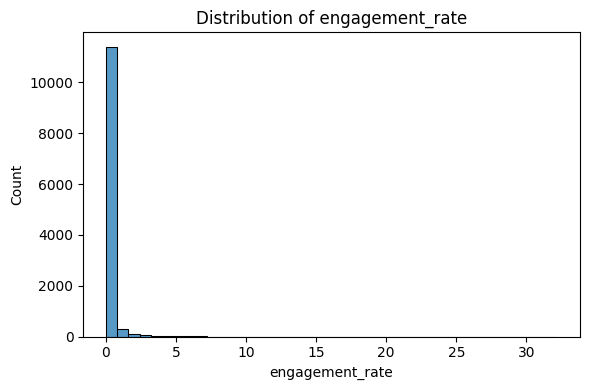

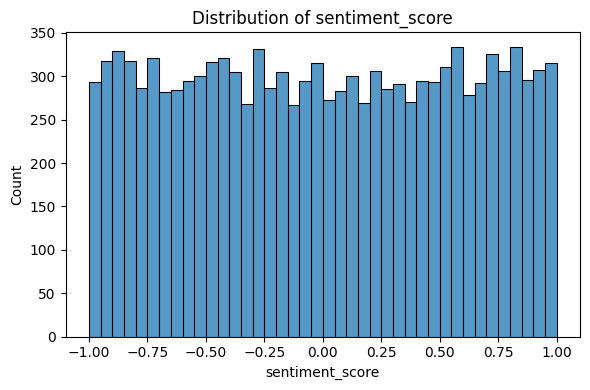

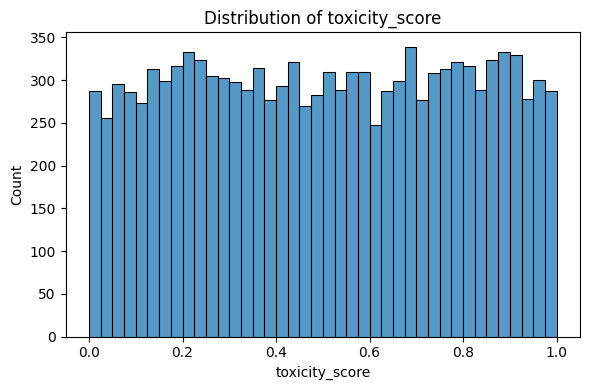

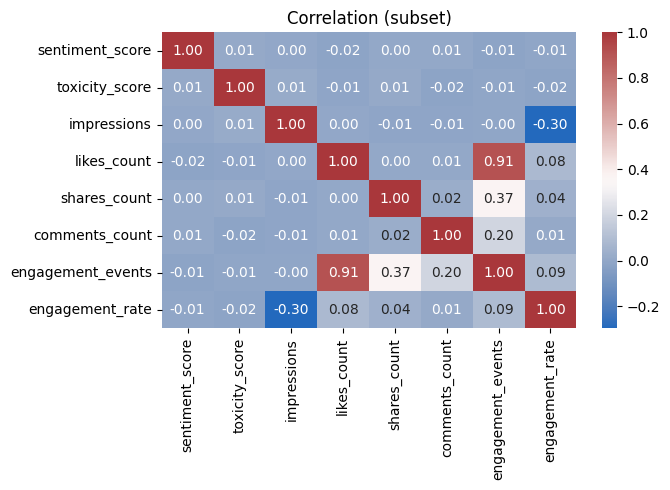

In [ ]:
# ===== Section 5: EDA (Distributions & Correlation) =====
import matplotlib.pyplot as plt
import seaborn as sns

num_candidates = ['impressions','likes_count','shares_count','comments_count',
                  'engagement_events','engagement_rate','sentiment_score','toxicity_score']
plot_cols = [c for c in num_candidates if c in df.columns]

for c in plot_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[c].dropna(), bins=40)
    plt.title(f"Distribution of {c}")
    plt.tight_layout()
    plt.show()

corr_cols = [c for c in ['sentiment_score','toxicity_score','impressions','likes_count',
                         'shares_count','comments_count','engagement_events','engagement_rate'] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr(numeric_only=True)
    plt.figure(figsize=(7,5))
    sns.heatmap(corr, annot=True, cmap="vlag", fmt=".2f")
    plt.title("Correlation (subset)")
    plt.tight_layout()
    plt.show()

In [ ]:
# ===== Section 6: Basic Cleaning =====
# Fill NA cho cột text thường gặp
for c in ['mentions','hashtags','keywords','text_content']:
    if c in df.columns:
        df[c] = df[c].fillna('')

# Winsorize nhẹ tránh đỉnh quá cao (99.5%)
for c in ['impressions','likes_count','shares_count','comments_count','engagement_events']:
    if c in df.columns:
        cap = df[c].quantile(0.995)
        df[c] = np.minimum(df[c], cap)

# (Tuỳ chọn) lọc tỉ lệ > 1 (gần thực tế hơn)
FILTER_RATE_GT1 = False
if FILTER_RATE_GT1 and 'calc_rate' in df.columns:
    before = len(df)
    df = df[df['calc_rate'] <= 1].copy()
    print(f"Đã loại {before-len(df)} dòng do calc_rate > 1")

print("Cleaning xong. Shape:", df.shape)

Cleaning xong. Shape: (12000, 35)


In [ ]:
# ===== Section 7: Lightweight Text Features =====
import re

if 'text_content' in df.columns:
    df['text_len'] = df['text_content'].str.len().fillna(0)
    df['n_words']  = df['text_content'].str.split().apply(lambda x: len(x) if isinstance(x, list) else 0)
    df['has_url']  = df['text_content'].str.contains(r'https?://', regex=True, na=False).astype(int)

if 'hashtags' in df.columns:
    df['n_hashtags'] = df['hashtags'].str.count(r'#').fillna(0)

if 'mentions' in df.columns:
    df['n_mentions'] = df['mentions'].str.count(r'@').fillna(0)

print("Text features done.")

Text features done.


In [ ]:
# ===== Section 8: Time-based Split =====
if 'timestamp' in df.columns:
    df = df.sort_values('timestamp')
else:
    df = df.sample(frac=1.0, random_state=42)  # fallback nếu không có thời gian

split_idx = int(len(df) * 0.8)
train_df, test_df = df.iloc[:split_idx].copy(), df.iloc[split_idx:].copy()
print("Train/Test shapes:", train_df.shape, test_df.shape)

Train/Test shapes: (9600, 40) (2400, 40)


In [ ]:
# ===== Section 9: Feature Selection & Preprocessing =====
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

target = 'is_viral'

feature_num = [c for c in [
    'impressions','sentiment_score','toxicity_score',
    'likes_count','shares_count','comments_count','engagement_events',
    'user_past_sentiment_avg','user_engagement_growth','buzz_change_rate',
    'hour','dayofweek','text_len','n_words','n_hashtags','n_mentions','has_url'
] if c in df.columns]

feature_cat = [c for c in ['platform','topic_category','language','campaign_phase'] if c in df.columns]

X_train = train_df[feature_num + feature_cat]
y_train = train_df[target]
X_test  = test_df[feature_num + feature_cat]
y_test  = test_df[target]

pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), feature_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), feature_cat),
    ],
    remainder='drop'
)

print("Số đặc trưng số:", len(feature_num), "| phân loại:", len(feature_cat))

Số đặc trưng số: 17 | phân loại: 4


=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.998     0.997     0.998      2164
           1      0.975     0.983     0.979       236

    accuracy                          0.996      2400
   macro avg      0.986     0.990     0.988      2400
weighted avg      0.996     0.996     0.996      2400

ROC-AUC: 0.9998766408722077


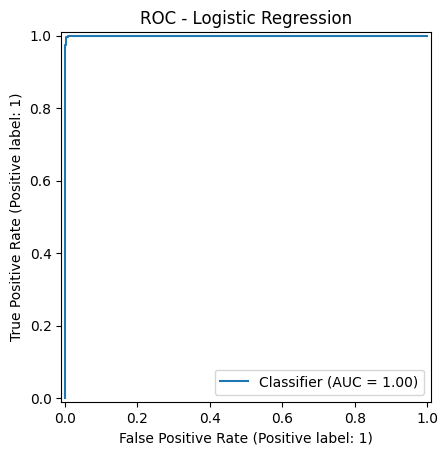


=== Random Forest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      2164
           1      1.000     1.000     1.000       236

    accuracy                          1.000      2400
   macro avg      1.000     1.000     1.000      2400
weighted avg      1.000     1.000     1.000      2400

ROC-AUC: 1.0


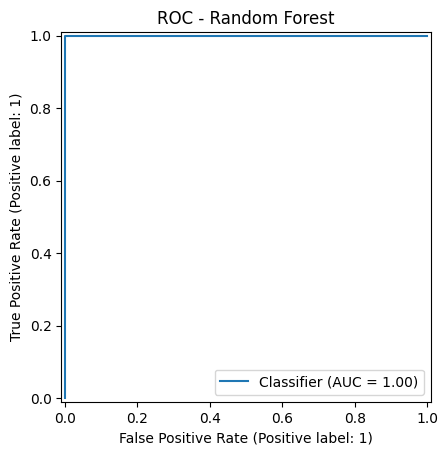

In [ ]:
# ===== Section 10: Baseline Models =====
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# 10.1 Logistic Regression
logit = Pipeline([
    ('prep', pre),
    ('model', LogisticRegression(max_iter=300))
])
logit.fit(X_train, y_train)
proba_lr = logit.predict_proba(X_test)[:,1]
pred_lr  = (proba_lr >= 0.5).astype(int)
print("=== Logistic Regression ===")
print(classification_report(y_test, pred_lr, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, proba_lr))

RocCurveDisplay.from_predictions(y_test, proba_lr)
plt.title("ROC - Logistic Regression")
plt.show()

# 10.2 Random Forest
rf = Pipeline([
    ('prep', pre),
    ('model', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
])
rf.fit(X_train, y_train)
proba_rf = rf.predict_proba(X_test)[:,1]
pred_rf  = (proba_rf >= 0.5).astype(int)
print("\n=== Random Forest ===")
print(classification_report(y_test, pred_rf, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, proba_rf))

RocCurveDisplay.from_predictions(y_test, proba_rf)
plt.title("ROC - Random Forest")
plt.show()

In [ ]:
# ===== Section 11: Poisson Regression (Optional) =====
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, r2_score

reg_target = 'engagement_events'
feature_num_reg = [c for c in feature_num if c != 'engagement_events']

Xtr = train_df[feature_num_reg + feature_cat]
Xte = test_df[feature_num_reg + feature_cat]
ytr = train_df[reg_target]
yte = test_df[reg_target]

pre_reg = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), feature_num_reg),
        ('cat', OneHotEncoder(handle_unknown='ignore'), feature_cat),
    ],
    remainder='drop'
)

pois = Pipeline([
    ('prep', pre_reg),
    ('model', PoissonRegressor(alpha=1e-4, max_iter=1000))
])
pois.fit(Xtr, ytr)
pred_cnt = pois.predict(Xte)

print("=== Poisson Regression (engagement_events) ===")
print("MAE:", mean_absolute_error(yte, pred_cnt))
print("R^2:", r2_score(yte, pred_cnt))

=== Poisson Regression (engagement_events) ===
MAE: 270.2253131142423
R^2: 0.9491425029058588


In [ ]:
# ===== Section 12: Save Outputs =====
os.makedirs("outputs", exist_ok=True)

# Lưu test set + xác suất/nhãn dự đoán
out = test_df[['post_id','timestamp','platform','engagement_events','is_viral']].copy()
out['proba_viral_logit'] = proba_lr
out['proba_viral_rf']    = proba_rf
out_path = "outputs/predictions_test.csv"
out.to_csv(out_path, index=False)

# Lưu snapshot dữ liệu đã xử lý
df.to_csv("outputs/social_media_processed.csv", index=False)

print("Saved:")
print(" -", out_path)
print(" - outputs/social_media_processed.csv")

Saved:
 - outputs/predictions_test.csv
 - outputs/social_media_processed.csv


In [ ]:
# ===== V0: Viz setup =====
# Section V0 – Cài thêm thư viện & setup style
!pip -q install seaborn missingno plotly

import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

plt.rcParams["figure.figsize"] = (7,4.5)
plt.rcParams["axes.grid"] = True
sns.set_theme(style="whitegrid")

os.makedirs("outputs/figures", exist_ok=True)

def savefig(name):
    path = f"outputs/figures/{name}"
    plt.tight_layout()
    plt.savefig(path, dpi=160, bbox_inches="tight")
    print("Saved ->", path)

(12000, 40)

post_id                            object
timestamp                  datetime64[ns]
day_of_week                        object
platform                           object
user_id                            object
location                           object
language                           object
text_content                       object
hashtags                           object
mentions                           object
keywords                           object
topic_category                     object
sentiment_score                   float64
sentiment_label                    object
emotion_type                       object
toxicity_score                    float64
likes_count                       float64
shares_count                      float64
comments_count                    float64
impressions                       float64
engagement_rate                   float64
brand_name                         object
product_name                       object
campaign_name                      object
campaign_phase                     object
user_past_sentiment_avg           float64
user_engagement_growth            float64
buzz_change_rate                  float64
year                                int32
month                               int32
dayofweek                           int32
hour                                int32
engagement_events                 float64
calc_rate                         float64
is_viral                            int64
text_len                            int64
n_words                             int64
has_url                             int64
n_hashtags                          int64
n_mentions                          int64
dtype: object

post_id            0
timestamp          0
day_of_week        0
platform           0
user_id            0
location           0
language           0
text_content       0
hashtags           0
mentions           0
keywords           0
topic_category     0
sentiment_score    0
sentiment_label    0
emotion_type       0
toxicity_score     0
likes_count        0
shares_count       0
comments_count     0
impressions        0
dtype: int64

Saved -> outputs/figures/missing_top20.png


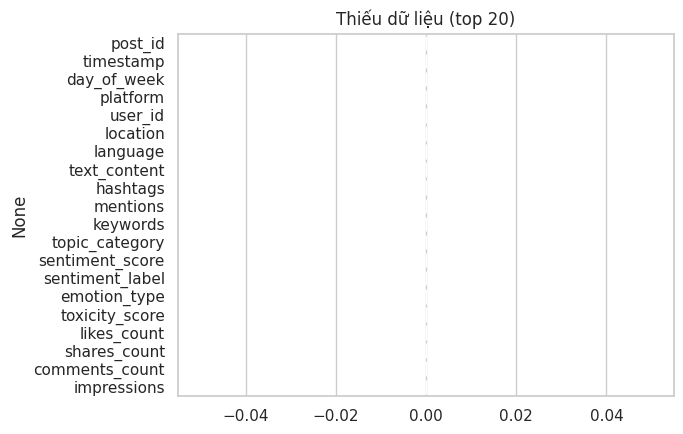

Saved -> outputs/figures/missing_matrix.png


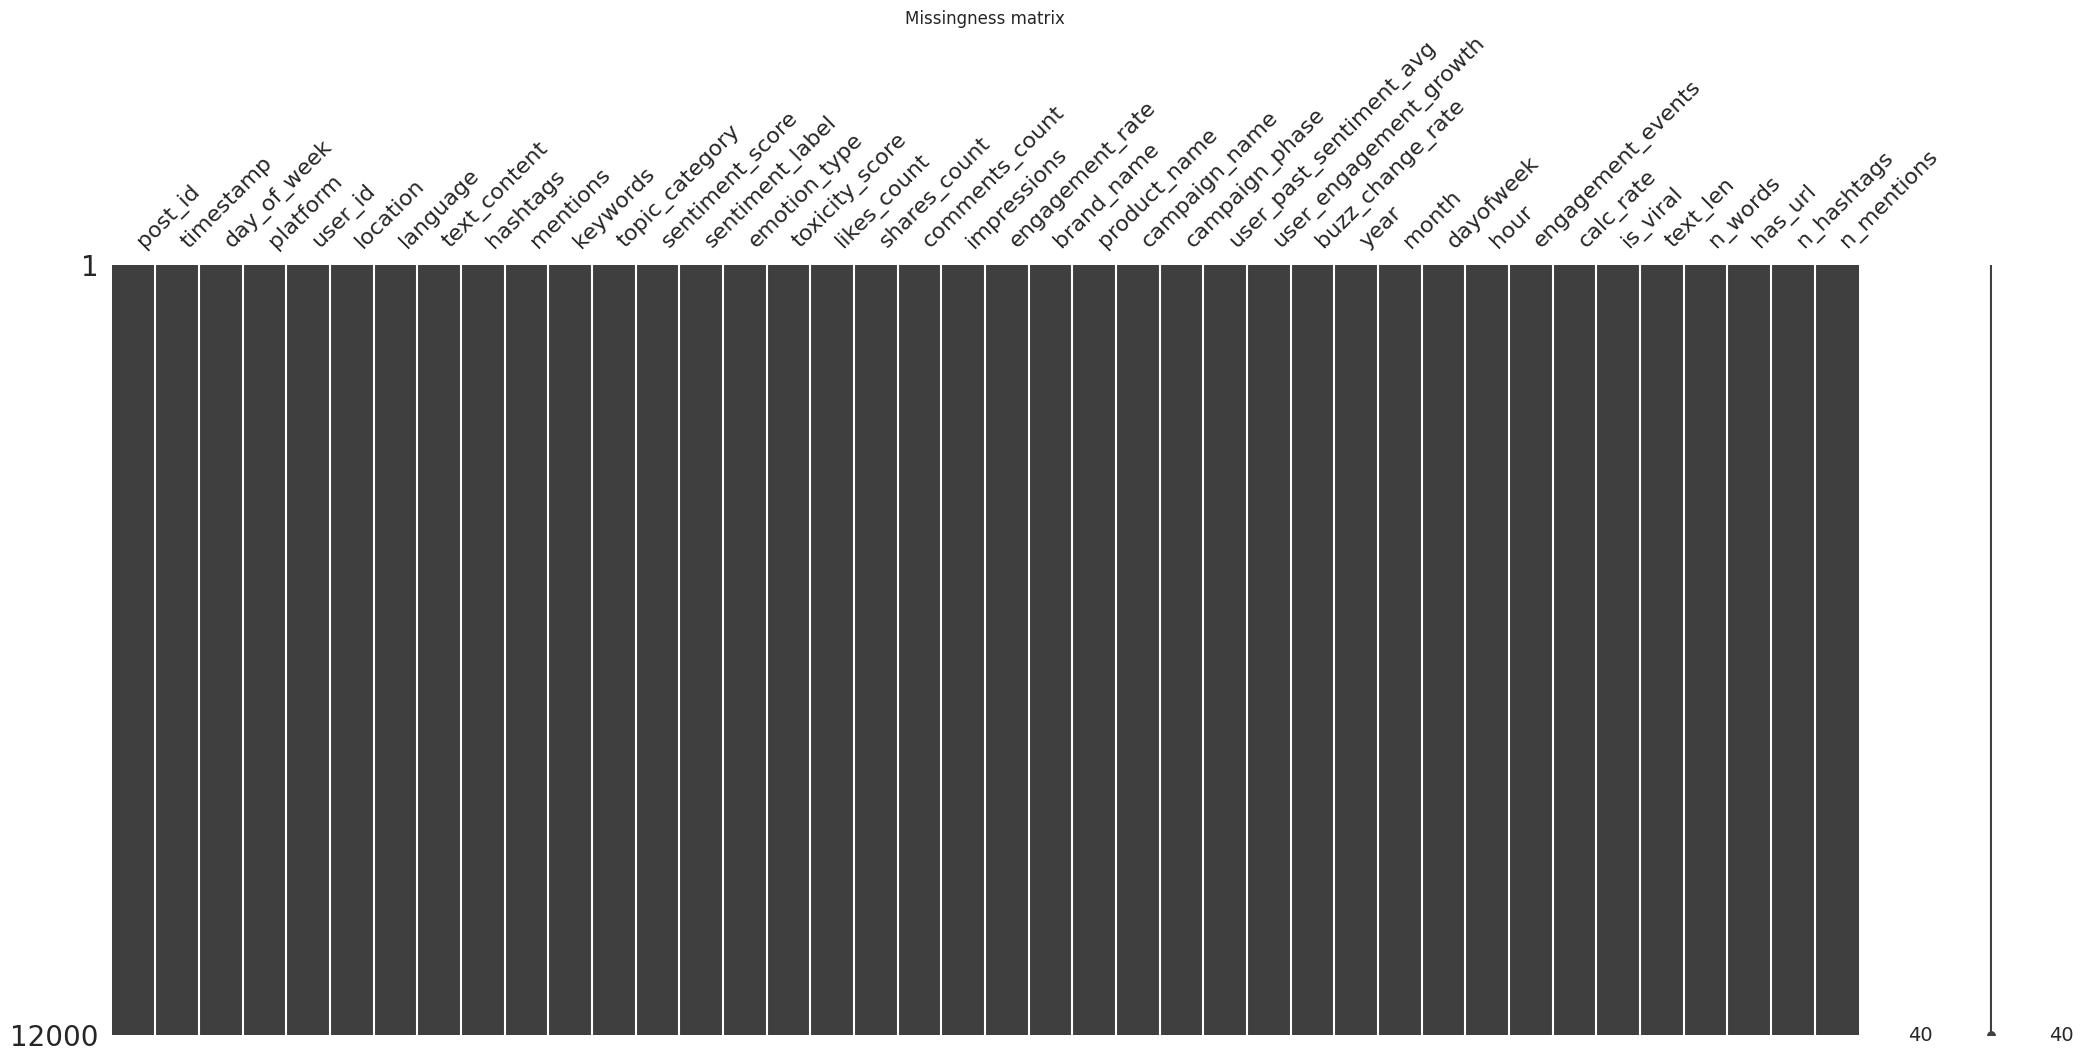

Saved -> outputs/figures/dist_impressions.png


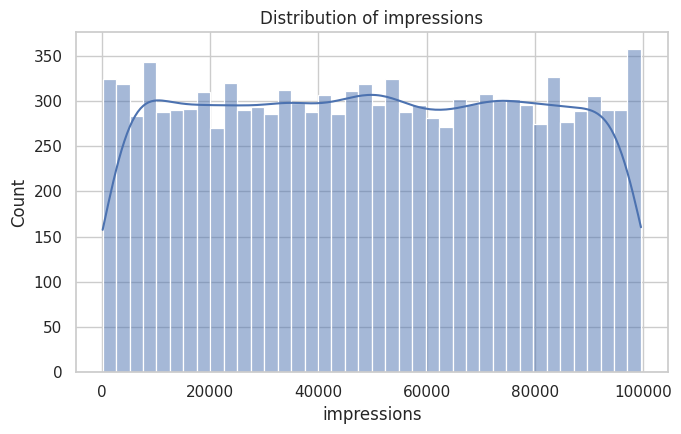

Saved -> outputs/figures/dist_likes_count.png


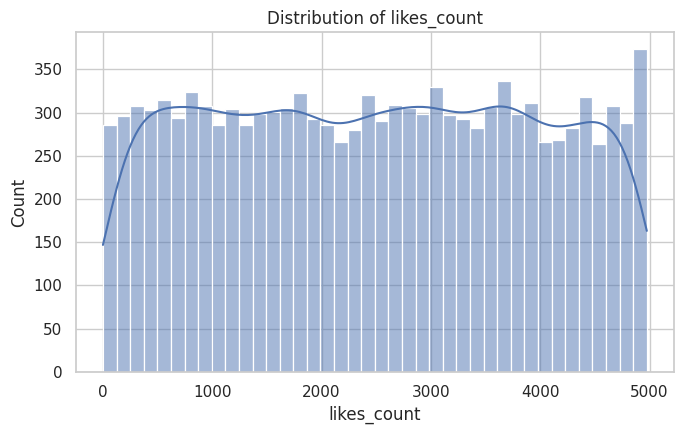

Saved -> outputs/figures/dist_shares_count.png


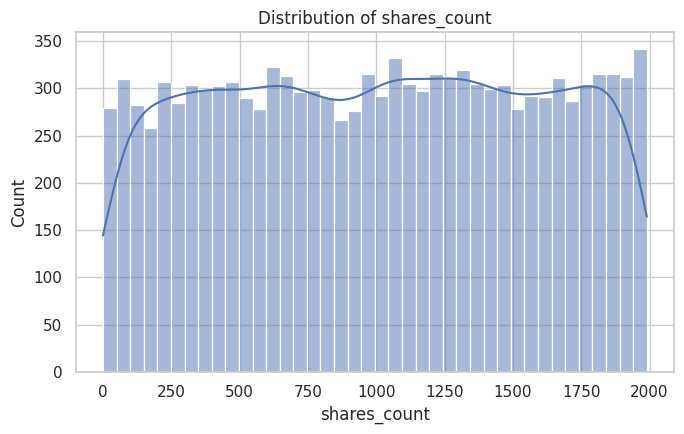

Saved -> outputs/figures/dist_comments_count.png


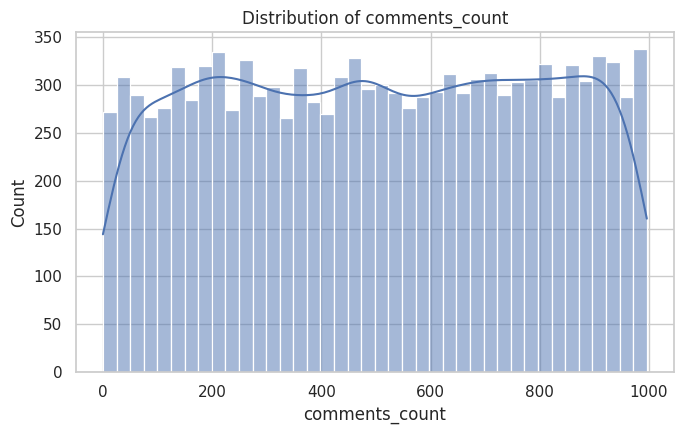

Saved -> outputs/figures/dist_engagement_events.png


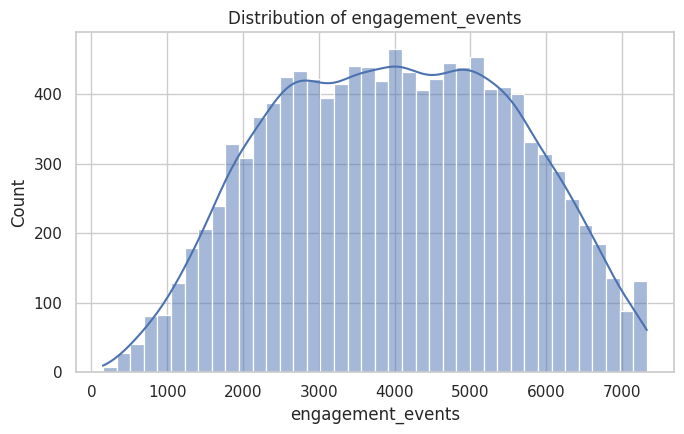

Saved -> outputs/figures/dist_engagement_rate.png


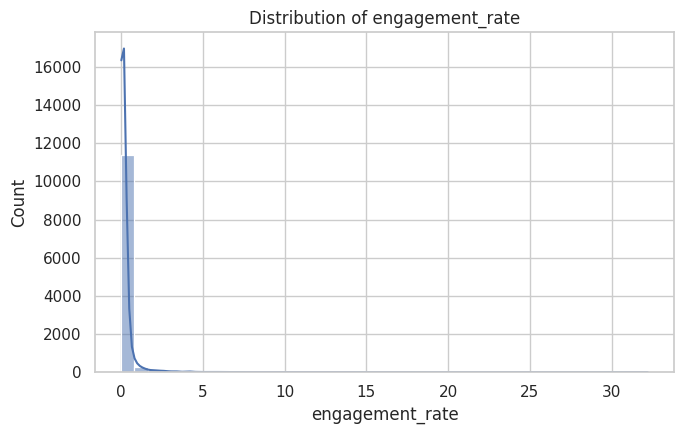

Saved -> outputs/figures/dist_sentiment_score.png


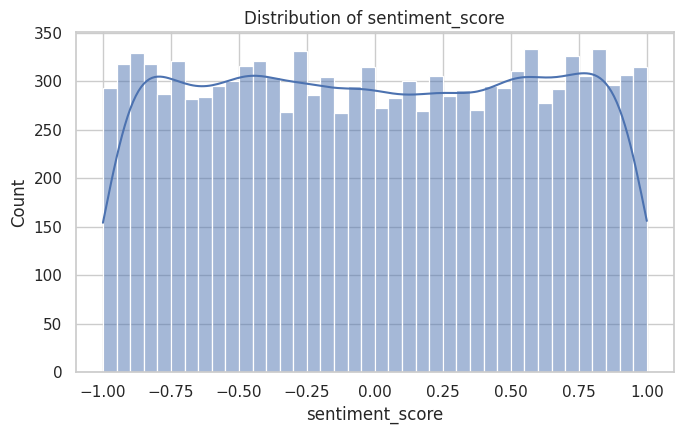

Saved -> outputs/figures/dist_toxicity_score.png


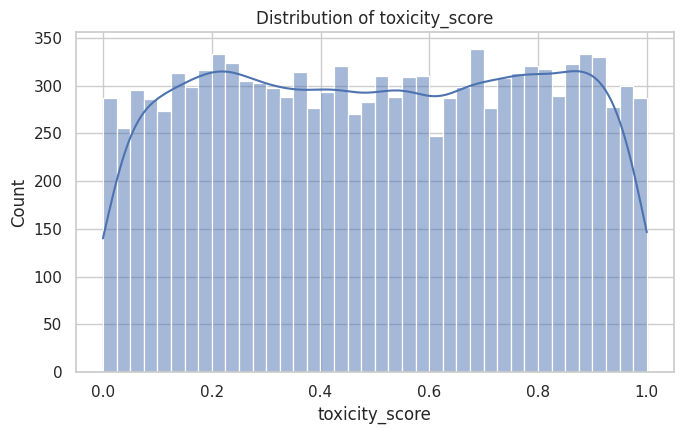

Saved -> outputs/figures/box_impressions.png


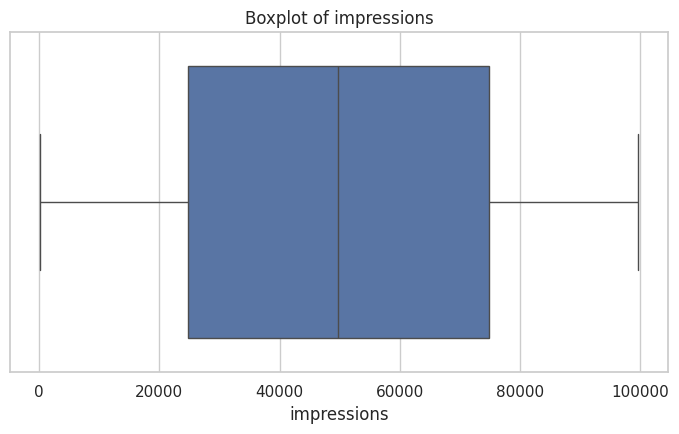

Saved -> outputs/figures/box_likes_count.png


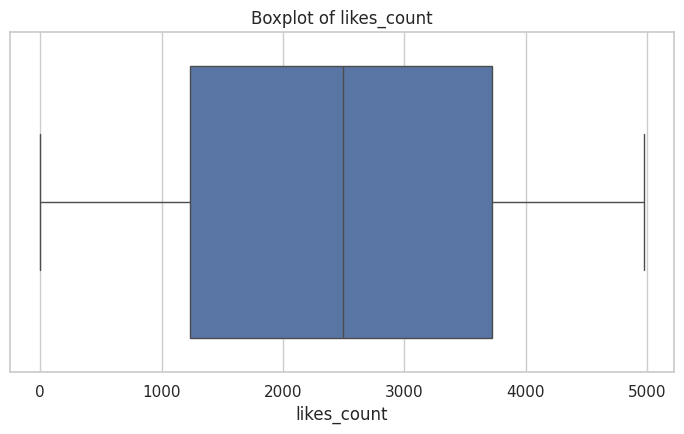

Saved -> outputs/figures/box_shares_count.png


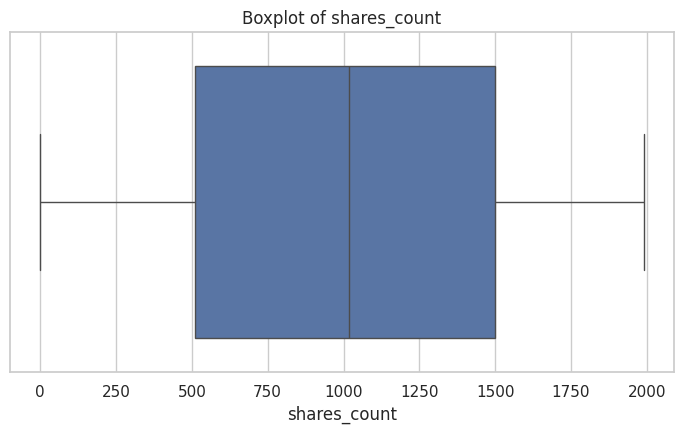

Saved -> outputs/figures/box_comments_count.png


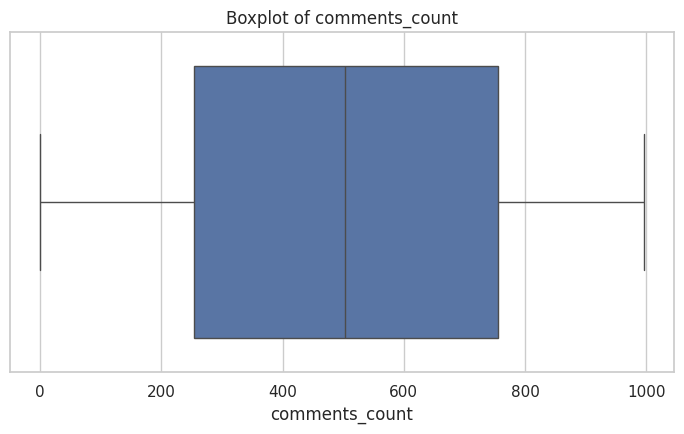

Saved -> outputs/figures/box_engagement_events.png


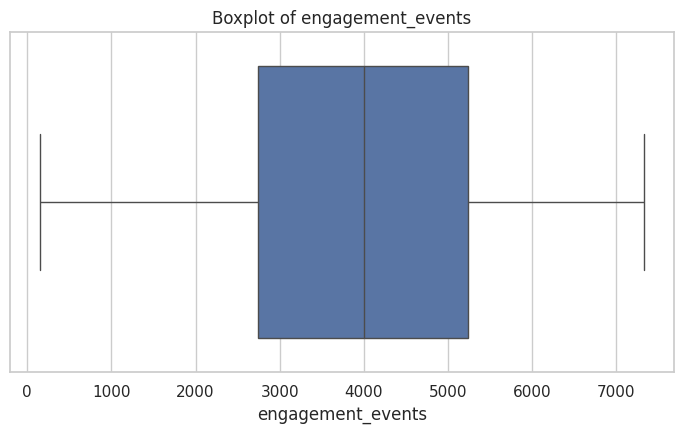

Saved -> outputs/figures/box_engagement_rate.png


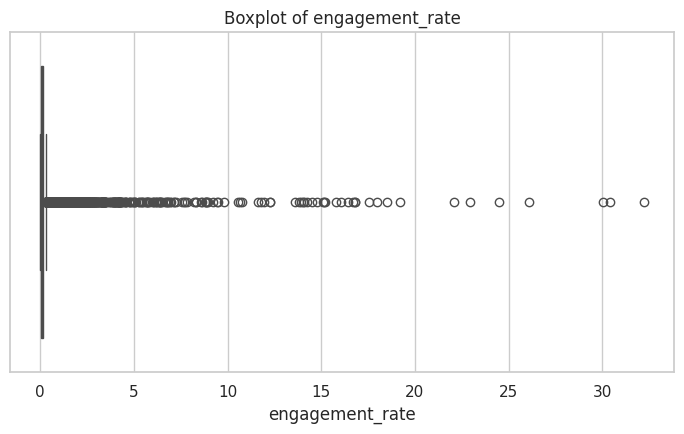

Saved -> outputs/figures/box_sentiment_score.png


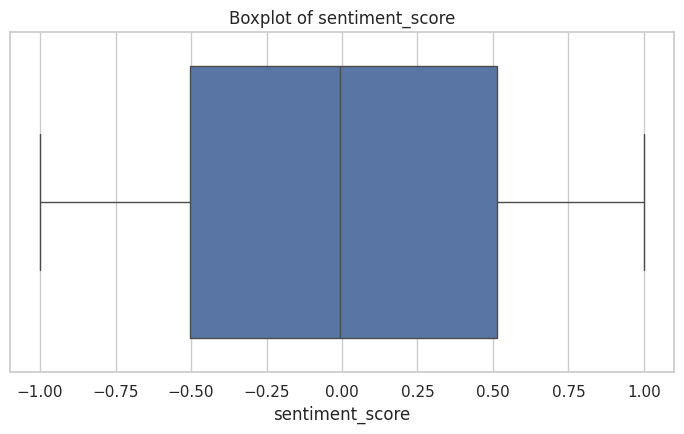

Saved -> outputs/figures/box_toxicity_score.png


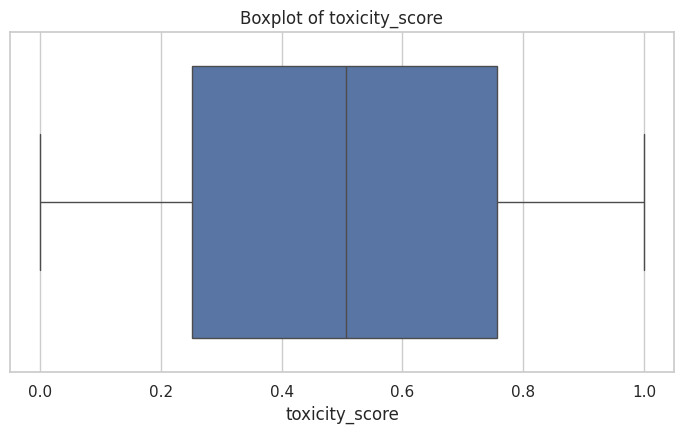

Saved -> outputs/figures/ecdf_impressions.png


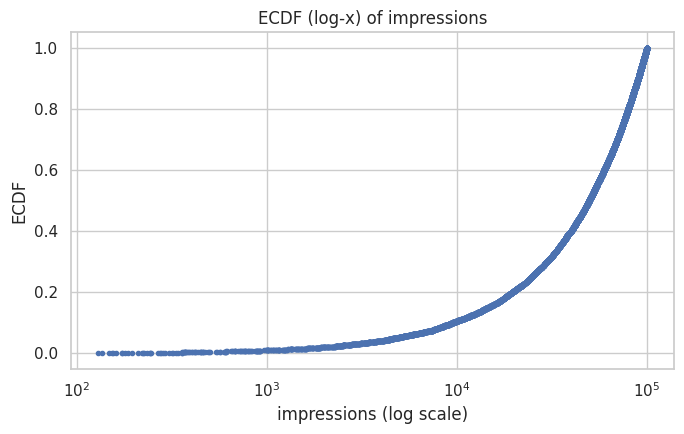

Saved -> outputs/figures/ecdf_engagement_events.png


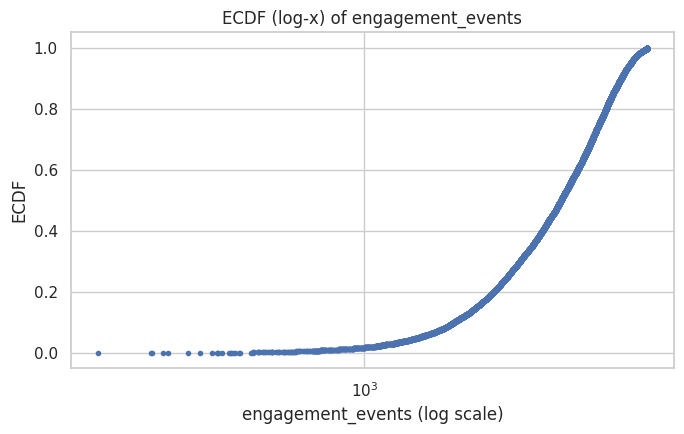

In [ ]:
# ===== V1: Missingness & Univariate =====
# Section V1 – Tổng quan thiếu dữ liệu, phân phối & outlier
display(df.shape, df.dtypes)

# 1) Missing overview (bảng + barplot)
na_cnt = df.isna().sum().sort_values(ascending=False)
display(na_cnt.head(20))
plt.figure()
sns.barplot(x=na_cnt.head(20).values, y=na_cnt.head(20).index, orient="h")
plt.title("Thiếu dữ liệu (top 20)")
savefig("missing_top20.png")
plt.show()

# 2) Ma trận missing (nếu < 40 cột)
if df.shape[1] <= 40:
    msno.matrix(df)
    plt.title("Missingness matrix")
    savefig("missing_matrix.png")
    plt.show()

# 3) Phân phối các biến số phổ biến
num_cols = df.select_dtypes(include=np.number).columns.tolist()
focus = [c for c in ['impressions','likes_count','shares_count','comments_count',
                     'engagement_events','engagement_rate','sentiment_score','toxicity_score'] if c in num_cols]
for c in focus:
    fig, ax = plt.subplots()
    sns.histplot(df[c].dropna(), bins=40, kde=True, ax=ax)
    ax.set_title(f"Distribution of {c}")
    savefig(f"dist_{c}.png")
    plt.show()

# 4) Boxplot để nhìn outlier (đếm & rate)
for c in [x for x in focus if x in df]:
    fig, ax = plt.subplots()
    sns.boxplot(x=df[c].dropna(), ax=ax)
    ax.set_title(f"Boxplot of {c}")
    savefig(f"box_{c}.png")
    plt.show()

# 5) Bản đồ ECDF cho biến đếm (nhìn heavy-tail)
for c in [x for x in ['impressions','engagement_events'] if x in df]:
    s = df[c].dropna().sort_values()
    y = np.arange(1, len(s)+1)/len(s)
    plt.figure()
    plt.plot(s, y, marker=".", linestyle="none")
    plt.xscale("log")
    plt.xlabel(c + " (log scale)")
    plt.ylabel("ECDF")
    plt.title(f"ECDF (log-x) of {c}")
    savefig(f"ecdf_{c}.png")
    plt.show()

Saved -> outputs/figures/corr_subset.png


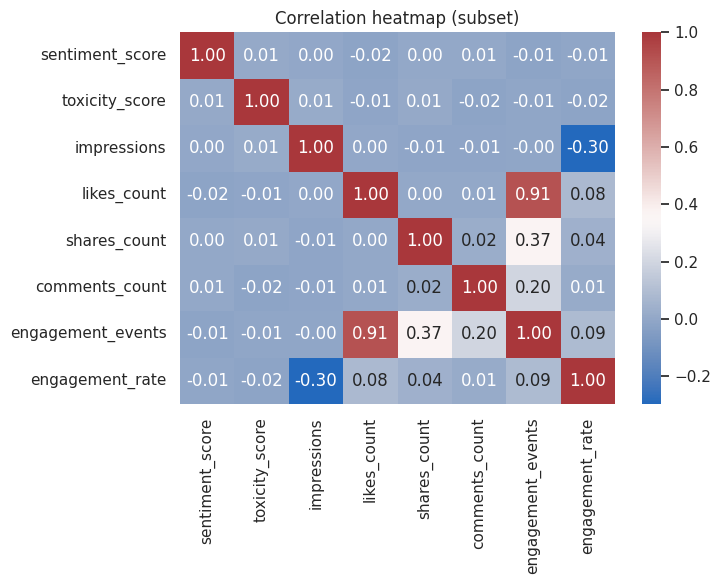

Saved -> outputs/figures/hex_impr_vs_eng_events.png


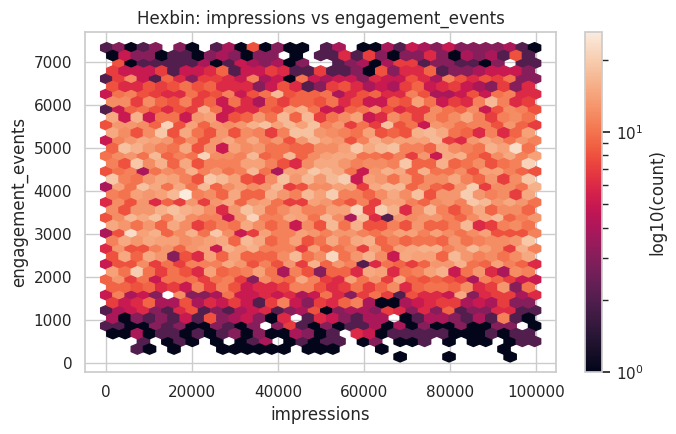

Saved -> outputs/figures/pairplot_sample.png


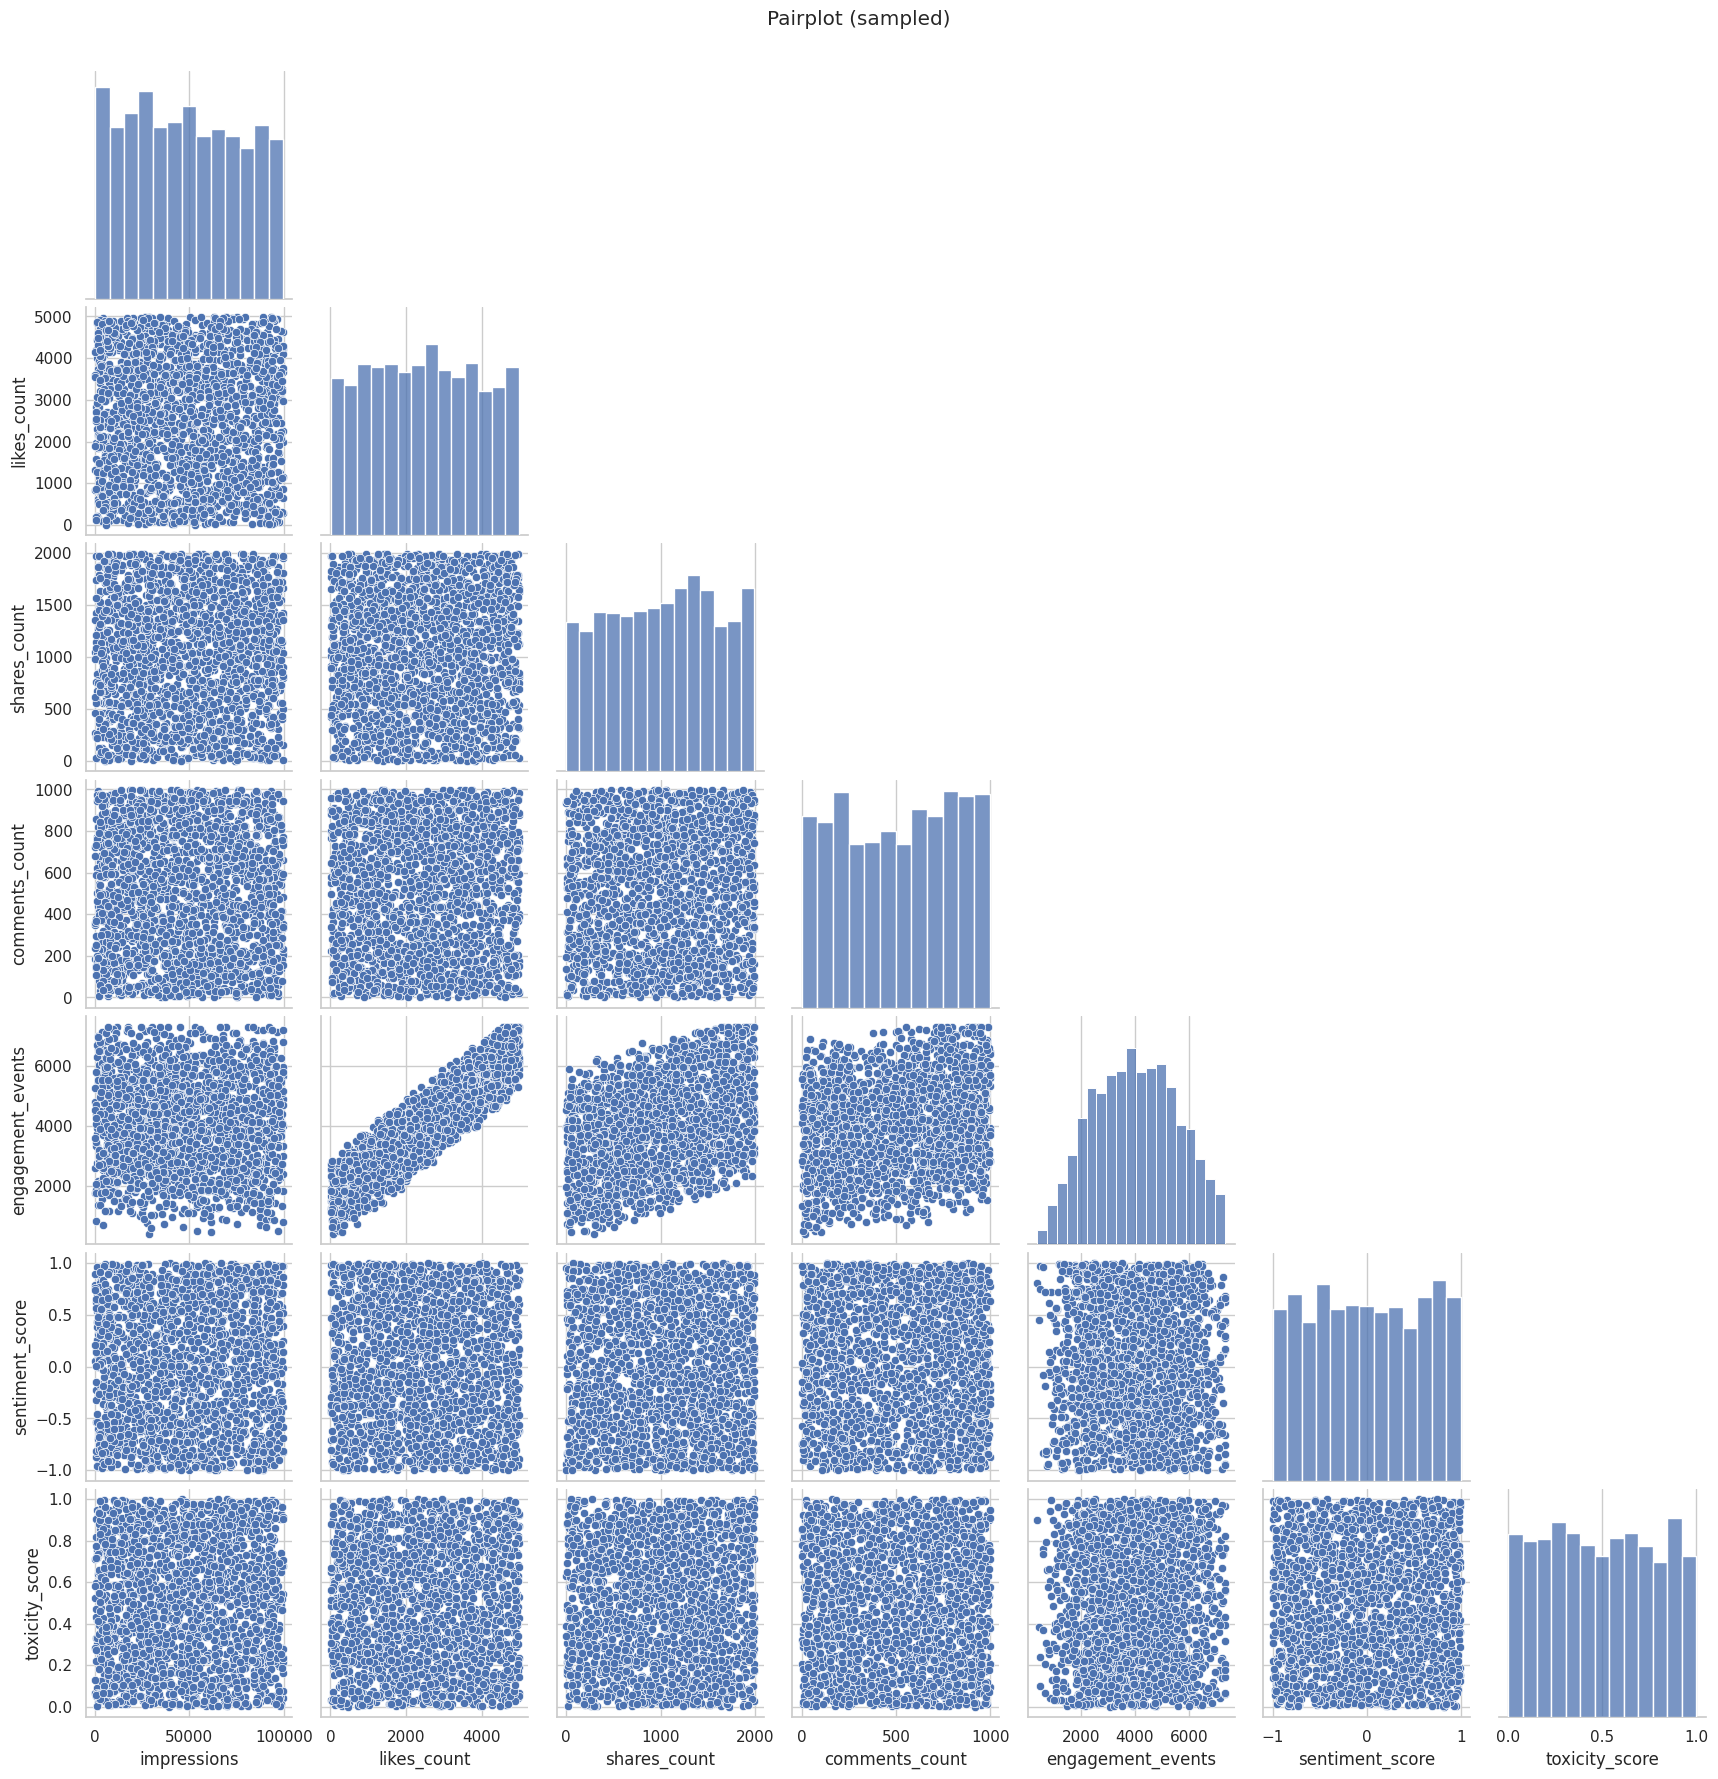

In [ ]:
# ===== V2: Correlation & Pairwise =====
# Section V2 – Quan hệ giữa biến số & heatmap tương quan
corr_cols = [c for c in ['sentiment_score','toxicity_score','impressions','likes_count',
                         'shares_count','comments_count','engagement_events','engagement_rate'] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr(numeric_only=True)
    plt.figure(figsize=(7.5,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag")
    plt.title("Correlation heatmap (subset)")
    savefig("corr_subset.png")
    plt.show()

# Scatter/hexbin để nhìn quan hệ với impressions
if {'impressions','engagement_events'}.issubset(df.columns):
    # hexbin (matplotlib)
    plt.figure()
    plt.hexbin(df['impressions'], df['engagement_events'], gridsize=35, bins='log')
    plt.xlabel("impressions")
    plt.ylabel("engagement_events")
    plt.title("Hexbin: impressions vs engagement_events")
    plt.colorbar(label="log10(count)")
    savefig("hex_impr_vs_eng_events.png")
    plt.show()

# Pairplot (giới hạn 2k mẫu để nhẹ)
sub = df.sample(min(len(df), 2000), random_state=42)
pp_cols = [c for c in ['impressions','likes_count','shares_count','comments_count',
                       'engagement_events','sentiment_score','toxicity_score'] if c in sub]
if len(pp_cols) >= 3:
    g = sns.pairplot(sub[pp_cols], diag_kind="hist", corner=True)
    g.fig.suptitle("Pairplot (sampled)", y=1.02)
    g.fig.savefig("outputs/figures/pairplot_sample.png", dpi=140, bbox_inches="tight")
    print("Saved -> outputs/figures/pairplot_sample.png")

Saved -> outputs/figures/count_platform.png


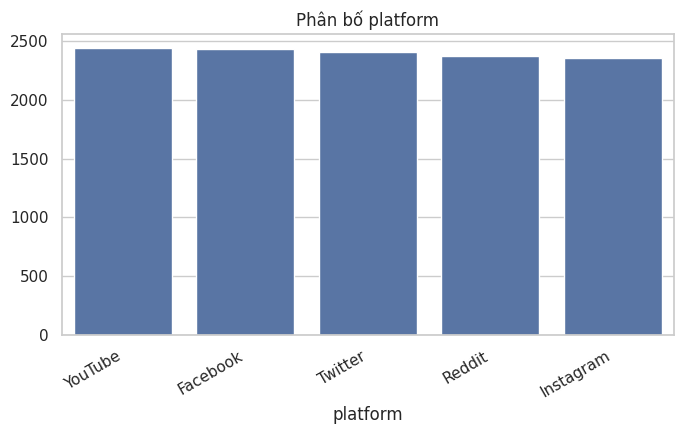

Saved -> outputs/figures/box_engagement_events_by_platform.png


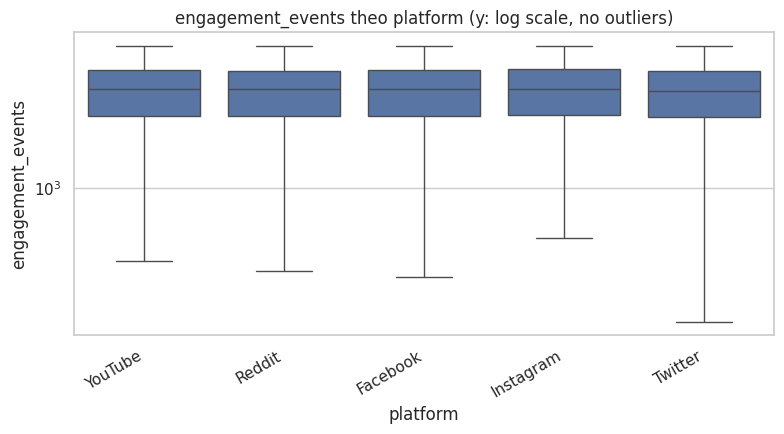

Saved -> outputs/figures/viral_rate_by_platform.png


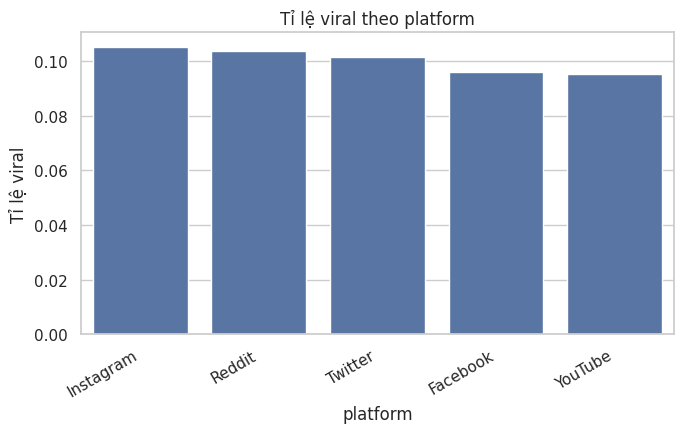

Saved -> outputs/figures/count_topic_category.png


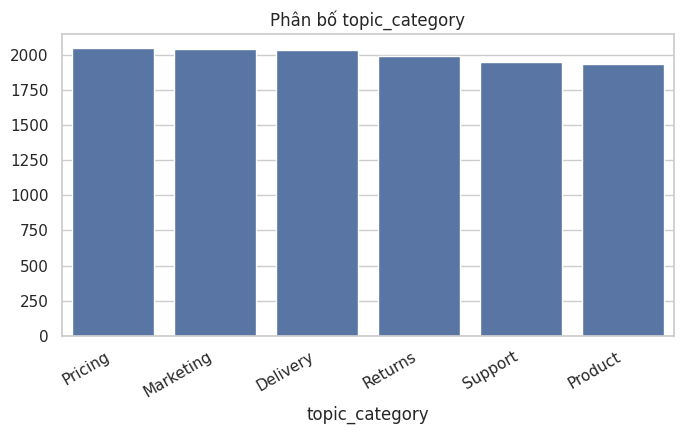

Saved -> outputs/figures/box_engagement_events_by_topic_category.png


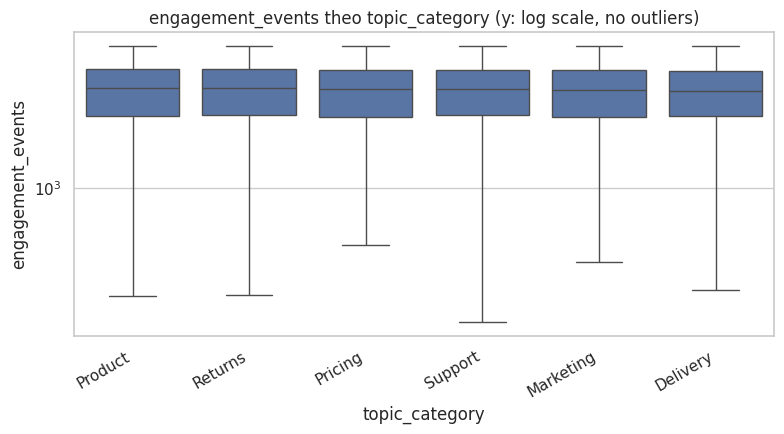

Saved -> outputs/figures/viral_rate_by_topic_category.png


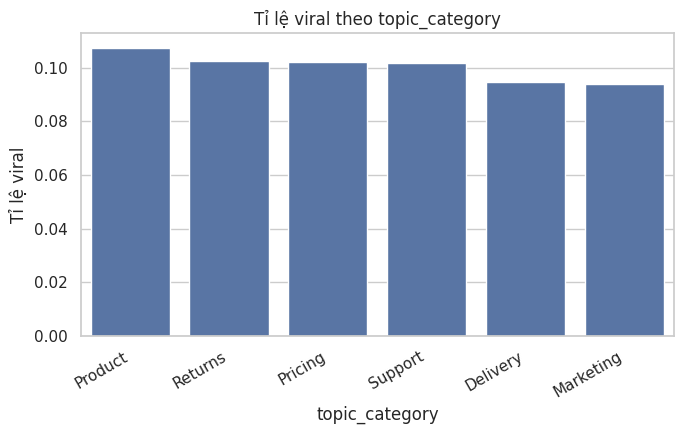

Saved -> outputs/figures/count_language.png


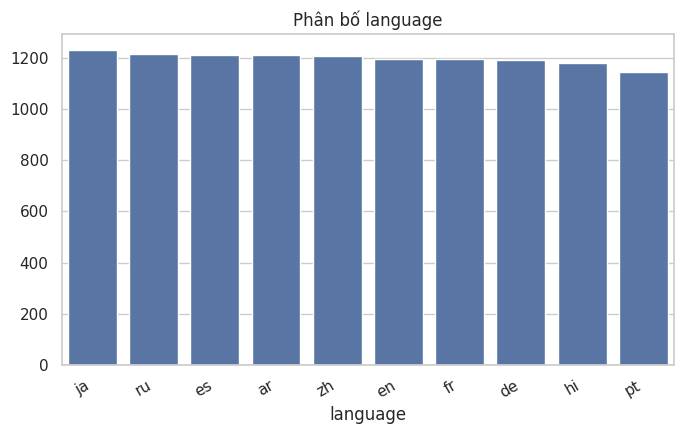

Saved -> outputs/figures/box_engagement_events_by_language.png


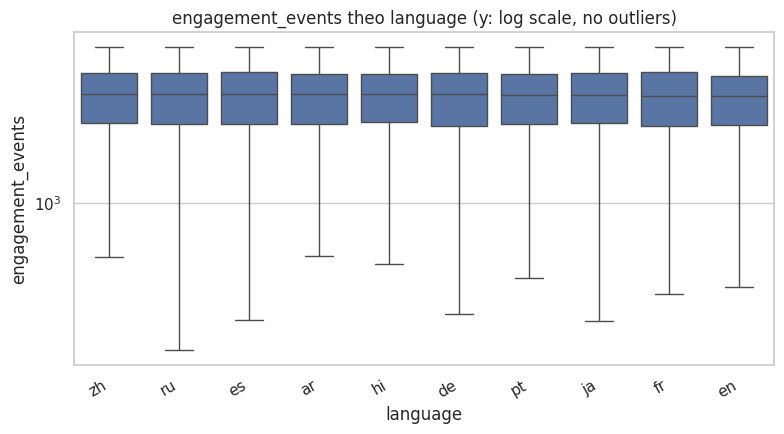

Saved -> outputs/figures/viral_rate_by_language.png


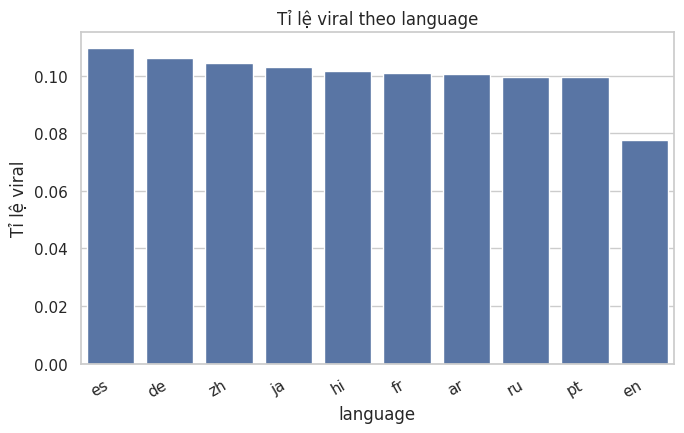

Saved -> outputs/figures/count_campaign_phase.png


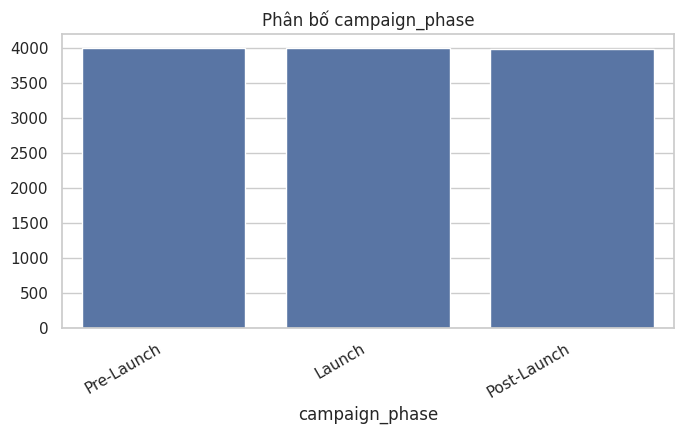

Saved -> outputs/figures/box_engagement_events_by_campaign_phase.png


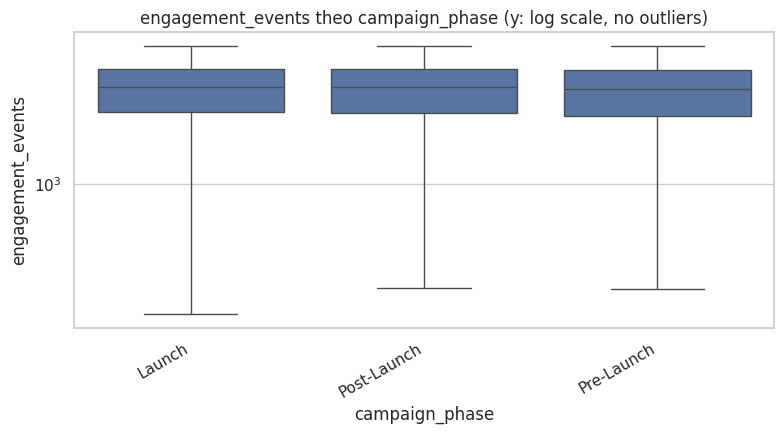

Saved -> outputs/figures/viral_rate_by_campaign_phase.png


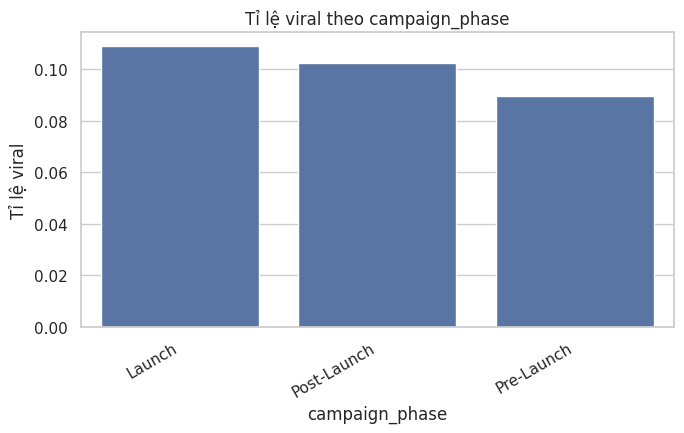

In [ ]:
# ===== V3: Categorical breakdowns =====
# Section V3 – So sánh theo nhóm phân loại (platform/topic/language/phase)
cat_cols = [c for c in ['platform','topic_category','language','campaign_phase'] if c in df.columns]
metric = 'engagement_events' if 'engagement_events' in df else 'likes_count'

for cat in cat_cols:
    # Phân bố số lượng
    cnt = df[cat].value_counts().head(20)
    plt.figure()
    sns.barplot(x=cnt.index, y=cnt.values)
    plt.xticks(rotation=30, ha='right')
    plt.title(f"Phân bố {cat}")
    savefig(f"count_{cat}.png")
    plt.show()

    # Trung vị + IQR cho metric
    plt.figure(figsize=(8,4.5))
    order = df.groupby(cat)[metric].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=cat, y=metric, order=order, showfliers=False)
    plt.yscale('log')
    plt.xticks(rotation=30, ha='right')
    plt.title(f"{metric} theo {cat} (y: log scale, no outliers)")
    savefig(f"box_{metric}_by_{cat}.png")
    plt.show()

    # Tỉ lệ viral theo nhóm (nếu có)
    if 'is_viral' in df:
        rate = df.groupby(cat)['is_viral'].mean().sort_values(ascending=False)
        plt.figure()
        sns.barplot(x=rate.index, y=rate.values)
        plt.xticks(rotation=30, ha='right')
        plt.ylabel("Tỉ lệ viral")
        plt.title(f"Tỉ lệ viral theo {cat}")
        savefig(f"viral_rate_by_{cat}.png")
        plt.show()

Saved -> outputs/figures/daily_totals.png


<Figure size 700x450 with 0 Axes>

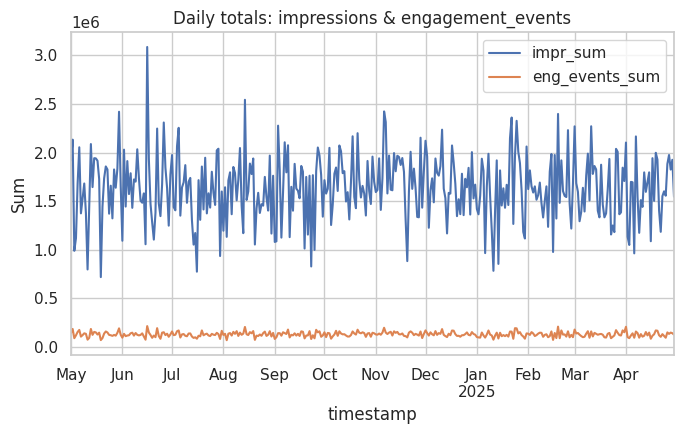

Saved -> outputs/figures/daily_median_rate.png


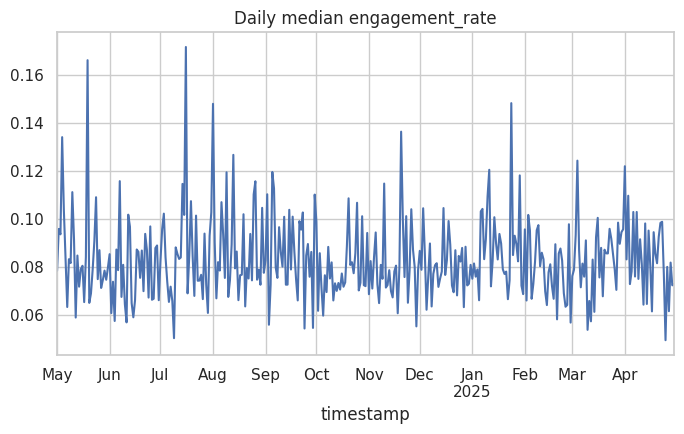

Saved -> outputs/figures/heat_hour_dayofweek_median_eng_events.png


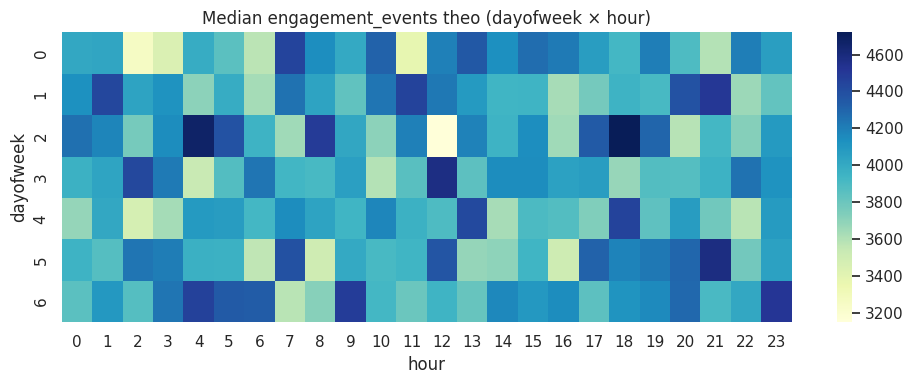

In [ ]:
# ===== V4: Time Series & Seasonality =====
# Section V4 – Time series: xu hướng theo ngày/tuần & theo giờ trong ngày
if 'timestamp' in df.columns:
    ts = df.set_index('timestamp').sort_index()
    # Resample ngày
    daily = pd.DataFrame({
        'impr_sum': ts['impressions'].resample('D').sum() if 'impressions' in ts else np.nan,
        'eng_events_sum': ts['engagement_events'].resample('D').sum() if 'engagement_events' in ts else np.nan,
        'eng_rate_med': ts['engagement_rate'].resample('D').median() if 'engagement_rate' in ts else np.nan
    })
    plt.figure()
    daily[['impr_sum','eng_events_sum']].plot()
    plt.title("Daily totals: impressions & engagement_events")
    plt.ylabel("Sum")
    savefig("daily_totals.png")
    plt.show()

    if 'eng_rate_med' in daily:
        daily['eng_rate_med'].plot()
        plt.title("Daily median engagement_rate")
        savefig("daily_median_rate.png")
        plt.show()

# Pattern theo giờ & thứ (heatmap)
if {'hour','dayofweek','engagement_events'}.issubset(df.columns):
    piv = df.pivot_table(index='dayofweek', columns='hour',
                         values='engagement_events', aggfunc='median')
    plt.figure(figsize=(10,4))
    sns.heatmap(piv, cmap="YlGnBu", annot=False)
    plt.title("Median engagement_events theo (dayofweek × hour)")
    savefig("heat_hour_dayofweek_median_eng_events.png")
    plt.show()

Saved -> outputs/figures/median_engagement_events_by_text_len_deciles.png


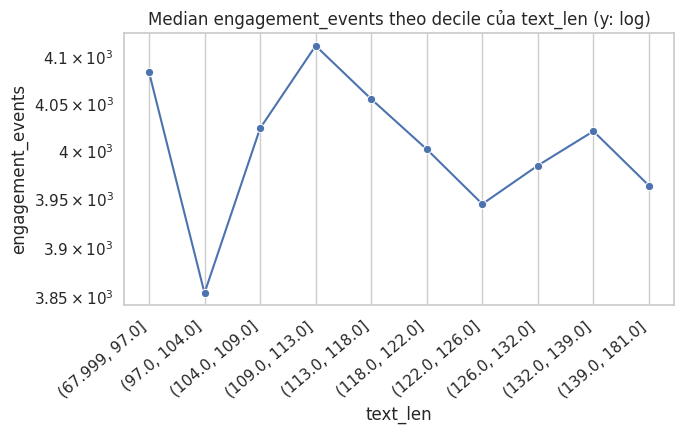

Saved -> outputs/figures/median_engagement_events_by_n_words_deciles.png


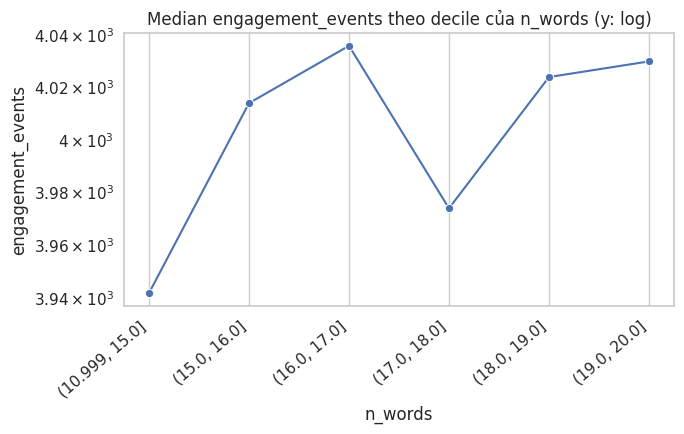

Saved -> outputs/figures/median_engagement_events_by_n_hashtags_deciles.png


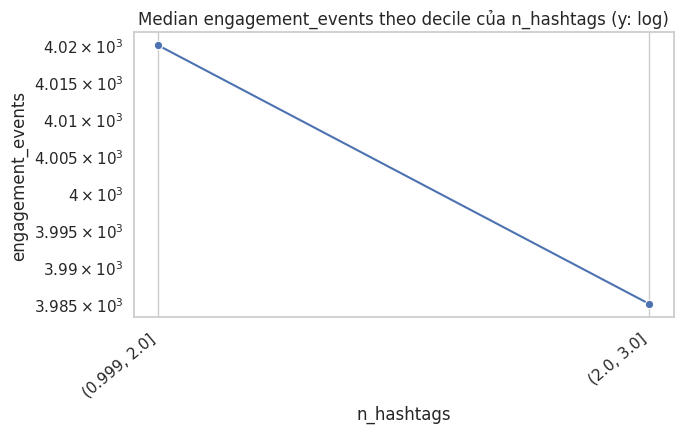

Saved -> outputs/figures/median_engagement_events_by_n_mentions_deciles.png


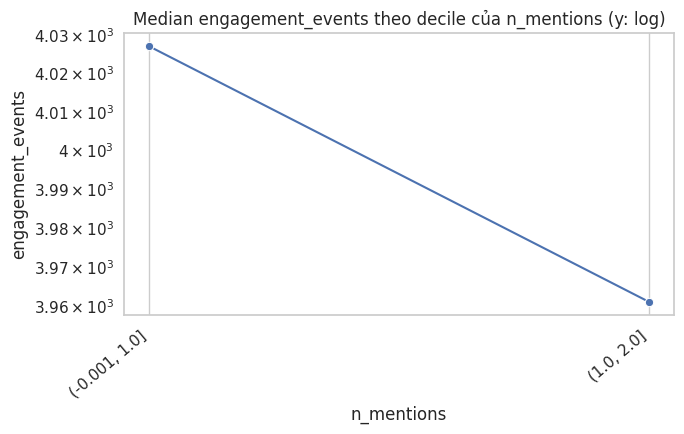

Saved -> outputs/figures/median_engagement_events_by_has_url_deciles.png


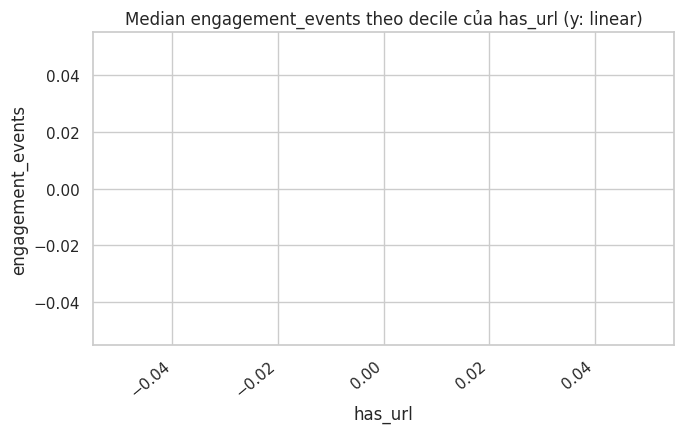

Saved -> outputs/figures/hex_sentiment_toxicity_vs_eng.png


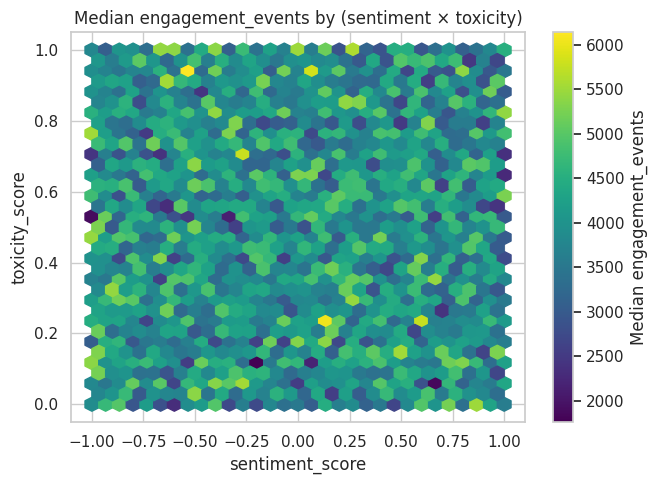

In [ ]:
# ===== V5 (FIXED): Content features impact =====
# Section V5 – Ảnh hưởng của đặc trưng nội dung (text_len, n_words, hashtags,…)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def safe_set_yscale(ax, y):
    """Chọn thang đo an toàn cho trục Y: log nếu min>0, symlog nếu có cả <=0 và >0,
    còn lại dùng linear. Trả về tên thang đã dùng để tiện debug."""
    s = pd.Series(y).replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty:
        return "linear"
    y_min, y_max = float(s.min()), float(s.max())
    if y_min > 0:
        ax.set_yscale("log")
        return "log"
    elif y_max > 0:
        ax.set_yscale("symlog", linthresh=1)  # tuyến tính quanh 0, log ngoài vùng đó
        return "symlog"
    else:
        # toàn 0/âm -> giữ linear
        return "linear"

text_feats = [c for c in ['text_len','n_words','n_hashtags','n_mentions','has_url'] if c in df.columns]
target_num = 'engagement_events' if 'engagement_events' in df else 'likes_count'

for c in text_feats:
    if pd.api.types.is_numeric_dtype(df[c]):
        # Binning theo decile (có thể ít hơn nếu trùng giá trị)
        bins = pd.qcut(df[c], q=10, duplicates="drop")
        tmp = df.groupby(bins, observed=True)[target_num].median().reset_index()
        tmp[c] = tmp[c].astype(str)

        plt.figure()
        ax = sns.lineplot(data=tmp, x=c, y=target_num, marker="o")
        plt.xticks(rotation=40, ha='right')
        scale_used = safe_set_yscale(ax, tmp[target_num])
        plt.title(f"Median {target_num} theo decile của {c} (y: {scale_used})")
        savefig(f"median_{target_num}_by_{c}_deciles.png")
        plt.show()

    else:
        # Biến phân loại/binary (ví dụ has_url)
        tmp = df.groupby(c, observed=True)[target_num].median()
        plt.figure()
        ax = sns.barplot(x=tmp.index.astype(str), y=tmp.values)
        scale_used = safe_set_yscale(ax, tmp.values)
        plt.title(f"Median {target_num} theo {c} (y: {scale_used})")
        savefig(f"median_{target_num}_by_{c}.png")
        plt.show()

# Sentiment vs toxicity vs engagement (2D bins) - giữ nguyên, không dùng log y
if {'sentiment_score','toxicity_score',target_num}.issubset(df.columns):
    plt.figure(figsize=(6.8,5))
    hb = plt.hexbin(df['sentiment_score'], df['toxicity_score'],
                    C=df[target_num], reduce_C_function=np.median,
                    gridsize=30, cmap="viridis")
    plt.xlabel("sentiment_score")
    plt.ylabel("toxicity_score")
    plt.title(f"Median {target_num} by (sentiment × toxicity)")
    cb = plt.colorbar(hb)
    cb.set_label(f"Median {target_num}")
    savefig("hex_sentiment_toxicity_vs_eng.png")
    plt.show()


In [ ]:
# ===== V6: Interactive (fixed) =====
# Section V6 – Biểu đồ tương tác (tuỳ chọn, Plotly)
import plotly.express as px
import pandas as pd

try:
    # --- Scatter: impressions vs engagement_events ---
    if {'impressions','engagement_events'}.issubset(df.columns):
        # Chỉ giữ các cột cần thiết để tránh NA và lệch độ dài
        keep_cols = ['impressions','engagement_events'] + (['platform'] if 'platform' in df.columns else [])
        sample_df = df[keep_cols].dropna(subset=['impressions','engagement_events'])

        # Lấy mẫu 8k hoặc ít hơn nếu dữ liệu nhỏ hơn
        sample_n = min(8000, len(sample_df))
        sample_df = sample_df.sample(sample_n, random_state=42) if sample_n < len(sample_df) else sample_df

        fig = px.scatter(
            sample_df,
            x='impressions', y='engagement_events',
            color='platform' if 'platform' in sample_df.columns else None,
            trendline='ols',  # cần statsmodels; nếu lỗi có thể bỏ dòng này
            opacity=0.6,
            title=f'Impressions vs Engagement events (n={len(sample_df)})'
        )
        fig.show()

    # --- Time series: engagement_events theo thời gian ---
    if {'timestamp','engagement_events'}.issubset(df.columns):
        ts = df[['timestamp','engagement_events']].dropna().sort_values('timestamp')
        fig = px.line(ts, x='timestamp', y='engagement_events',
                      title='Engagement events over time (interactive)')
        fig.show()

except Exception as e:
    print("Plotly warning:", e)


In [ ]:
# MỐI QUAN HỆ GIỮA PLATFORM VÀ BRAND NAME
# ===== PB0: Setup & detect brand column =====
# Section PB0 – Chuẩn bị & dò cột brand
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)
os.makedirs("outputs/figures", exist_ok=True)
os.makedirs("outputs/tables", exist_ok=True)

def savefig(name):
    path = f"outputs/figures/{name}"
    plt.tight_layout()
    plt.savefig(path, dpi=160, bbox_inches="tight")
    print("Saved ->", path)

# Giả định bạn đã có df sau các bước trước; nếu chưa:
# df = pd.read_csv("/content/Social Media Engagement Dataset.csv")

# Dò cột brand
BRAND_CANDIDATES = ['brand_name','brand','client','page_name','account_name']
brand_col = next((c for c in BRAND_CANDIDATES if c in df.columns), None)
assert brand_col is not None, f"Không tìm thấy cột brand trong {BRAND_CANDIDATES}. Hãy đổi tên cột đúng vào biến brand_col."

# Chuẩn hoá tối thiểu
df[brand_col] = df[brand_col].astype(str).str.strip()
assert 'platform' in df.columns, "Không thấy cột 'platform' trong dữ liệu."

print("brand_col =", brand_col)
df[[brand_col,'platform']].head()

brand_col = brand_name


brand_name   platform
6988     Google    YouTube
2147      Apple    Twitter
9981      Pepsi    Twitter
6000     Google     Reddit
1431  Microsoft  Instagram

In [ ]:
# ===== PB1: Ensure engagement metrics =====
# Section PB1 – Tạo biến mục tiêu tương tác (nếu chưa có)
for c in ['likes_count','shares_count','comments_count','impressions']:
    assert c in df.columns, f"Thiếu cột {c}."

if 'engagement_events' not in df.columns:
    df['engagement_events'] = df['likes_count'] + df['shares_count'] + df['comments_count']

# Tạo vài biến hữu ích
df['has_engagement'] = (df['engagement_events'] > 0).astype(int)
df['eng_per_1k_impr'] = np.where(df['impressions']>0, 1000*df['engagement_events']/df['impressions'], np.nan)

df[['platform', brand_col, 'engagement_events','impressions','eng_per_1k_impr']].head()

platform brand_name  engagement_events  impressions  eng_per_1k_impr
6988    YouTube     Google             3930.0      12929.0       303.967824
2147    Twitter      Apple             3560.0      72636.0        49.011509
9981    Twitter      Pepsi             2423.0      76663.0        31.605859
6000     Reddit     Google             3490.0      70729.0        49.343268
1431  Instagram  Microsoft             5243.0      18206.0       287.981984

In [ ]:
# ===== PB2: Cross-tab counts =====
# Section PB2 – Bảng chéo Platform × Brand (tần suất)
# Lấy top N brand theo số bài để biểu đồ không quá dày
TOP_N = 20
top_brands = df[brand_col].value_counts().head(TOP_N).index

ct = pd.crosstab(df.loc[df[brand_col].isin(top_brands), brand_col],
                 df.loc[df[brand_col].isin(top_brands), 'platform'])

# Lưu bảng
ct.to_csv("outputs/tables/platform_by_brand_counts.csv")
print("Saved table -> outputs/tables/platform_by_brand_counts.csv")
ct.head()

Saved table -> outputs/tables/platform_by_brand_counts.csv


platform    Facebook  Instagram  Reddit  Twitter  YouTube
brand_name                                               
Adidas           266        232     245      253      233
Amazon           226        235     214      231      237
Apple            239        240     240      225      248
Coca-Cola        236        248     229      215      245
Google           237        238     250      267      224

Saved -> outputs/figures/heatmap_counts_platform_brand.png


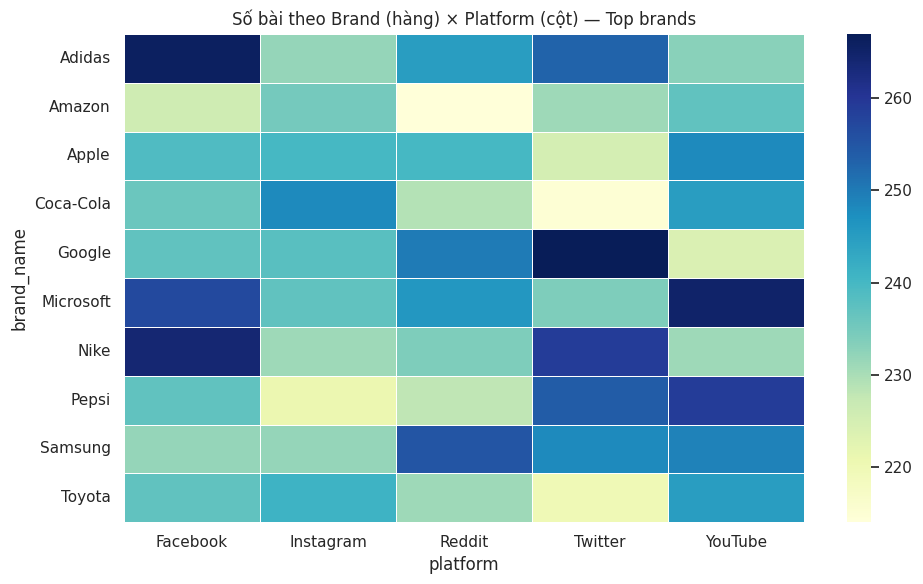

Saved -> outputs/figures/heatmap_rowshare_platform_brand.png


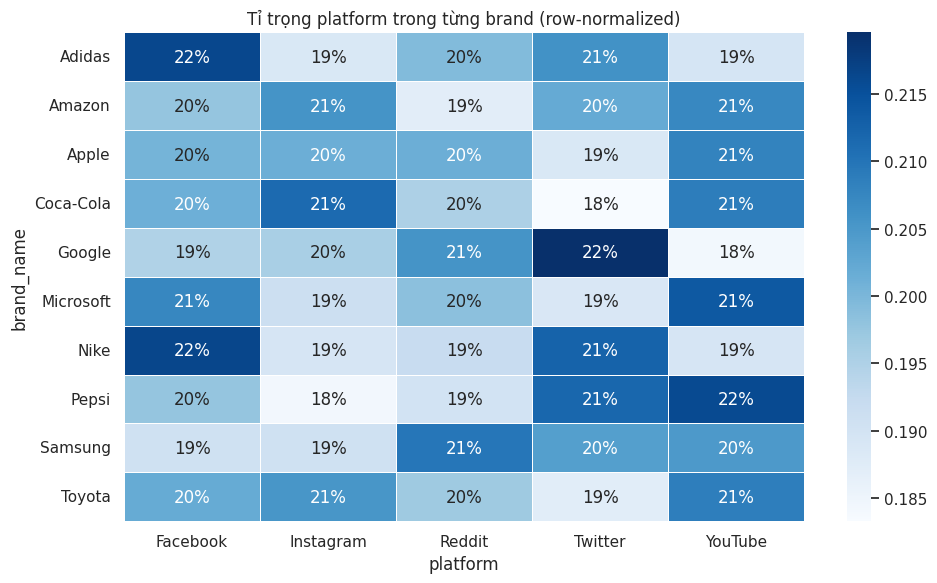

Saved -> outputs/figures/heatmap_colshare_platform_brand.png


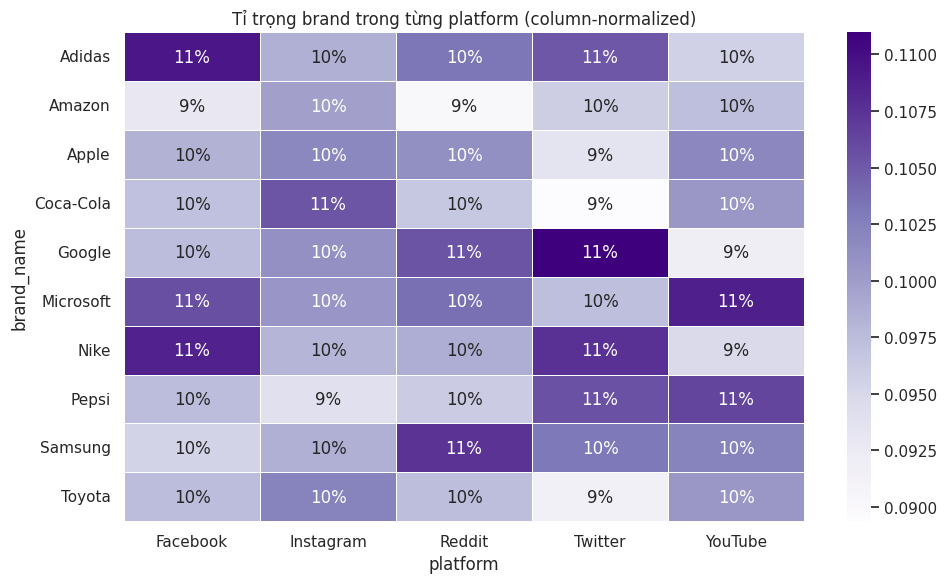

In [ ]:
# ===== PB3: Heatmaps (counts & shares) =====
# Section PB3 – Heatmap tần suất & tỉ trọng
plt.figure(figsize=(10, max(6, len(ct)*0.35)))
sns.heatmap(ct, annot=False, cmap="YlGnBu", linewidths=.5)
plt.title("Số bài theo Brand (hàng) × Platform (cột) — Top brands")
savefig("heatmap_counts_platform_brand.png")
plt.show()

# Chuẩn hoá theo hàng (share platform trong mỗi brand)
row_share = ct.div(ct.sum(axis=1).replace(0, np.nan), axis=0)
plt.figure(figsize=(10, max(6, len(ct)*0.35)))
sns.heatmap(row_share, annot=True, fmt=".0%", cmap="Blues", linewidths=.5)
plt.title("Tỉ trọng platform trong từng brand (row-normalized)")
savefig("heatmap_rowshare_platform_brand.png")
plt.show()

# Chuẩn hoá theo cột (share brand trong mỗi platform)
col_share = ct.div(ct.sum(axis=0).replace(0, np.nan), axis=1)
plt.figure(figsize=(10, max(6, len(ct)*0.35)))
sns.heatmap(col_share, annot=True, fmt=".0%", cmap="Purples", linewidths=.5)
plt.title("Tỉ trọng brand trong từng platform (column-normalized)")
savefig("heatmap_colshare_platform_brand.png")
plt.show()

Saved -> outputs/figures/heatmap_median_engagement_events_platform_brand.png


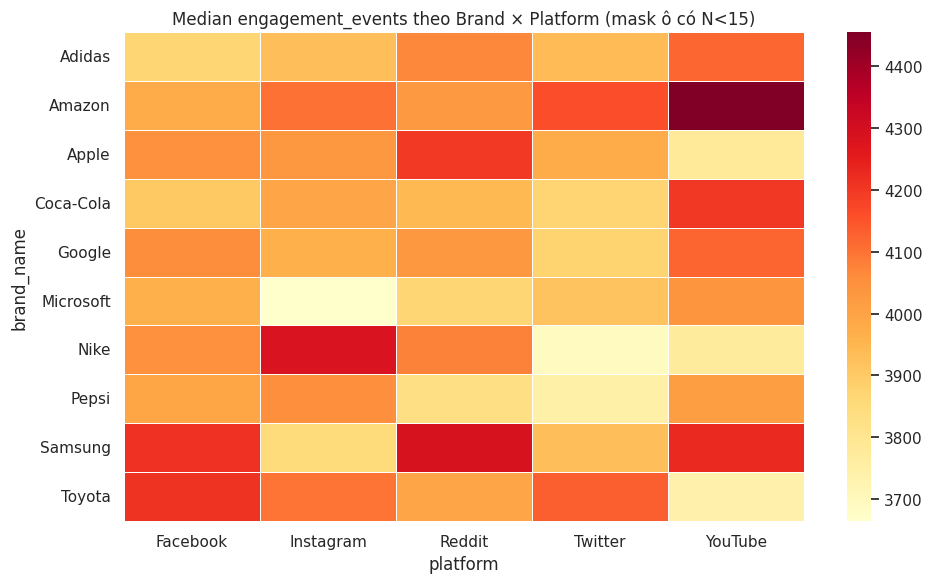

Saved -> outputs/tables/median_*.csv & count_*.csv


In [ ]:
# ===== PB4: Median engagement by brand × platform =====
# Section PB4 – Hiệu quả theo brand × platform (Median engagement)
# Lọc Top brands để dễ đọc; có thể đổi metric
metric = 'engagement_events'  # hoặc 'eng_per_1k_impr'
MIN_SAMPLES = 15              # ngưỡng tối thiểu cho mỗi ô

sub = df[df[brand_col].isin(top_brands)].copy()
pivot_med = sub.pivot_table(index=brand_col, columns='platform',
                            values=metric, aggfunc='median', observed=True)
pivot_cnt = sub.pivot_table(index=brand_col, columns='platform',
                            values=metric, aggfunc='count', observed=True)

# Mask các ô ít dữ liệu
mask = pivot_cnt < MIN_SAMPLES
plt.figure(figsize=(10, max(6, len(pivot_med)*0.35)))
sns.heatmap(pivot_med, cmap="YlOrRd", linewidths=.5, mask=mask)
plt.title(f"Median {metric} theo Brand × Platform (mask ô có N<{MIN_SAMPLES})")
savefig(f"heatmap_median_{metric}_platform_brand.png")
plt.show()

# Lưu bảng median + count
pivot_med.to_csv(f"outputs/tables/median_{metric}_by_brand_platform.csv")
pivot_cnt.to_csv(f"outputs/tables/count_{metric}_by_brand_platform.csv")
print("Saved -> outputs/tables/median_*.csv & count_*.csv")

In [ ]:
# ===== PB5: Chi-square test & Cramér's V =====
# Section PB5 – Kiểm định độc lập & Cramér’s V
from scipy.stats import chi2_contingency

# Dùng toàn bộ bảng chéo (có thể lớn)
full_ct = pd.crosstab(df[brand_col], df['platform'])
chi2, p, dof, _ = chi2_contingency(full_ct)

# Cramér's V
n = full_ct.values.sum()
phi2 = chi2 / n
r, k = full_ct.shape
cramers_v = np.sqrt(phi2 / (min(k-1, r-1)))

print(f"Chi-square: {chi2:,.1f} | dof={dof} | p-value={p:.3e}")
print(f"Cramér's V: {cramers_v:.3f}  (0~0.1: rất yếu, ~0.3: vừa, ~0.5: mạnh)")

Chi-square: 26.1 | dof=36 | p-value=8.864e-01
Cramér's V: 0.023  (0~0.1: rất yếu, ~0.3: vừa, ~0.5: mạnh)


Saved -> outputs/figures/stacked_platform_share_by_brand.png


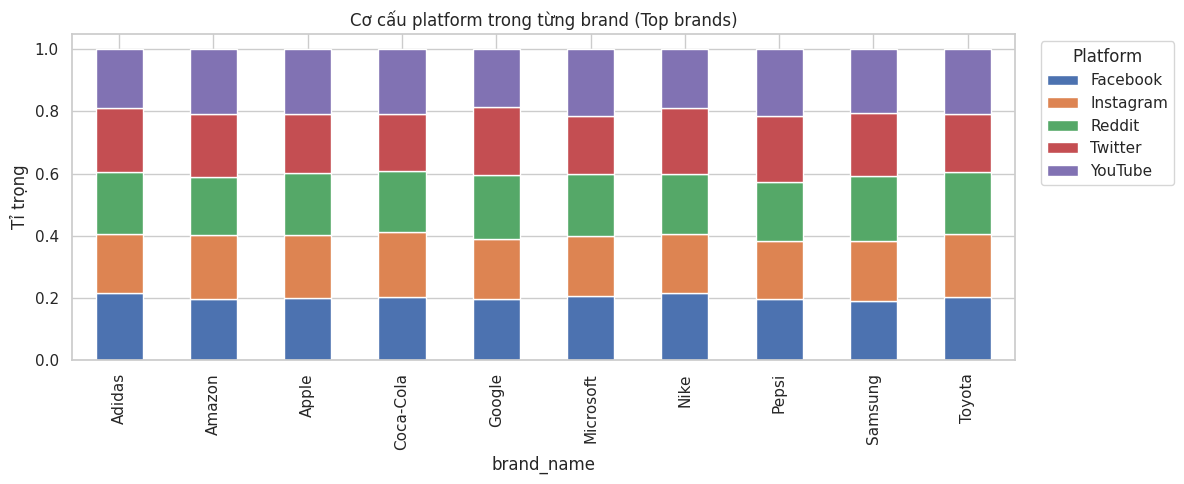

In [ ]:
# ===== PB6: Stacked bar by brand =====
# Section PB6 – Stacked bars: cơ cấu platform theo brand (Top N)
top_ct = ct.copy()  # từ PB2
share = top_ct.div(top_ct.sum(axis=1).replace(0,np.nan), axis=0)

# Vẽ stacked bar
ax = share.plot(kind='bar', stacked=True, figsize=(12, max(5, len(share)*0.35)))
plt.ylabel("Tỉ trọng")
plt.title("Cơ cấu platform trong từng brand (Top brands)")
plt.legend(title="Platform", bbox_to_anchor=(1.02, 1), loc='upper left')
savefig("stacked_platform_share_by_brand.png")
plt.show()

Saved -> outputs/figures/top10_brands_by_count_YouTube.png


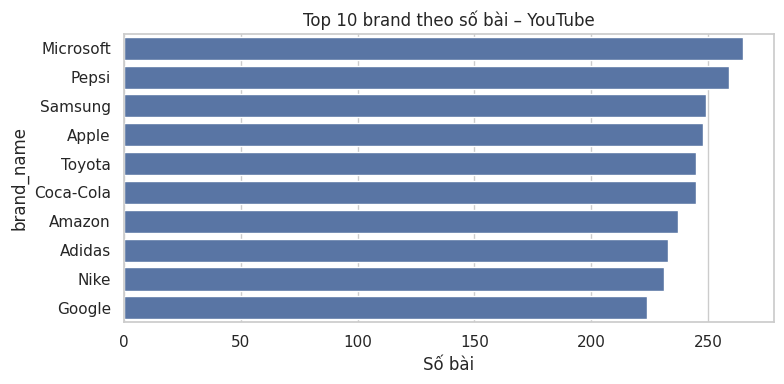

Saved -> outputs/figures/top10_brands_by_median_eng_YouTube.png


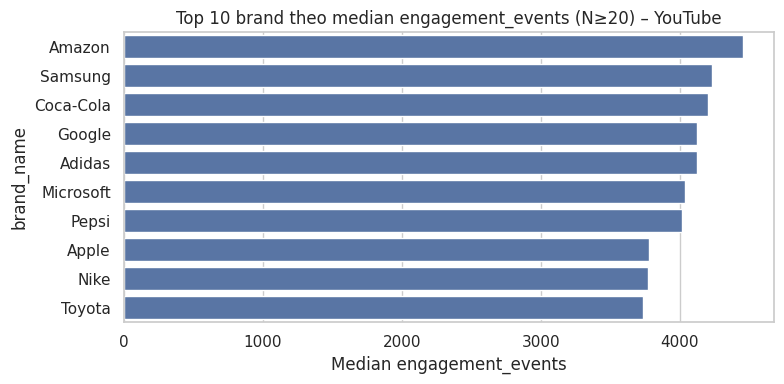

Saved -> outputs/figures/top10_brands_by_count_Facebook.png


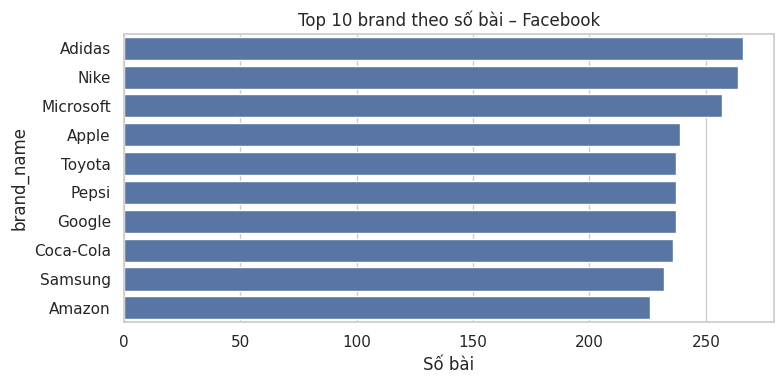

Saved -> outputs/figures/top10_brands_by_median_eng_Facebook.png


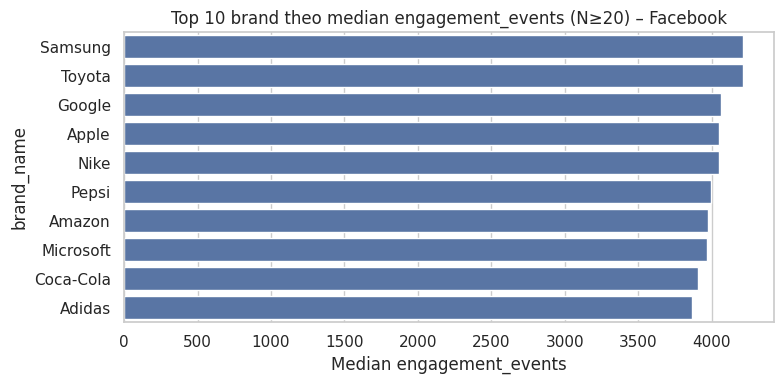

Saved -> outputs/figures/top10_brands_by_count_Twitter.png


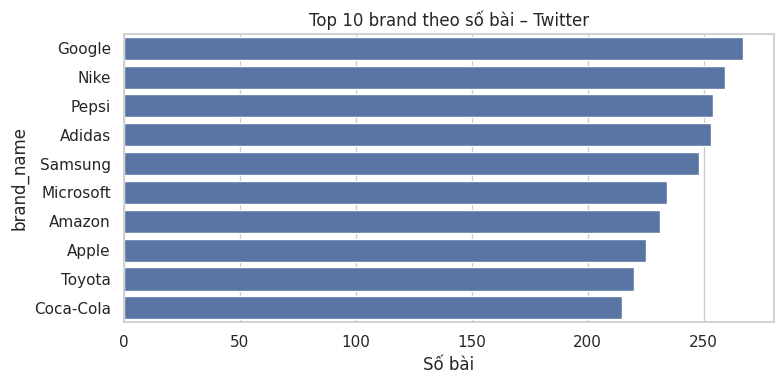

Saved -> outputs/figures/top10_brands_by_median_eng_Twitter.png


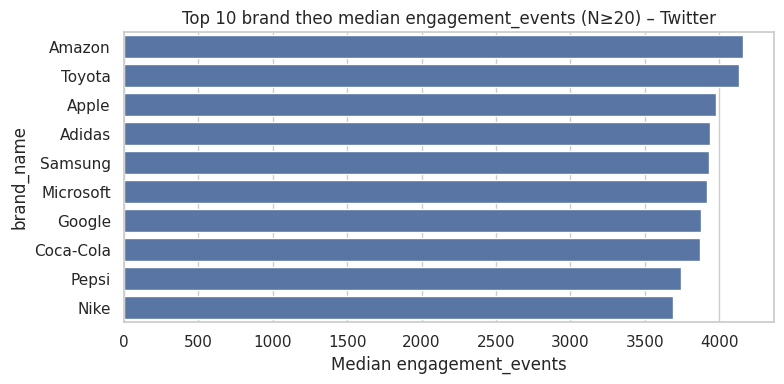

Saved -> outputs/figures/top10_brands_by_count_Reddit.png


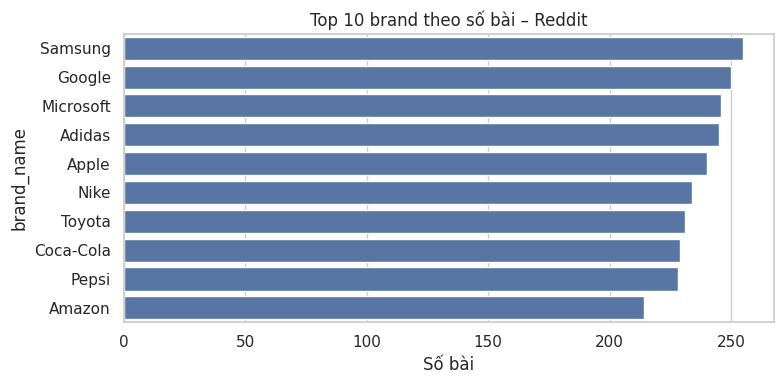

Saved -> outputs/figures/top10_brands_by_median_eng_Reddit.png


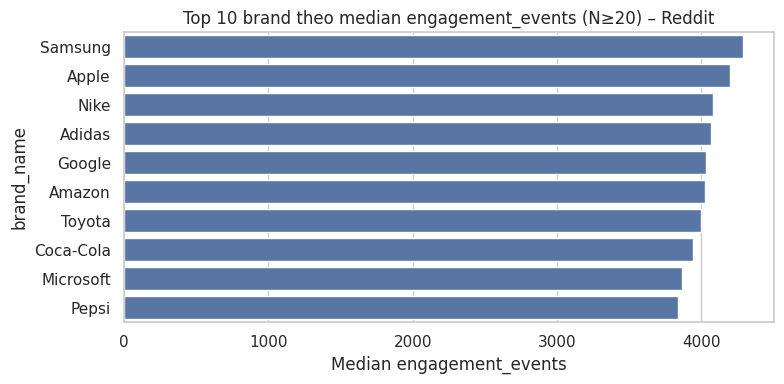

Saved -> outputs/figures/top10_brands_by_count_Instagram.png


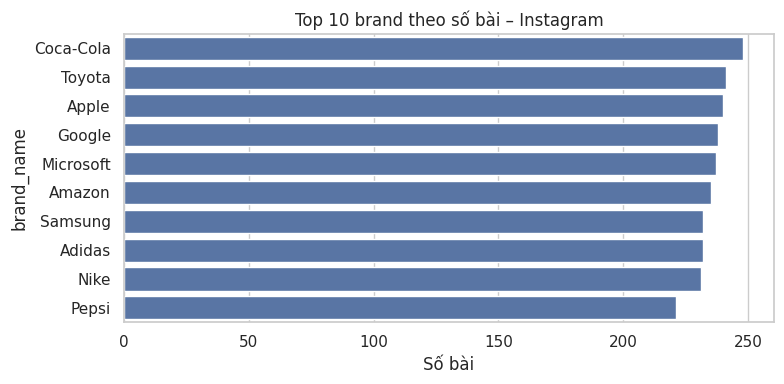

Saved -> outputs/figures/top10_brands_by_median_eng_Instagram.png


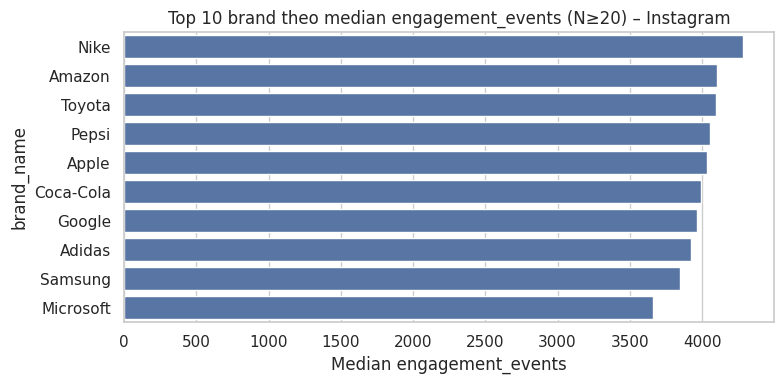

In [ ]:
# ===== PB7: Top brands per platform =====
# Section PB7 – Top brand theo từng platform (đếm & median engagement)
PLATFORM_LIST = df['platform'].value_counts().index.tolist()  # hoặc chọn thủ công
K = 10  # số brand muốn xem mỗi platform

for plat in PLATFORM_LIST:
    subp = df[df['platform'] == plat]
    # Top theo số bài
    topb = subp[brand_col].value_counts().head(K)

    plt.figure(figsize=(8,4))
    sns.barplot(x=topb.values, y=topb.index)
    plt.title(f"Top {K} brand theo số bài – {plat}")
    plt.xlabel("Số bài")
    savefig(f"top{K}_brands_by_count_{plat}.png")
    plt.show()

    # Top theo median engagement (lọc N tối thiểu)
    grp = subp.groupby(brand_col).agg(
        n=('engagement_events','count'),
        med=('engagement_events','median')
    ).query("n >= 20").sort_values('med', ascending=False).head(K)

    plt.figure(figsize=(8,4))
    sns.barplot(x=grp['med'].values, y=grp.index)
    plt.title(f"Top {K} brand theo median engagement_events (N≥20) – {plat}")
    plt.xlabel("Median engagement_events")
    savefig(f"top{K}_brands_by_median_eng_{plat}.png")
    plt.show()

Saved -> outputs/figures/network_brand_platform.png


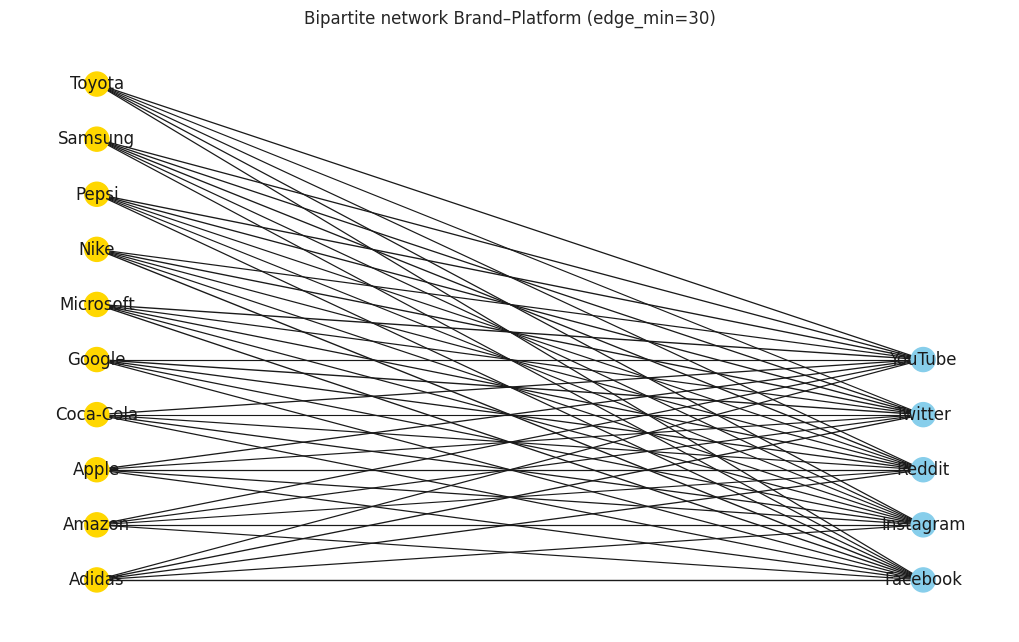

In [ ]:
# ===== PB8 (optional): Bipartite network =====
# Section PB8 – Biểu đồ mạng Platform–Brand (bipartite)
!pip -q install networkx
import networkx as nx

sub = df.copy()
sub[brand_col] = sub[brand_col].astype(str)
edge_counts = sub.groupby([brand_col, 'platform']).size().reset_index(name='count')

# Lọc để đồ thị không quá dày
EDGE_MIN = 30
edge_counts = edge_counts[edge_counts['count'] >= EDGE_MIN]

G = nx.Graph()
# Thêm nút
brands = edge_counts[brand_col].unique().tolist()
plats  = edge_counts['platform'].unique().tolist()
G.add_nodes_from(brands, bipartite='brand', type='brand')
G.add_nodes_from(plats,  bipartite='platform', type='platform')

# Thêm cạnh
for _, row in edge_counts.iterrows():
    G.add_edge(row[brand_col], row['platform'], weight=row['count'])

# Layout: đặt platform ở 1 bên, brand ở bên kia
pos = {}
pos.update((b, (0, i)) for i, b in enumerate(sorted(brands)))
pos.update((p, (1, i)) for i, p in enumerate(sorted(plats)))

weights = [G[u][v]['weight'] for u,v in G.edges()]
plt.figure(figsize=(10, max(6, 0.25*(len(brands)+len(plats)))))
nx.draw(G, pos, with_labels=True, node_size=300,
        width=[w/weights[0] for w in weights],  # chuẩn hoá tương đối
        node_color=['#87CEEB' if G.nodes[n]['type']=='platform' else '#FFD700' for n in G.nodes()])
plt.title(f"Bipartite network Brand–Platform (edge_min={EDGE_MIN})")
savefig("network_brand_platform.png")
plt.show()

In [ ]:
# MỐI QUAN HỆ GIỮA PLATFORM VÀ LOCATION
# G0 — Cài đặt & chuẩn bị
# ===== G0: Install & setup (run once) =====
!pip -q install pycountry seaborn plotly

import os, re, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)
os.makedirs("outputs/figures", exist_ok=True)
os.makedirs("outputs/tables", exist_ok=True)

def savefig(name):
    path = f"outputs/figures/{name}"
    plt.tight_layout()
    plt.savefig(path, dpi=160, bbox_inches="tight")
    print("Saved ->", path)

def safe_set_yscale(ax, y):
    s = pd.Series(y).replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty: return "linear"
    y_min, y_max = float(s.min()), float(s.max())
    if y_min > 0:
        ax.set_yscale("log"); return "log"
    elif y_max > 0:
        ax.set_yscale("symlog", linthresh=1); return "symlog"
    return "linear"

print("Ready ✅")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 54.2 MB/s eta 0:00:00
Ready ✅


In [ ]:
# G1 — Đọc dữ liệu & chọn quốc gia (chỉ cần đổi biến dưới đây)# ===== G1: Load & SELECT_COUNTRY =====
# Nếu bạn đã có df từ trước thì bỏ qua dòng read_csv.
# DATA_PATH = "/content/Social Media Engagement Dataset.csv"
# df = pd.read_csv(DATA_PATH)

# 👉 CHỈ CẦN ĐỔI GIÁ TRỊ NÀY (ví dụ: "United States", "Vietnam", "India", ...)
SELECT_COUNTRY = "United States"   # hoặc None để tắt phân tích cấp subregion

# Bảo đảm các cột cần thiết tồn tại
assert 'platform' in df.columns, "Thiếu cột 'platform'."
assert 'location' in df.columns, "Thiếu cột 'location'."
for col in ['likes_count','shares_count','comments_count','impressions']:
    assert col in df.columns, f"Thiếu cột {col}."

# Tạo biến tương tác căn bản
if 'engagement_events' not in df.columns:
    df['engagement_events'] = df['likes_count'] + df['shares_count'] + df['comments_count']
df['eng_per_1k_impr'] = np.where(df['impressions']>0, 1000*df['engagement_events']/df['impressions'], np.nan)

print("SELECT_COUNTRY =", SELECT_COUNTRY)
print("Rows:", len(df))

SELECT_COUNTRY = United States
Rows: 12000


In [ ]:
# G2 — Hàm tách location & chuẩn hoá tên quốc gia (dùng cho mọi nước)
# ===== G2: Parse location & normalize country =====
def normalize_space(s):
    return re.sub(r"\s+", " ", s).strip()

COUNTRY_ALIASES = {
    "us": "United States", "usa": "United States", "u.s.": "United States", "united states of america": "United States",
    "uk": "United Kingdom", "england": "United Kingdom", "scotland": "United Kingdom", "wales": "United Kingdom", "northern ireland": "United Kingdom",
    "uae": "United Arab Emirates", "viet nam": "Vietnam", "russia": "Russian Federation", "south korea": "Korea, Republic of",
    "north korea": "Korea, Democratic People's Republic of", "czech republic": "Czechia",
    "iran": "Iran, Islamic Republic of", "laos": "Lao People's Democratic Republic",
    "moldova": "Moldova, Republic of", "syria": "Syrian Arab Republic", "tanzania": "Tanzania, United Republic of",
    "venezuela": "Venezuela, Bolivarian Republic of", "bolivia": "Bolivia, Plurinational State of",
    "brunei": "Brunei Darussalam", "palestine": "Palestine, State of", "macedonia": "North Macedonia",
}

def normalize_country_name(name: str):
    if not isinstance(name, str): return np.nan
    key = normalize_space(name).lower()
    if key in COUNTRY_ALIASES: return COUNTRY_ALIASES[key]
    # giữ nguyên vài tên đặc biệt
    base = normalize_space(name)
    if key in ["united states","united kingdom"]:
        return base
    return base.title()

def to_iso3(name: str):
    if not isinstance(name, str) or not name: return np.nan
    try:
        cn = normalize_country_name(name)
        c = pycountry.countries.search_fuzzy(cn)[0]
        return c.alpha_3
    except Exception:
        try:
            c = pycountry.countries.search_fuzzy(name)[0]
            return c.alpha_3
        except Exception:
            key = name.lower().strip()
            if key in COUNTRY_ALIASES:
                try:
                    c = pycountry.countries.search_fuzzy(COUNTRY_ALIASES[key])[0]
                    return c.alpha_3
                except Exception:
                    return np.nan
            return np.nan

def parse_location(loc: str):
    """
    Dạng chung: 'tiểu bang/vùng/.../quốc gia'
    - country = phần sau dấu '/' cuối cùng
    - subregion = phần trước đó (giữ nguyên chuỗi; nếu nhiều cấp, ghép lại)
    - Nếu chỉ có 1 phần -> coi như country, subregion = NaN
    """
    if not isinstance(loc, str):
        return pd.Series([np.nan, np.nan])
    parts = [normalize_space(p) for p in loc.split(",") if normalize_space(p)]
    if len(parts) == 0:
        return pd.Series([np.nan, np.nan])
    elif len(parts) == 1:
        return pd.Series([np.nan, parts[0]])
    else:
        country = parts[-1]
        sub = ",".join(parts[:-1])  # giữ dạng "City/State" nếu có nhiều cấp
        return pd.Series([sub, country])

df[['subregion', 'country_raw']] = df['location'].apply(parse_location)
df['country'] = df['country_raw'].apply(normalize_country_name)
df['country_iso3'] = df['country'].apply(to_iso3)

print(df[['location','subregion','country','country_iso3']].head())

                    location       subregion               country country_iso3
6988  Rio de Janeiro, Brazil  Rio de Janeiro                Brazil          BRA
2147              Dubai, UAE           Dubai  United Arab Emirates          ARE
9981        Barcelona, Spain       Barcelona                 Spain          ESP
6000            Tokyo, Japan           Tokyo                 Japan          JPN
1431       Sydney, Australia          Sydney             Australia          AUS


Saved -> outputs/tables/country_platform_counts.csv
Saved -> outputs/figures/heatmap_country_platform_counts.png


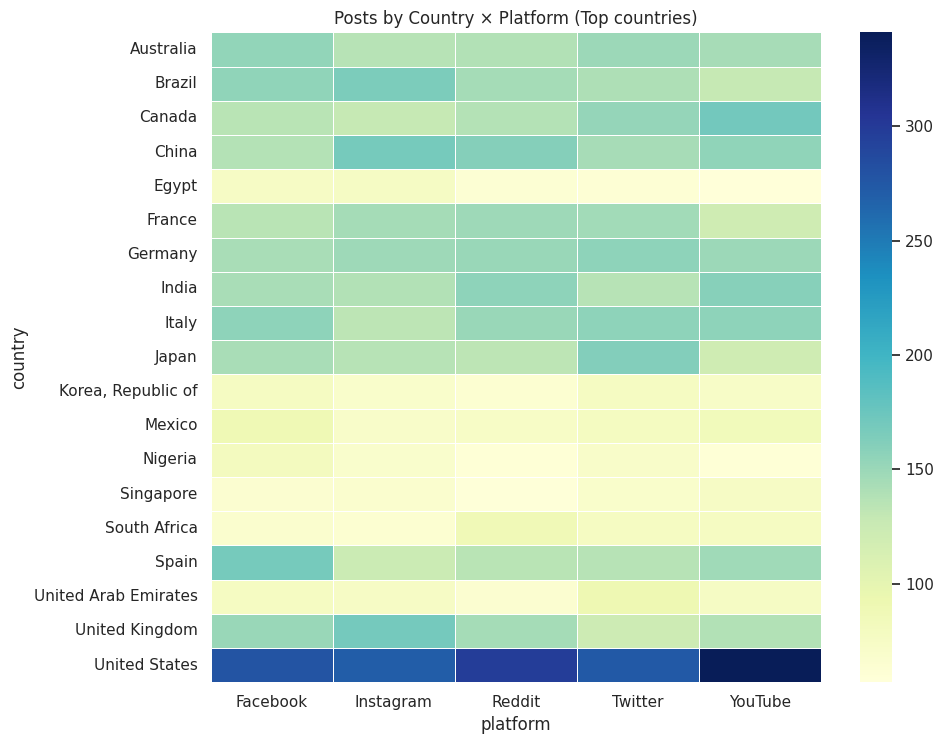

Saved -> outputs/figures/heatmap_country_platform_rowshare.png


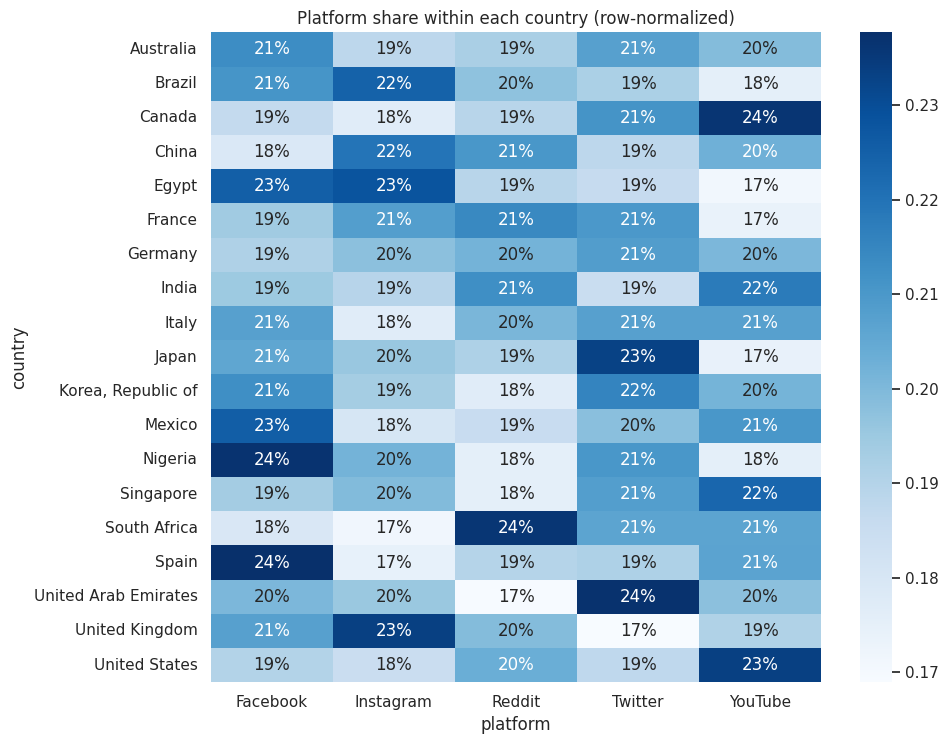

Saved -> outputs/figures/heatmap_country_platform_median_engagement_events.png


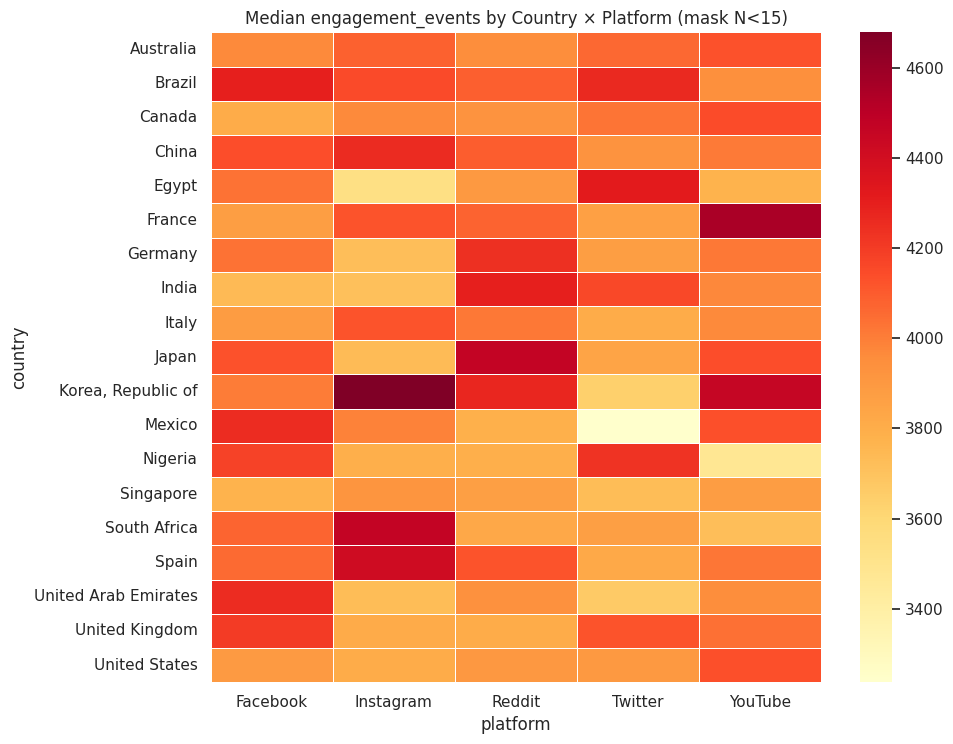

In [ ]:
# G3 — Phân tích cấp quốc gia (áp dụng cho tất cả)
# ===== G3: Country-level counts, shares, performance =====
# Top N quốc gia theo số bài (để đồ thị dễ đọc)
TOP_COUNTRIES = 20
country_top = df['country'].value_counts().head(TOP_COUNTRIES).index
d_country = df[df['country'].isin(country_top)].copy()

# Cross-tab: số bài Country × Platform
ct_country = pd.crosstab(d_country['country'], d_country['platform'])
ct_country.to_csv("outputs/tables/country_platform_counts.csv")
print("Saved -> outputs/tables/country_platform_counts.csv")

# Heatmap counts
plt.figure(figsize=(10, max(6, 0.4*len(ct_country))))
sns.heatmap(ct_country, cmap="YlGnBu", annot=False, linewidths=.4)
plt.title("Posts by Country × Platform (Top countries)")
savefig("heatmap_country_platform_counts.png")
plt.show()

# Row-normalized share
row_share = ct_country.div(ct_country.sum(axis=1).replace(0, np.nan), axis=0)
plt.figure(figsize=(10, max(6, 0.4*len(row_share))))
sns.heatmap(row_share, cmap="Blues", annot=True, fmt=".0%")
plt.title("Platform share within each country (row-normalized)")
savefig("heatmap_country_platform_rowshare.png")
plt.show()

# Hiệu quả: median engagement (hoặc eng_per_1k_impr)
metric = 'engagement_events'  # đổi sang 'eng_per_1k_impr' nếu muốn
MIN_SAMPLES = 15
pivot_med = d_country.pivot_table(index='country', columns='platform',
                                  values=metric, aggfunc='median', observed=True)
pivot_cnt = d_country.pivot_table(index='country', columns='platform',
                                  values=metric, aggfunc='count', observed=True)
mask = pivot_cnt < MIN_SAMPLES

plt.figure(figsize=(10, max(6, 0.4*len(pivot_med))))
sns.heatmap(pivot_med, cmap="YlOrRd", mask=mask, linewidths=.4)
plt.title(f"Median {metric} by Country × Platform (mask N<{MIN_SAMPLES})")
savefig(f"heatmap_country_platform_median_{metric}.png")
plt.show()

In [ ]:
# G4 — Bản đồ toàn cầu (áp dụng cho mọi nước có ISO3)
# ===== G4: World choropleth (country counts) =====
world_counts = df.groupby('country_iso3').size().reset_index(name='count').dropna(subset=['country_iso3'])
if not world_counts.empty:
    fig = px.choropleth(
        world_counts, locations='country_iso3', color='count',
        color_continuous_scale='Viridis',
        title='Post counts by country (ISO-3)'
    )
    fig.show()
else:
    print("Không đủ country_iso3 để vẽ choropleth.")

Saved -> outputs/tables/subregion_platform_counts.csv
Saved -> outputs/figures/heatmap_subregion_platform_counts.png


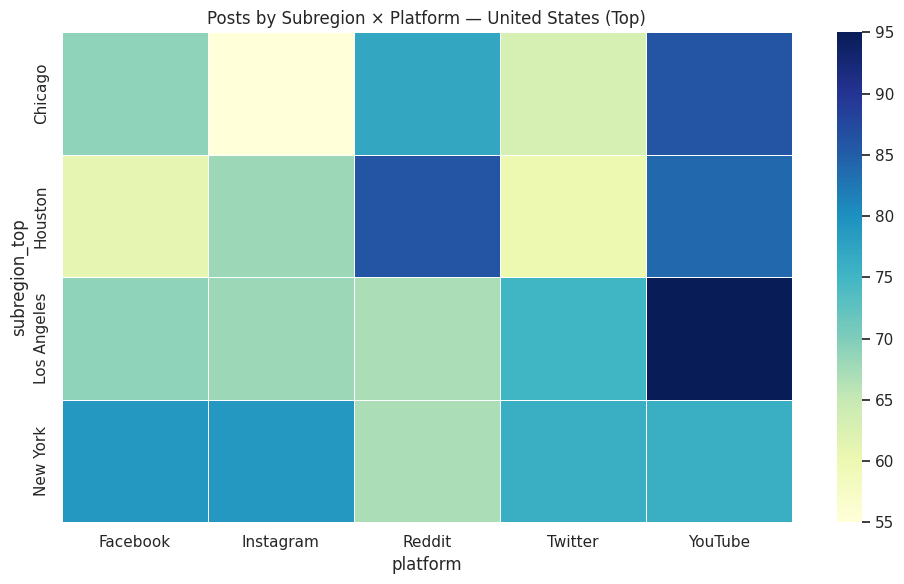

Saved -> outputs/figures/heatmap_subregion_platform_rowshare.png


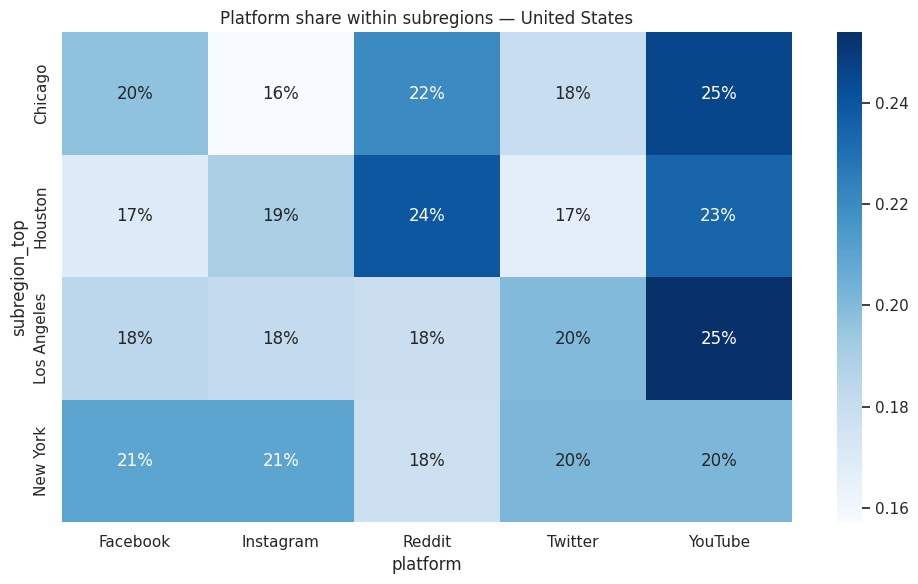

Saved -> outputs/figures/heatmap_subregion_platform_median.png


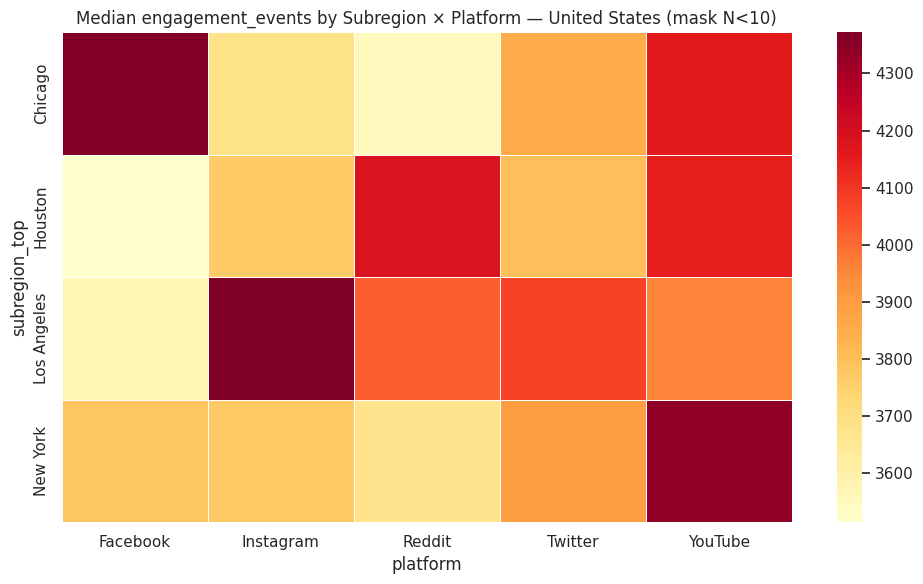

Saved -> outputs/figures/stacked_platform_share_by_subregion_top20.png


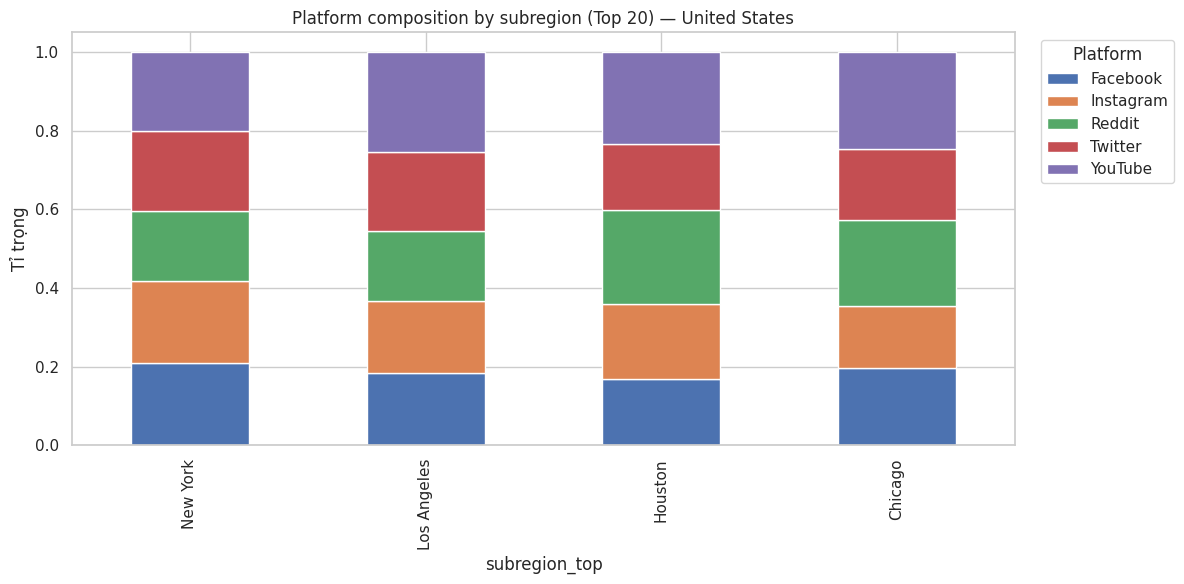

In [ ]:
# G5 — Phân tích cấp tiểu bang/vùng (tự động theo SELECT_COUNTRY)
# ===== G5: Subregion-level for SELECT_COUNTRY =====
if SELECT_COUNTRY is None:
    print("SELECT_COUNTRY=None -> bỏ qua phân tích subregion.")
else:
    # Lọc theo quốc gia đã chọn (đã normalize)
    sub_df = df[df['country'].str.lower() == SELECT_COUNTRY.strip().lower()].copy()
    if sub_df.empty:
        raise ValueError(f"Không có dữ liệu cho SELECT_COUNTRY = {SELECT_COUNTRY}. Kiểm tra lại tên quốc gia sau normalize.")

    # Làm gọn tên subregion (lấy thành phần cuối cùng nếu có dạng 'City/State' -> 'State')
    def top_subregion(s):
        if not isinstance(s, str) or not s.strip(): return np.nan
        parts = [normalize_space(p) for p in s.split("/") if normalize_space(p)]
        return parts[-1] if parts else np.nan

    sub_df['subregion_top'] = sub_df['subregion'].apply(top_subregion)

    # Lấy top subregion theo số bài để tránh quá dày
    TOP_SUBREGIONS = 30
    top_subs = sub_df['subregion_top'].value_counts().head(TOP_SUBREGIONS).index
    sub_top = sub_df[sub_df['subregion_top'].isin(top_subs)].copy()

    # Cross-tab: subregion × platform
    ct_sub = pd.crosstab(sub_top['subregion_top'], sub_top['platform'])
    ct_sub.to_csv("outputs/tables/subregion_platform_counts.csv")
    print("Saved -> outputs/tables/subregion_platform_counts.csv")

    # Heatmap counts
    plt.figure(figsize=(10, max(6, 0.35*len(ct_sub))))
    sns.heatmap(ct_sub, cmap="YlGnBu", annot=False, linewidths=.4)
    plt.title(f"Posts by Subregion × Platform — {SELECT_COUNTRY} (Top)")
    savefig("heatmap_subregion_platform_counts.png")
    plt.show()

    # Row share
    row_share_sub = ct_sub.div(ct_sub.sum(axis=1).replace(0,np.nan), axis=0)
    plt.figure(figsize=(10, max(6, 0.35*len(row_share_sub))))
    sns.heatmap(row_share_sub, cmap="Blues", annot=True, fmt=".0%")
    plt.title(f"Platform share within subregions — {SELECT_COUNTRY}")
    savefig("heatmap_subregion_platform_rowshare.png")
    plt.show()

    # Hiệu quả: median engagement theo subregion × platform (mask N nhỏ)
    metric = 'engagement_events'  # hoặc 'eng_per_1k_impr'
    MIN_SAMPLES = 10
    pmed_sub = sub_top.pivot_table(index='subregion_top', columns='platform', values=metric, aggfunc='median', observed=True)
    pcnt_sub = sub_top.pivot_table(index='subregion_top', columns='platform', values=metric, aggfunc='count', observed=True)
    mask = pcnt_sub < MIN_SAMPLES

    plt.figure(figsize=(10, max(6, 0.35*len(pmed_sub))))
    sns.heatmap(pmed_sub, cmap="YlOrRd", mask=mask, linewidths=.4)
    plt.title(f"Median {metric} by Subregion × Platform — {SELECT_COUNTRY} (mask N<{MIN_SAMPLES})")
    savefig("heatmap_subregion_platform_median.png")
    plt.show()

    # Stacked share theo subregion (Top theo tổng số bài)
    top_for_bar = ct_sub.sum(axis=1).sort_values(ascending=False).head(20).index
    share_top = row_share_sub.loc[top_for_bar]
    ax = share_top.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.ylabel("Tỉ trọng")
    plt.title(f"Platform composition by subregion (Top 20) — {SELECT_COUNTRY}")
    plt.legend(title="Platform", bbox_to_anchor=(1.02, 1), loc='upper left')
    savefig("stacked_platform_share_by_subregion_top20.png")
    plt.show()

In [ ]:
# (Tuỳ chọn) G6 — Gợi ý vẽ bản đồ subregion cho 1 số nước
# ===== G6 (optional): US map example (only if SELECT_COUNTRY == "United States") =====
if SELECT_COUNTRY and SELECT_COUNTRY.strip().lower() in ["united states", "usa", "us"]:

    # Map 'subregion_top' -> state code 2 chữ (rất đơn giản; bạn nên chuẩn hoá kỹ hơn trong thực tế)
    US_STATE_2 = {
        'alabama':'AL','alaska':'AK','arizona':'AZ','arkansas':'AR','california':'CA','colorado':'CO','connecticut':'CT','delaware':'DE',
        'district of columbia':'DC','florida':'FL','georgia':'GA','hawaii':'HI','idaho':'ID','illinois':'IL','indiana':'IN','iowa':'IA',
        'kansas':'KS','kentucky':'KY','louisiana':'LA','maine':'ME','maryland':'MD','massachusetts':'MA','michigan':'MI','minnesota':'MN',
        'mississippi':'MS','missouri':'MO','montana':'MT','nebraska':'NE','nevada':'NV','new hampshire':'NH','new jersey':'NJ','new mexico':'NM',
        'new york':'NY','north carolina':'NC','north dakota':'ND','ohio':'OH','oklahoma':'OK','oregon':'OR','pennsylvania':'PA','rhode island':'RI',
        'south carolina':'SC','south dakota':'SD','tennessee':'TN','texas':'TX','utah':'UT','vermont':'VT','virginia':'VA','washington':'WA',
        'west virginia':'WV','wisconsin':'WI','wyoming':'WY'
    }
    sub_df = df[df['country'].str.lower().eq("united states")].copy()
    sub_df['subregion_top'] = sub_df['subregion'].apply(lambda s: s.split("/")[-1].strip() if isinstance(s,str) else np.nan)
    sub_df['state_code'] = sub_df['subregion_top'].str.lower().map(US_STATE_2)

    us_counts = sub_df.groupby('state_code').size().reset_index(name='count').dropna(subset=['state_code'])
    if not us_counts.empty:
        fig = px.choropleth(
            us_counts, locations='state_code', locationmode='USA-states', color='count',
            scope='usa', color_continuous_scale='Viridis',
            title='Posts by US state'
        )
        fig.show()
    else:
        print("Không map được state_code để vẽ choropleth US.")

In [ ]:
# MỐI QUAN HỆ GIỮA brand_name, product_name, campaign_name, campaign_phase
# B0 — Cài đặt & tiện ích
# ===== B0: Install & setup =====
!pip -q install seaborn plotly

import os, re, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)
os.makedirs("outputs/figures", exist_ok=True)
os.makedirs("outputs/tables", exist_ok=True)

def savefig(name):
    path = f"outputs/figures/{name}"
    plt.tight_layout()
    plt.savefig(path, dpi=160, bbox_inches="tight")
    print("Saved ->", path)

def safe_set_yscale(ax, y):
    s = pd.Series(y).replace([np.inf,-np.inf], np.nan).dropna()
    if s.empty: return "linear"
    y_min, y_max = float(s.min()), float(s.max())
    if y_min > 0:
        ax.set_yscale("log"); return "log"
    elif y_max > 0:
        ax.set_yscale("symlog", linthresh=1); return "symlog"
    return "linear"

print("Ready ✅")

Ready ✅


In [ ]:
# B1 — Đọc dữ liệu & đảm bảo các cột chính
# ===== B1: Load & sanity checks =====
# Nếu bạn đã có df, có thể bỏ qua dòng dưới và giữ nguyên biến df
# DATA_PATH = "/content/Social Media Engagement Dataset.csv"
# df = pd.read_csv(DATA_PATH)

# Dò cột theo alias để tránh lệ thuộc tên tuyệt đối
def pick_col(cands):
    for c in cands:
        if c in df.columns: return c
    return None

brand_col    = pick_col(['brand_name','brand','client'])
product_col  = pick_col(['product_name','product'])
campaign_col = pick_col(['campaign_name','campaign'])
phase_col    = pick_col(['campaign_phase','phase'])

missing = [n for n,v in {
    'brand_name':brand_col, 'product_name':product_col,
    'campaign_name':campaign_col, 'campaign_phase':phase_col
}.items() if v is None]
assert not missing, f"Thiếu các cột: {missing}. Hãy đổi alias ở cell này cho phù hợp."

for c in [brand_col, product_col, campaign_col, phase_col, 'platform', 'impressions', 'likes_count', 'shares_count', 'comments_count']:
    assert c in df.columns, f"Thiếu cột {c}"

# Chuẩn hoá nhẹ
for c in [brand_col, product_col, campaign_col, phase_col, 'platform']:
    df[c] = df[c].astype(str).str.strip()

# Biến mục tiêu tương tác
if 'engagement_events' not in df.columns:
    df['engagement_events'] = df['likes_count'] + df['shares_count'] + df['comments_count']
df['eng_per_1k_impr'] = np.where(df['impressions']>0, 1000*df['engagement_events']/df['impressions'], np.nan)

print({ 'brand_col':brand_col, 'product_col':product_col, 'campaign_col':campaign_col, 'phase_col':phase_col })
print(df.shape)

{'brand_col': 'brand_name', 'product_col': 'product_name', 'campaign_col': 'campaign_name', 'phase_col': 'campaign_phase'}
(12000, 46)


In [ ]:
# B2 — Thống kê nhanh & lọc Top để đồ thị dễ đọc
# ===== B2: Top lists (để tránh biểu đồ quá dày) =====
TOP_BRANDS   = 20
TOP_PRODUCTS = 20
TOP_CAMPAIGNS= 20

top_brands    = df[brand_col].value_counts().head(TOP_BRANDS).index
top_products  = df[product_col].value_counts().head(TOP_PRODUCTS).index
top_campaigns = df[campaign_col].value_counts().head(TOP_CAMPAIGNS).index

print("Top counts:",
      len(top_brands), len(top_products), len(top_campaigns))

Top counts: 10 20 20


Saved table -> brand_by_product_counts.csv
Saved -> outputs/figures/heatmap_brand_product_counts.png


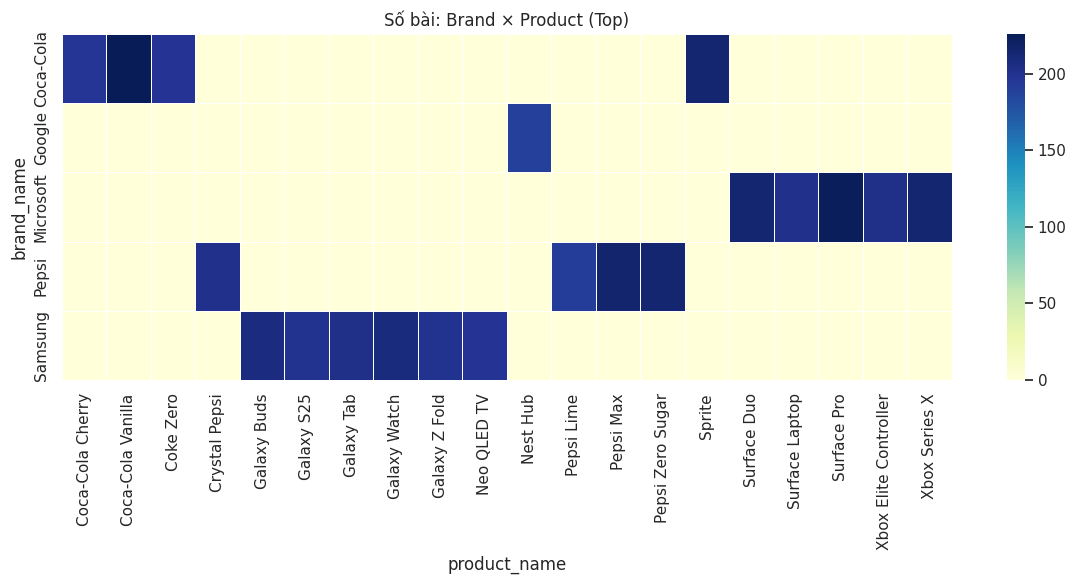

Saved -> outputs/figures/heatmap_brand_product_rowshare.png


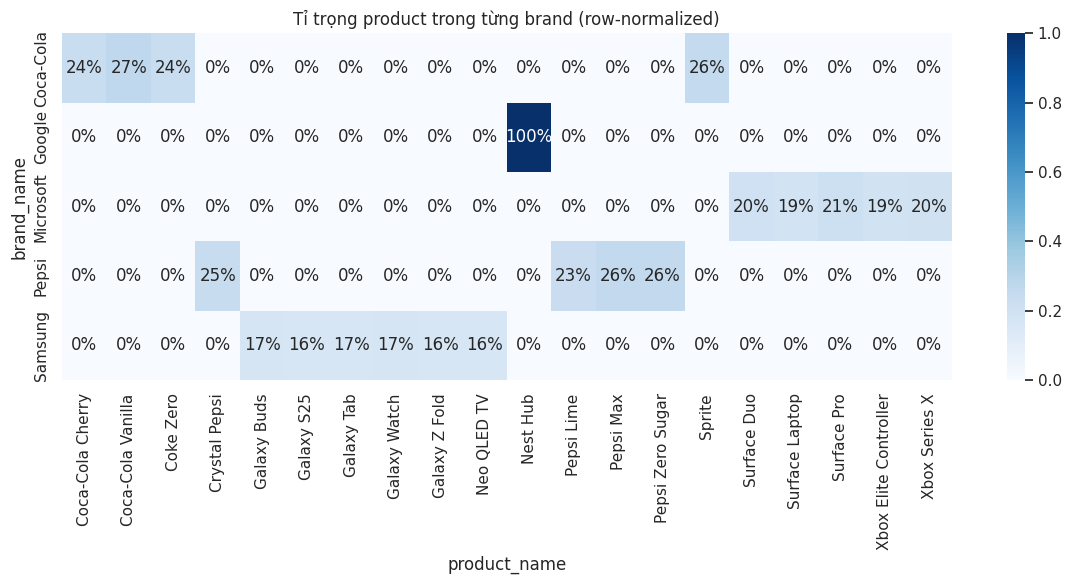

In [ ]:
# B3 — Cross-tab & heatmap: Brand × Product (đếm & tỷ trọng)
# ===== B3: Brand × Product =====
bp = df[df[brand_col].isin(top_brands) & df[product_col].isin(top_products)]
ct_bp = pd.crosstab(bp[brand_col], bp[product_col])
ct_bp.to_csv("outputs/tables/brand_by_product_counts.csv"); print("Saved table -> brand_by_product_counts.csv")

plt.figure(figsize=(12, max(6, 0.35*len(ct_bp))))
sns.heatmap(ct_bp, cmap="YlGnBu", linewidths=.4)
plt.title("Số bài: Brand × Product (Top)")
savefig("heatmap_brand_product_counts.png")
plt.show()

row_share_bp = ct_bp.div(ct_bp.sum(axis=1).replace(0,np.nan), axis=0)
plt.figure(figsize=(12, max(6, 0.35*len(row_share_bp))))
sns.heatmap(row_share_bp, cmap="Blues", annot=True, fmt=".0%")
plt.title("Tỉ trọng product trong từng brand (row-normalized)")
savefig("heatmap_brand_product_rowshare.png")
plt.show()

Saved -> outputs/figures/heatmap_brand_product_median_engagement_events.png


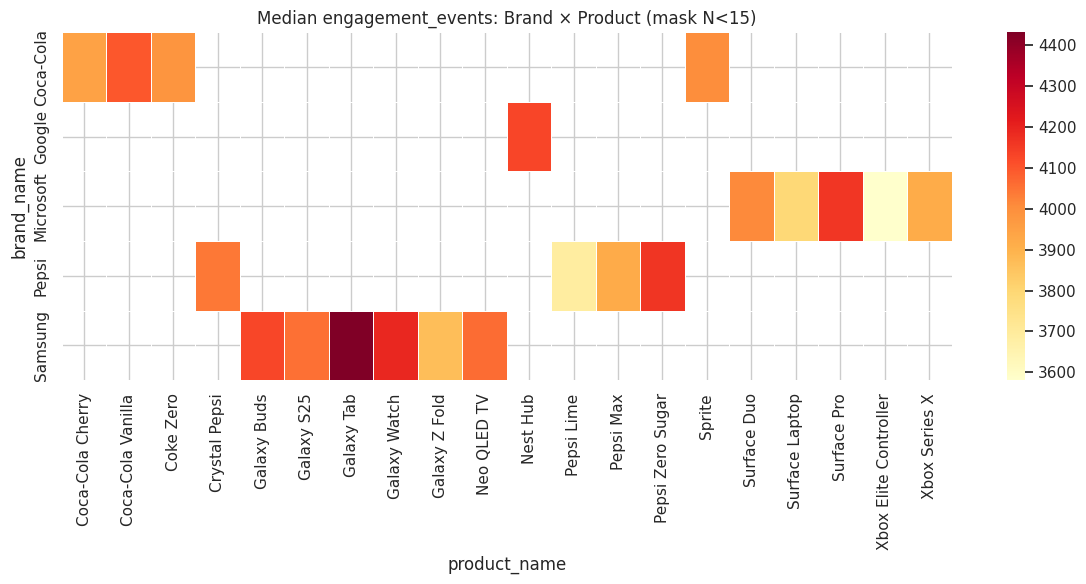

In [ ]:
# B4 — Hiệu quả tương tác: median engagement theo Brand × Product
# ===== B4: Median engagement by Brand × Product =====
metric = 'engagement_events'  # hoặc 'eng_per_1k_impr'
MIN_SAMPLES = 15

piv_med_bp = bp.pivot_table(index=brand_col, columns=product_col, values=metric, aggfunc='median', observed=True)
piv_cnt_bp = bp.pivot_table(index=brand_col, columns=product_col, values=metric, aggfunc='count',  observed=True)
mask = (piv_cnt_bp < MIN_SAMPLES)

plt.figure(figsize=(12, max(6, 0.35*len(piv_med_bp))))
sns.heatmap(piv_med_bp, cmap="YlOrRd", mask=mask, linewidths=.4)
plt.title(f"Median {metric}: Brand × Product (mask N<{MIN_SAMPLES})")
savefig(f"heatmap_brand_product_median_{metric}.png")
plt.show()

piv_med_bp.to_csv(f"outputs/tables/median_{metric}_brand_product.csv")
piv_cnt_bp.to_csv(f"outputs/tables/count_{metric}_brand_product.csv")

Saved table -> campaign_by_phase_counts.csv
Saved -> outputs/figures/heatmap_campaign_phase_counts.png


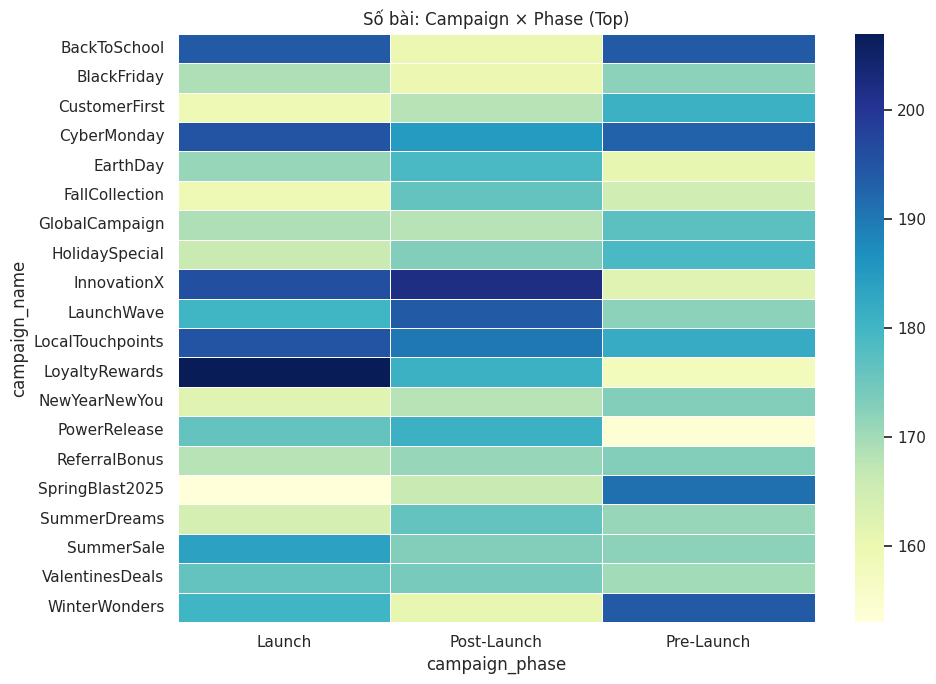

Saved -> outputs/figures/heatmap_campaign_phase_rowshare.png


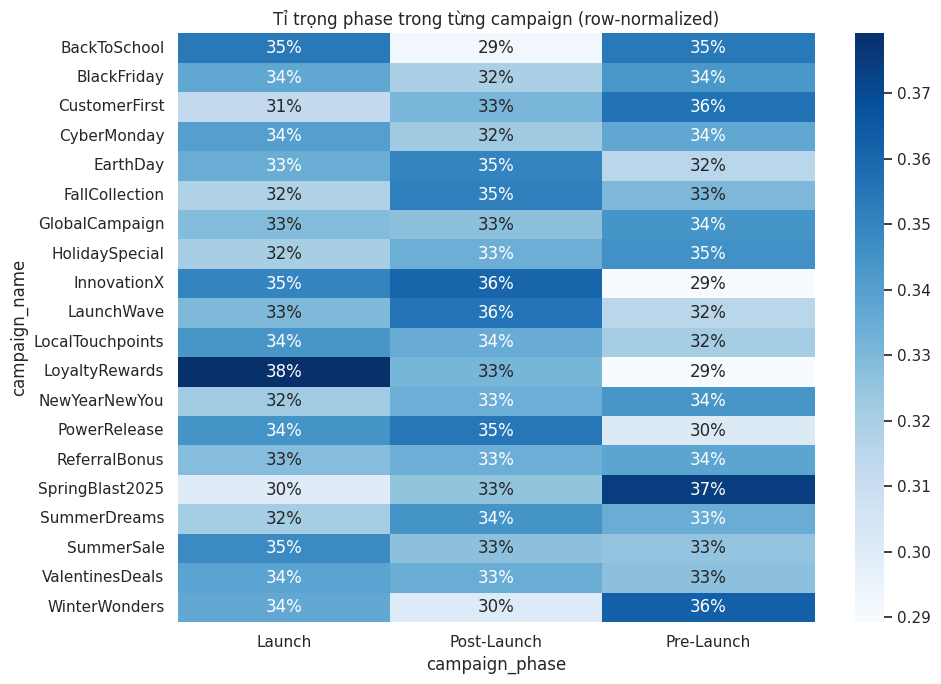

In [ ]:
# B5 — Cross-tab & heatmap: Campaign × Phase (đếm & tỷ trọng)
# ===== B5: Campaign × Phase =====
cp = df[df[campaign_col].isin(top_campaigns)].copy()
ct_cp = pd.crosstab(cp[campaign_col], cp[phase_col])
ct_cp.to_csv("outputs/tables/campaign_by_phase_counts.csv"); print("Saved table -> campaign_by_phase_counts.csv")

plt.figure(figsize=(10, max(6, 0.35*len(ct_cp))))
sns.heatmap(ct_cp, cmap="YlGnBu", linewidths=.4)
plt.title("Số bài: Campaign × Phase (Top)")
savefig("heatmap_campaign_phase_counts.png")
plt.show()

row_share_cp = ct_cp.div(ct_cp.sum(axis=1).replace(0,np.nan), axis=0)
plt.figure(figsize=(10, max(6, 0.35*len(row_share_cp))))
sns.heatmap(row_share_cp, cmap="Blues", annot=True, fmt=".0%")
plt.title("Tỉ trọng phase trong từng campaign (row-normalized)")
savefig("heatmap_campaign_phase_rowshare.png")
plt.show()

Saved -> outputs/figures/heatmap_campaign_phase_median_engagement_events.png


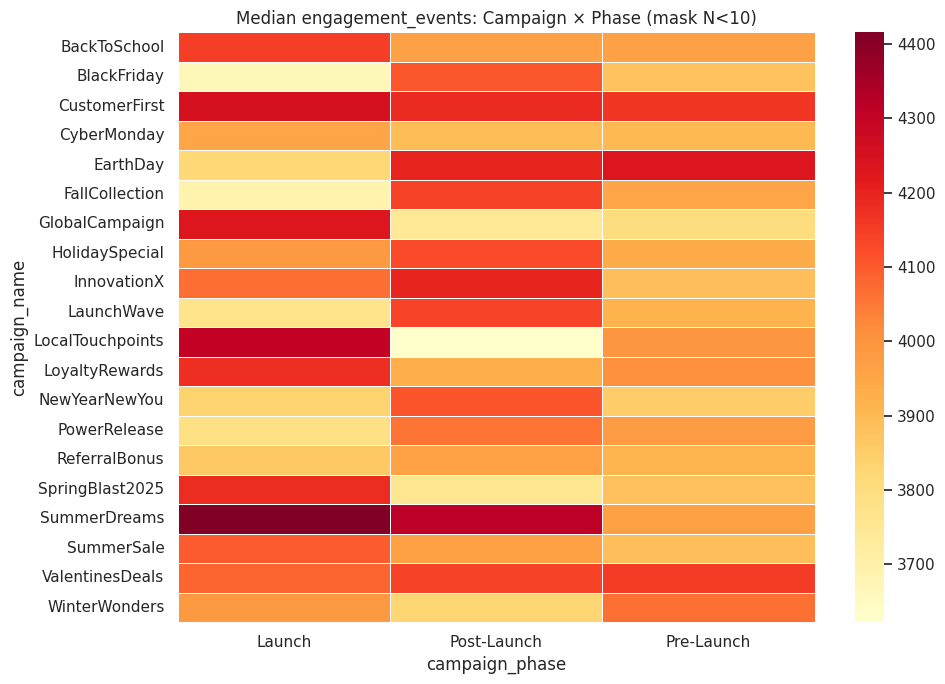

In [ ]:
# B6 — Hiệu quả tương tác: median engagement theo Campaign × Phase
# ===== B6: Median engagement by Campaign × Phase =====
metric = 'engagement_events'  # hoặc 'eng_per_1k_impr'
MIN_SAMPLES = 10

piv_med_cp = cp.pivot_table(index=campaign_col, columns=phase_col, values=metric, aggfunc='median', observed=True)
piv_cnt_cp = cp.pivot_table(index=campaign_col, columns=phase_col, values=metric, aggfunc='count',  observed=True)
mask = (piv_cnt_cp < MIN_SAMPLES)

plt.figure(figsize=(10, max(6, 0.35*len(piv_med_cp))))
sns.heatmap(piv_med_cp, cmap="YlOrRd", mask=mask, linewidths=.4)
plt.title(f"Median {metric}: Campaign × Phase (mask N<{MIN_SAMPLES})")
savefig(f"heatmap_campaign_phase_median_{metric}.png")
plt.show()

piv_med_cp.to_csv(f"outputs/tables/median_{metric}_campaign_phase.csv")
piv_cnt_cp.to_csv(f"outputs/tables/count_{metric}_campaign_phase.csv")

Saved -> outputs/figures/heatmap_brand_phase_counts.png


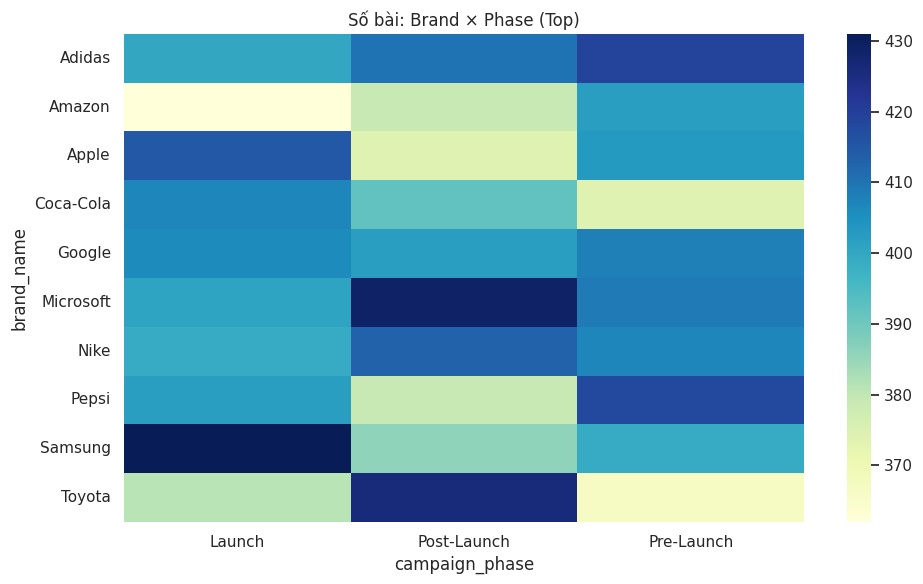

Saved -> outputs/figures/heatmap_product_phase_counts.png


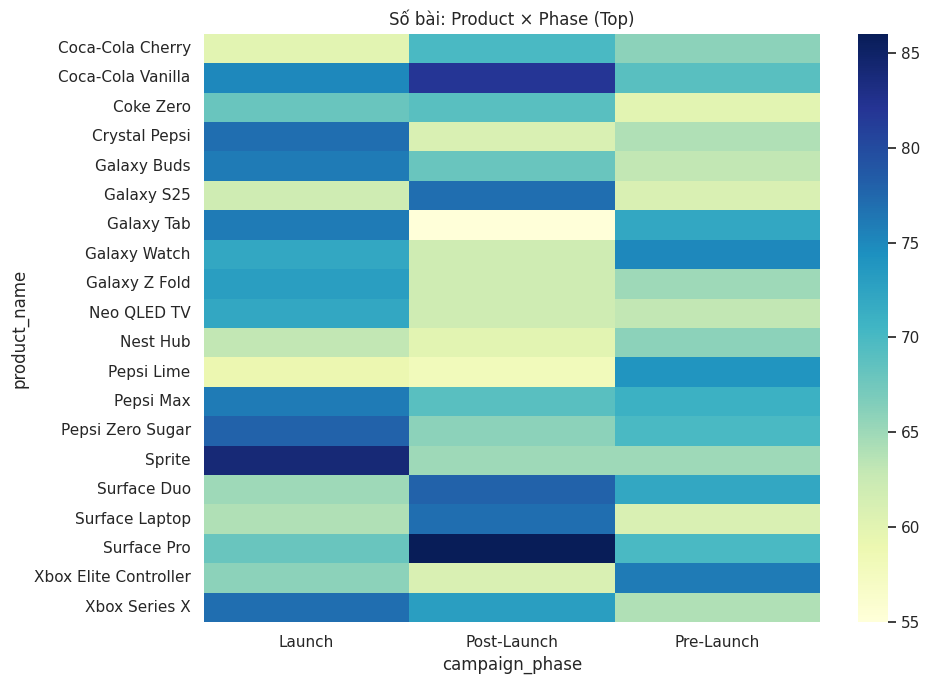

Saved -> outputs/figures/heatmap_brand_phase_median.png


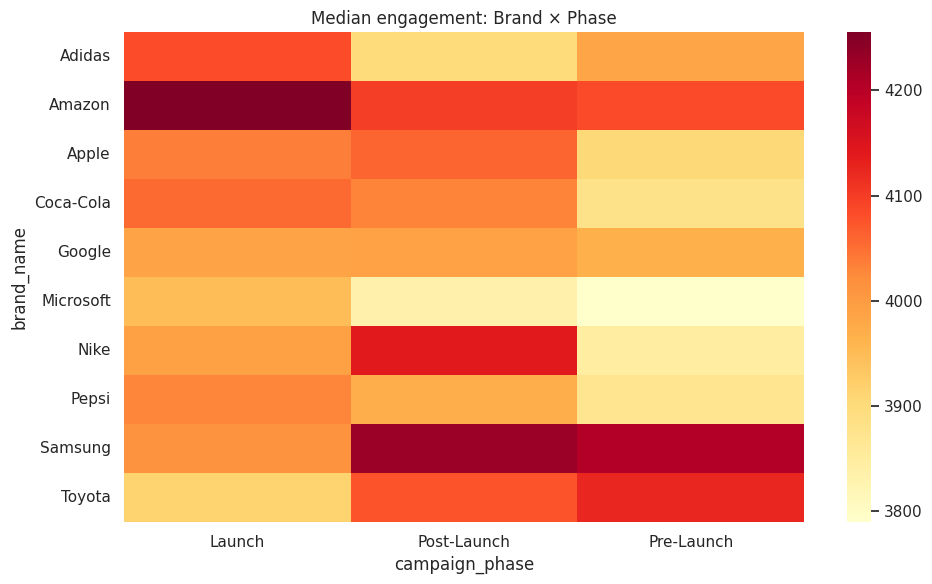

Saved -> outputs/figures/heatmap_product_phase_median.png


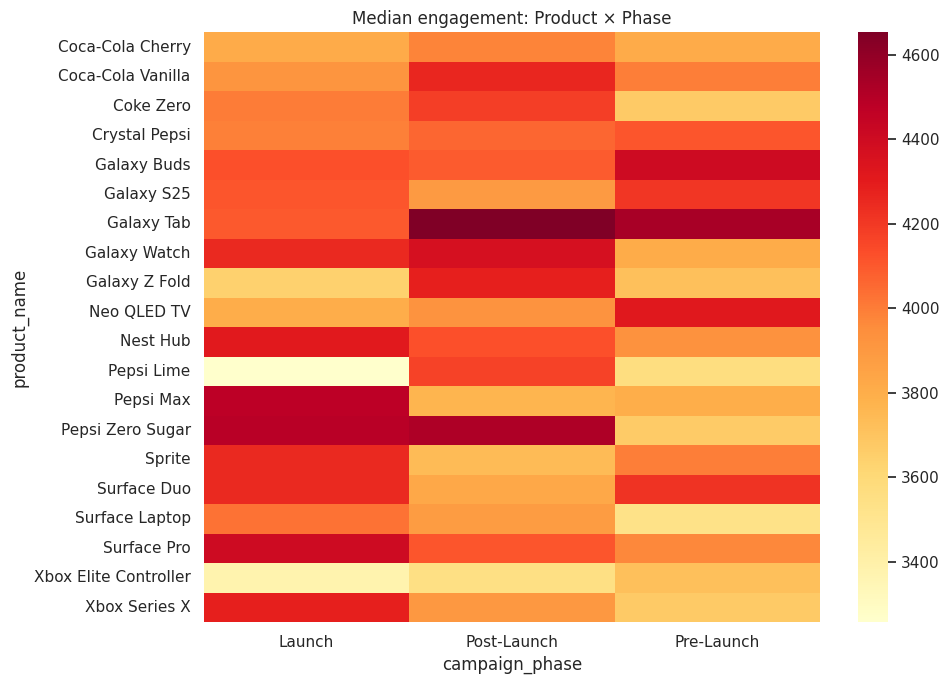

In [ ]:
# B7 — Cross-tab & heatmap: Brand × Phase và Product × Phase
# ===== B7: Brand × Phase & Product × Phase =====
bph = df[df[brand_col].isin(top_brands)]
ct_bph = pd.crosstab(bph[brand_col], bph[phase_col])
plt.figure(figsize=(10, max(6, 0.35*len(ct_bph)))); sns.heatmap(ct_bph, cmap="YlGnBu"); plt.title("Số bài: Brand × Phase (Top)"); savefig("heatmap_brand_phase_counts.png"); plt.show()

pph = df[df[product_col].isin(top_products)]
ct_pph = pd.crosstab(pph[product_col], pph[phase_col])
plt.figure(figsize=(10, max(6, 0.35*len(ct_pph)))); sns.heatmap(ct_pph, cmap="YlGnBu"); plt.title("Số bài: Product × Phase (Top)"); savefig("heatmap_product_phase_counts.png"); plt.show()

# Median engagement cho 2 bảng trên (mask theo MIN_SAMPLES)
metric, MIN_SAMPLES = 'engagement_events', 10

piv_bph = bph.pivot_table(index=brand_col, columns=phase_col, values=metric, aggfunc='median', observed=True)
cnt_bph = bph.pivot_table(index=brand_col, columns=phase_col, values=metric, aggfunc='count',  observed=True)
plt.figure(figsize=(10, max(6, 0.35*len(piv_bph))))
sns.heatmap(piv_bph, cmap="YlOrRd", mask=(cnt_bph<MIN_SAMPLES)); plt.title("Median engagement: Brand × Phase"); savefig("heatmap_brand_phase_median.png"); plt.show()

piv_pph = pph.pivot_table(index=product_col, columns=phase_col, values=metric, aggfunc='median', observed=True)
cnt_pph = pph.pivot_table(index=product_col, columns=phase_col, values=metric, aggfunc='count',  observed=True)
plt.figure(figsize=(10, max(6, 0.35*len(piv_pph))))
sns.heatmap(piv_pph, cmap="YlOrRd", mask=(cnt_pph<MIN_SAMPLES)); plt.title("Median engagement: Product × Phase"); savefig("heatmap_product_phase_median.png"); plt.show()

In [ ]:
# B8 — Sankey: luồng Brand → Product → Campaign → Phase (tương tác theo số bài)
# ===== B8: Sankey Brand -> Product -> Campaign -> Phase =====
# Lấy top để sankey không quá dày
sankey_df = df[
    df[brand_col].isin(top_brands) &
    df[product_col].isin(top_products) &
    df[campaign_col].isin(top_campaigns)
][[brand_col, product_col, campaign_col, phase_col]].copy()

# Tạo node list
levels = [brand_col, product_col, campaign_col, phase_col]
nodes = []
for lv in levels:
    nodes += list(sankey_df[lv].astype(str).unique())
nodes = pd.Index(nodes).unique().tolist()
node_index = {n:i for i,n in enumerate(nodes)}

# Tạo các cạnh giữa từng cặp cấp
def edge_counts(df_, a, b):
    return (df_.groupby([a,b]).size().reset_index(name='count')
            .assign(source=lambda d: d[a].map(node_index),
                    target=lambda d: d[b].map(node_index)))

edges = []
for i in range(len(levels)-1):
    edges.append(edge_counts(sankey_df, levels[i], levels[i+1]))
links = pd.concat(edges, ignore_index=True)

fig = go.Figure(go.Sankey(
    node=dict(label=nodes, pad=12, thickness=12),
    link=dict(source=links['source'], target=links['target'], value=links['count'])
))
fig.update_layout(title_text="Sankey: Brand → Product → Campaign → Phase (by post count)")
fig.show()

Saved -> outputs/figures/top10_brand_median_engagement_events_phase_Post-Launch.png


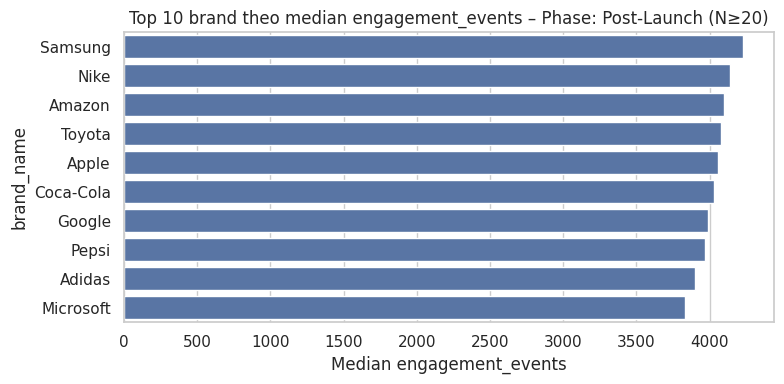

Saved -> outputs/figures/top10_brand_median_engagement_events_phase_Launch.png


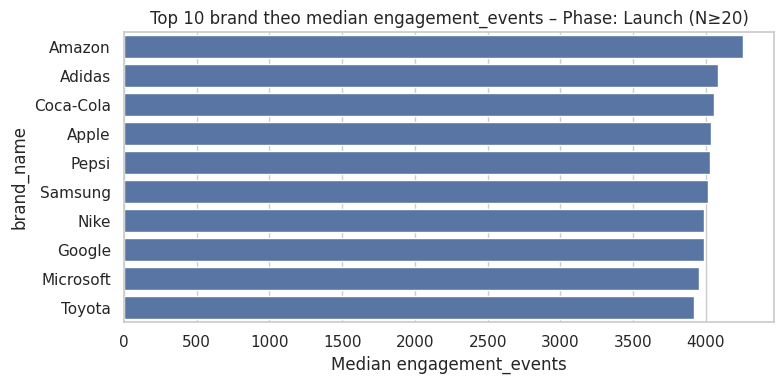

Saved -> outputs/figures/top10_brand_median_engagement_events_phase_Pre-Launch.png


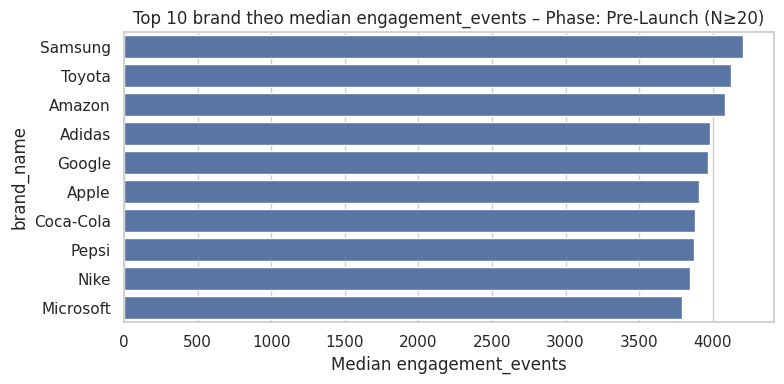

In [ ]:
# B9 — Top theo platform trong từng phase/campaign (gợi ý đọc insight)
# ===== B9: Extra views =====
# Top brand trong từng phase theo median engagement
metric = 'engagement_events'; MIN_SAMPLES = 20
for ph in df[phase_col].dropna().unique():
    sub = df[df[phase_col]==ph].groupby(brand_col).agg(
        n=(metric,'count'), med=(metric,'median')
    ).query("n >= @MIN_SAMPLES").sort_values('med', ascending=False).head(10)
    if sub.empty: continue
    plt.figure(figsize=(8,4))
    sns.barplot(x=sub['med'].values, y=sub.index)
    plt.title(f"Top 10 brand theo median {metric} – Phase: {ph} (N≥{MIN_SAMPLES})")
    plt.xlabel(f"Median {metric}")
    savefig(f"top10_brand_median_{metric}_phase_{ph}.png")
    plt.show()

In [ ]:
# B10 — Định lượng mối liên hệ: Chi-square & Cramér’s V
# ===== B10: Association strength (Cramér's V) =====
from scipy.stats import chi2_contingency

def cramers_v(ct):
    chi2, p, dof, _ = chi2_contingency(ct)
    n = ct.values.sum()
    phi2 = chi2 / n
    r, k = ct.shape
    return np.sqrt(phi2 / (min(k-1, r-1))), chi2, p, dof

pairs = [
    (brand_col, product_col, "Brand × Product"),
    (brand_col, phase_col,   "Brand × Phase"),
    (product_col, phase_col, "Product × Phase"),
    (campaign_col, phase_col,"Campaign × Phase"),
]

for a,b,name in pairs:
    ct = pd.crosstab(df[a], df[b])
    v, chi2, p, dof = cramers_v(ct)
    print(f"{name:<22} | Cramér's V = {v:.3f} | chi2={chi2:,.0f} | dof={dof} | p={p:.3e}")

Brand × Product        | Cramér's V = 1.000 | chi2=108,000 | dof=621 | p=0.000e+00
Brand × Phase          | Cramér's V = 0.027 | chi2=17 | dof=18 | p=5.314e-01
Product × Phase        | Cramér's V = 0.076 | chi2=137 | dof=138 | p=4.989e-01
Campaign × Phase       | Cramér's V = 0.042 | chi2=43 | dof=44 | p=5.059e-01


In [ ]:
# MỐI QUAN HỆ GIỮA hashtags, keywords, topic_category
# HK0 — Cài đặt & tiện ích
# ===== HK0: Install & setup =====
!pip -q install seaborn plotly

import os, re, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)
os.makedirs("outputs/figures", exist_ok=True)
os.makedirs("outputs/tables", exist_ok=True)

def savefig(name):
    path = f"outputs/figures/{name}"
    plt.tight_layout()
    plt.savefig(path, dpi=160, bbox_inches="tight")
    print("Saved ->", path)

print("Ready ✅")

Ready ✅


In [ ]:
# HK1 — Đọc dữ liệu & cấu hình chung
# ===== HK1: Load & config =====
# Nếu đã có df rồi thì bỏ qua 2 dòng dưới:
# DATA_PATH = "/content/Social Media Engagement Dataset.csv"
# df = pd.read_csv(DATA_PATH)

# Aliases cột
def pick_col(cands):
    for c in cands:
        if c in df.columns: return c
    return None

topic_col   = pick_col(['topic_category','topic'])
hashtags_col= pick_col(['hashtags','hash_tags'])
keywords_col= pick_col(['keywords','key_words'])

assert topic_col and hashtags_col and keywords_col, \
    f"Thiếu cột. Tìm thấy: topic={topic_col}, hashtags={hashtags_col}, keywords={keywords_col}"

# Đảm bảo cột tương tác
for c in ['impressions','likes_count','shares_count','comments_count']:
    assert c in df.columns, f"Thiếu cột {c}"

# Metric (đổi tại đây nếu muốn chuẩn hoá theo impressions)
METRIC = 'engagement_events'     # 'engagement_events' hoặc 'eng_per_1k_impr'
if 'engagement_events' not in df.columns:
    df['engagement_events'] = df['likes_count'] + df['shares_count'] + df['comments_count']
df['eng_per_1k_impr'] = np.where(df['impressions']>0, 1000*df['engagement_events']/df['impressions'], np.nan)

# Chuẩn hoá topic
df[topic_col] = df[topic_col].astype(str).str.strip()
print("Columns:", {"topic":topic_col, "hashtags":hashtags_col, "keywords":keywords_col, "metric":METRIC})

Columns: {'topic': 'topic_category', 'hashtags': 'hashtags', 'keywords': 'keywords', 'metric': 'engagement_events'}


In [ ]:
# HK2 — Tách chuẩn hashtags & keywords (đa trị → list chuẩn hoá)
# ===== HK2: Parse multi-valued hashtags/keywords =====
TAG_MINLEN = 2  # bỏ các token 1 ký tự

_hash_pattern = re.compile(r"#?([A-Za-z0-9_]+)")  # giữ chữ, số, underscore
_sep_pattern  = re.compile(r"[,\;\|\s]+")         # dấu phân tách chung

def parse_hashtags(s):
    if not isinstance(s, str): return []
    # Nếu chuỗi có '#', lấy theo regex; nếu không, tách theo dấu phân tách
    tokens = []
    if "#" in s:
        tokens = [m.group(1) for m in _hash_pattern.finditer(s)]
    else:
        tokens = [t for t in _sep_pattern.split(s) if t]
    # chuẩn hoá: lower, bỏ '#', bỏ token quá ngắn, khử trùng trong 1 post
    tokens = [t.lower().lstrip("#").strip("_") for t in tokens]
    tokens = [t for t in tokens if len(t) >= TAG_MINLEN]
    return sorted(set(tokens))

def parse_keywords(s):
    if not isinstance(s, str): return []
    # tách theo dấu phân tách chung, bỏ rỗng
    tokens = [t for t in _sep_pattern.split(s) if t]
    # chuẩn hoá nhẹ
    tokens = [re.sub(r"[^A-Za-z0-9_]+", " ", t).strip().lower() for t in tokens]
    tokens = [t for t in tokens if len(t) >= TAG_MINLEN]
    return sorted(set(tokens))

df['_hashtags_list'] = df[hashtags_col].apply(parse_hashtags)
df['_keywords_list'] = df[keywords_col].apply(parse_keywords)

print("Ví dụ tokens:")
display(df[[hashtags_col, '_hashtags_list', keywords_col, '_keywords_list', topic_col]].head(5))

Ví dụ tokens:


hashtags                       _hashtags_list                                           keywords  \
6988  #Premium, #Lifestyle, #ProductLaunch  [lifestyle, premium, productlaunch]  sustainable, satisfaction, delivery, recommend...   
2147                    #Fashion, #Quality                   [fashion, quality]                          helpful, poor, responsive   
9981                  #Tech, #SpecialOffer                 [specialoffer, tech]                    recommendation, unique, helpful   
6000                       #Sale, #Fashion                      [fashion, sale]            price, outdated, user-friendly, quality   
1431                            #Lifestyle                          [lifestyle]                   slow, experience, price, helpful   

                                         _keywords_list topic_category  
6988  [delivery, recommendation, satisfaction, susta...        Pricing  
2147                        [helpful, poor, responsive]        Returns  
9981                  [helpful, recommendation, unique]        Returns  
6000          [outdated, price, quality, user friendly]        Pricing  
1431                 [experience, helpful, price, slow]        Product

In [ ]:
# HK3 — Explode & bảng đếm / hiệu quả theo Topic × Hashtag và Topic × Keyword
# ===== HK3: Explode & aggregates =====
# Explode hashtags
h = df[[topic_col, METRIC, '_hashtags_list']].explode('_hashtags_list')
h = h.rename(columns={'_hashtags_list':'hashtag'}).dropna(subset=['hashtag'])

# Explode keywords
k = df[[topic_col, METRIC, '_keywords_list']].explode('_keywords_list')
k = k.rename(columns={'_keywords_list':'keyword'}).dropna(subset=['keyword'])

# Đếm tổng & hiệu quả (median metric) theo topic × hashtag/keyword
agg_h = h.groupby([topic_col,'hashtag']).agg(
    n=('hashtag','count'),
    med=(METRIC,'median')
).reset_index()

agg_k = k.groupby([topic_col,'keyword']).agg(
    n=('keyword','count'),
    med=(METRIC,'median')
).reset_index()

# Lưu bảng tổng hợp
agg_h.to_csv("outputs/tables/topic_hashtag_agg.csv", index=False)
agg_k.to_csv("outputs/tables/topic_keyword_agg.csv", index=False)
print("Saved -> topic_hashtag_agg.csv & topic_keyword_agg.csv")
display(agg_h.head()), display(agg_k.head())

Saved -> topic_hashtag_agg.csv & topic_keyword_agg.csv


topic_category          hashtag    n     med
0       Delivery       affordable  147  3949.0
1       Delivery           beauty  141  4167.0
2       Delivery        bestvalue  135  3729.0
3       Delivery  customerservice  147  3738.0
4       Delivery             deal  163  3896.0

topic_category      keyword    n     med
0       Delivery      amazing  160  3999.0
1       Delivery       budget  159  4060.0
2       Delivery        cheap  145  3975.0
3       Delivery  competitive  159  3992.0
4       Delivery     customer  134  4580.0

(None, None)

Saved -> outputs/figures/heatmap_topic_hashtag_counts.png


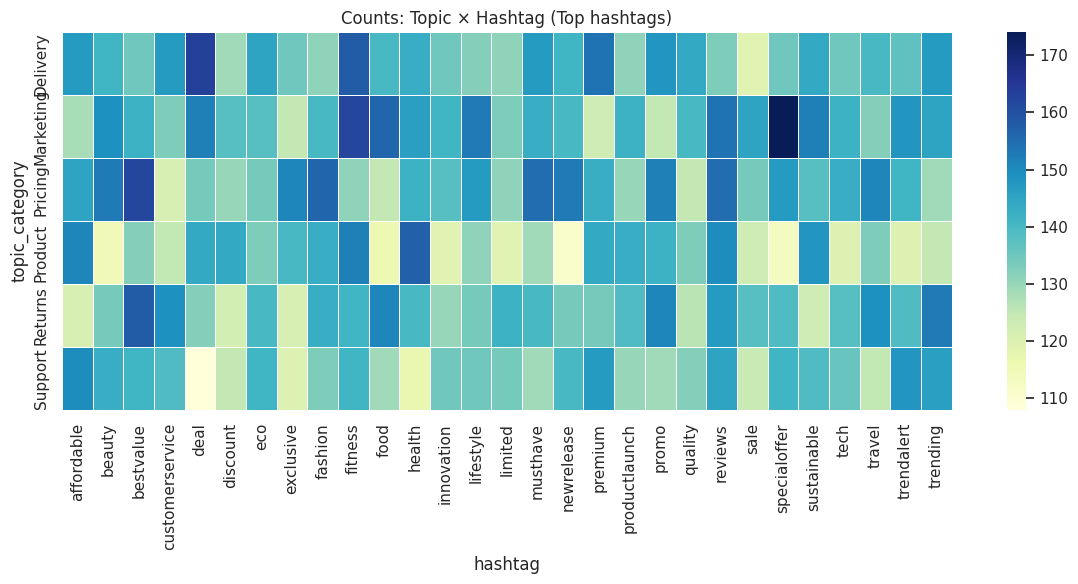

Saved -> outputs/figures/heatmap_topic_hashtag_median_engagement_events.png


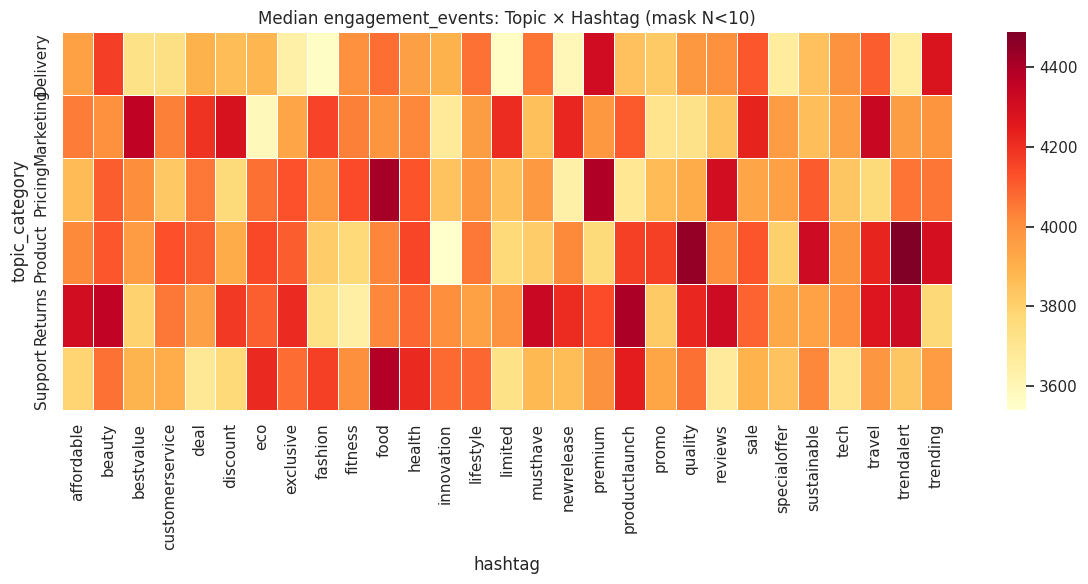

In [ ]:
# HK4 — Heatmap: Topic × Hashtag (đếm) và (median metric)
# ===== HK4: Heatmap Topic × Hashtag =====
TOP_HASHTAGS = 30
# chọn top theo tổng đếm toàn cục (không phân biệt topic)
top_h_global = (h.groupby('hashtag').size().sort_values(ascending=False).head(TOP_HASHTAGS)).index
h_top = h[h['hashtag'].isin(top_h_global)]

ct_h = pd.crosstab(h_top[topic_col], h_top['hashtag'])
ct_h.to_csv("outputs/tables/topic_by_hashtag_counts.csv")
plt.figure(figsize=(12, max(6, 0.5*len(ct_h))))
sns.heatmap(ct_h, cmap="YlGnBu", linewidths=.4)
plt.title("Counts: Topic × Hashtag (Top hashtags)")
savefig("heatmap_topic_hashtag_counts.png")
plt.show()

# Median metric (mask ô có ít dữ liệu)
MIN_SAMPLES = 10
piv_med_h = h_top.pivot_table(index=topic_col, columns='hashtag', values=METRIC, aggfunc='median', observed=True)
piv_cnt_h = h_top.pivot_table(index=topic_col, columns='hashtag', values=METRIC, aggfunc='count',  observed=True)
mask = (piv_cnt_h < MIN_SAMPLES)
plt.figure(figsize=(12, max(6, 0.5*len(piv_med_h))))
sns.heatmap(piv_med_h, cmap="YlOrRd", mask=mask, linewidths=.4)
plt.title(f"Median {METRIC}: Topic × Hashtag (mask N<{MIN_SAMPLES})")
savefig(f"heatmap_topic_hashtag_median_{METRIC}.png")
plt.show()

Saved -> outputs/figures/heatmap_topic_keyword_counts.png


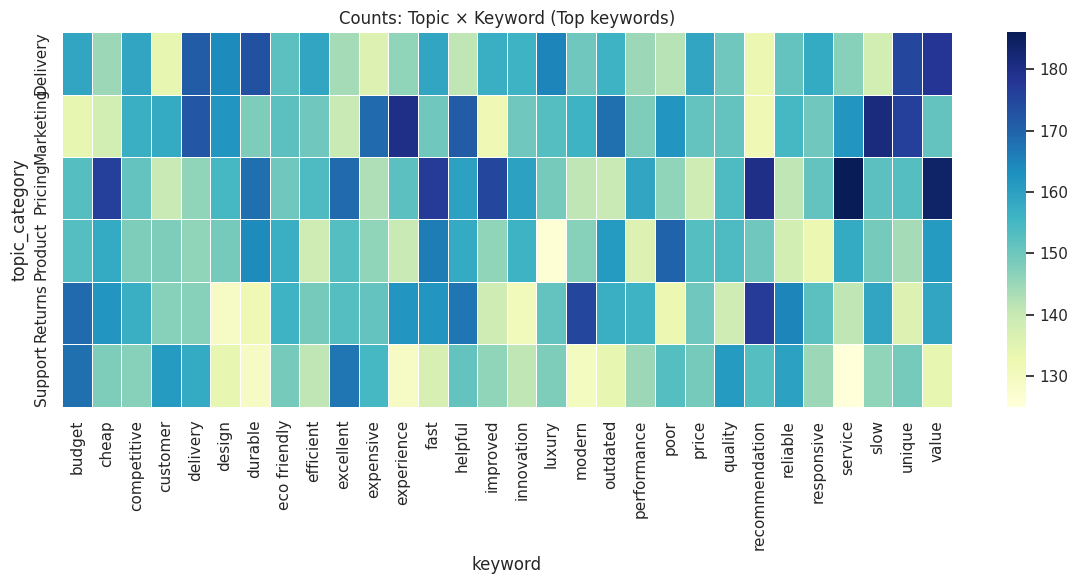

Saved -> outputs/figures/heatmap_topic_keyword_median_engagement_events.png


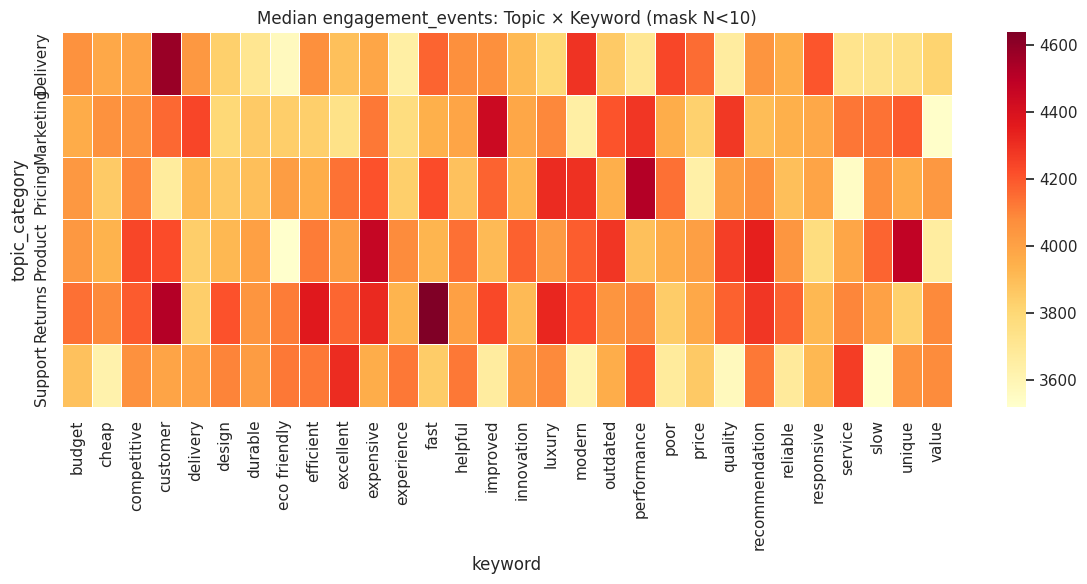

In [ ]:
# HK5 — Heatmap: Topic × Keyword (đếm) và (median metric)
# ===== HK5: Heatmap Topic × Keyword =====
TOP_KEYWORDS = 30
top_k_global = (k.groupby('keyword').size().sort_values(ascending=False).head(TOP_KEYWORDS)).index
k_top = k[k['keyword'].isin(top_k_global)]

ct_k = pd.crosstab(k_top[topic_col], k_top['keyword'])
ct_k.to_csv("outputs/tables/topic_by_keyword_counts.csv")
plt.figure(figsize=(12, max(6, 0.5*len(ct_k))))
sns.heatmap(ct_k, cmap="YlGnBu", linewidths=.4)
plt.title("Counts: Topic × Keyword (Top keywords)")
savefig("heatmap_topic_keyword_counts.png")
plt.show()

MIN_SAMPLES = 10
piv_med_k = k_top.pivot_table(index=topic_col, columns='keyword', values=METRIC, aggfunc='median', observed=True)
piv_cnt_k = k_top.pivot_table(index=topic_col, columns='keyword', values=METRIC, aggfunc='count',  observed=True)
mask = (piv_cnt_k < MIN_SAMPLES)
plt.figure(figsize=(12, max(6, 0.5*len(piv_med_k))))
sns.heatmap(piv_med_k, cmap="YlOrRd", mask=mask, linewidths=.4)
plt.title(f"Median {METRIC}: Topic × Keyword (mask N<{MIN_SAMPLES})")
savefig(f"heatmap_topic_keyword_median_{METRIC}.png")
plt.show()

Saved -> outputs/figures/top10_hashtags_topic_Pricing.png


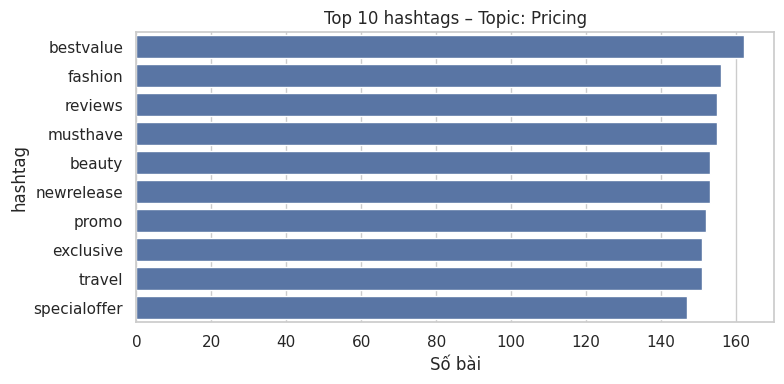

Saved -> outputs/figures/top10_keywords_topic_Pricing.png


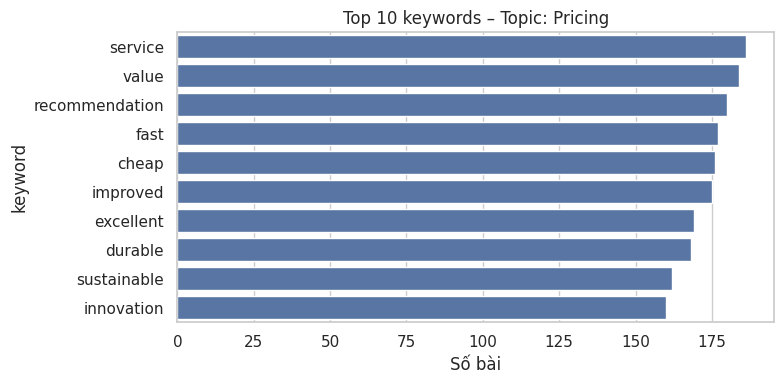

Saved -> outputs/figures/top10_hashtags_topic_Returns.png


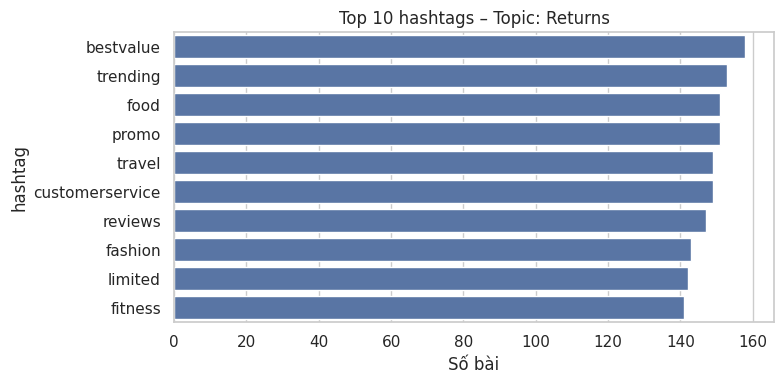

Saved -> outputs/figures/top10_keywords_topic_Returns.png


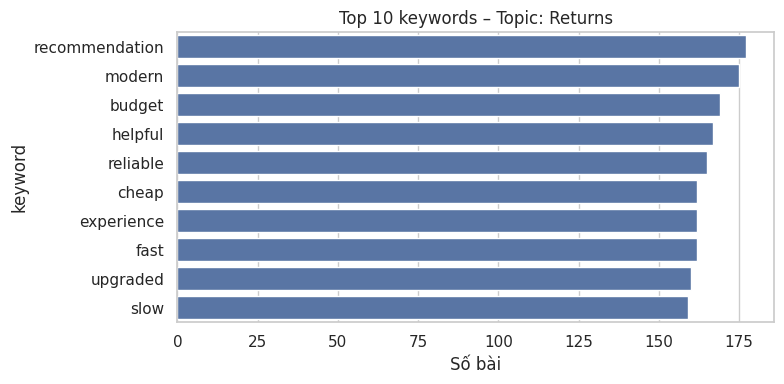

Saved -> outputs/figures/top10_hashtags_topic_Product.png


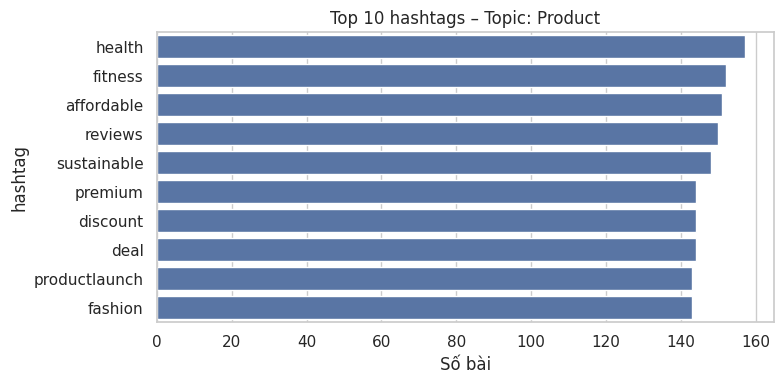

Saved -> outputs/figures/top10_keywords_topic_Product.png


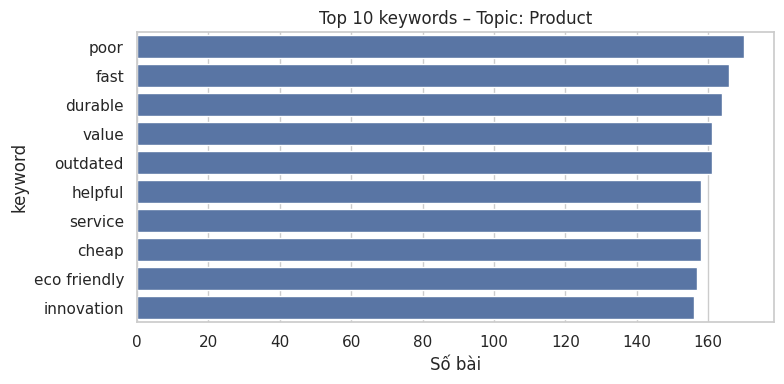

Saved -> outputs/figures/top10_hashtags_topic_Delivery.png


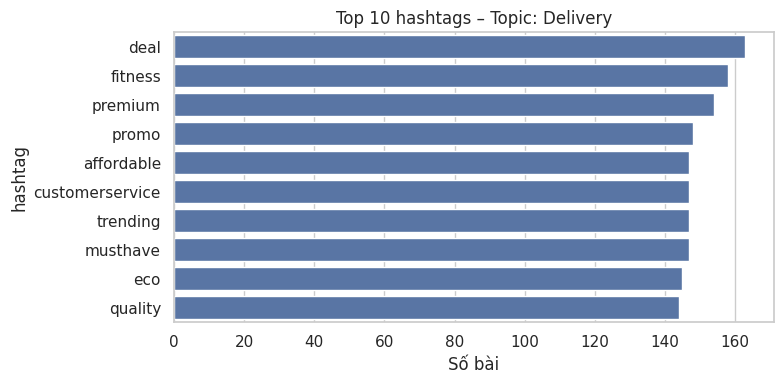

Saved -> outputs/figures/top10_keywords_topic_Delivery.png


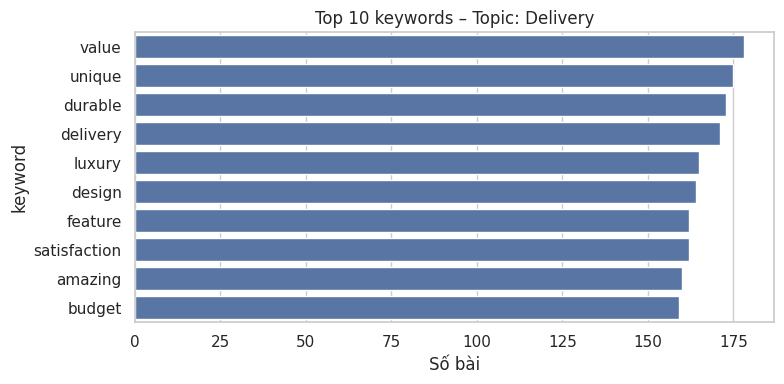

Saved -> outputs/figures/top10_hashtags_topic_Marketing.png


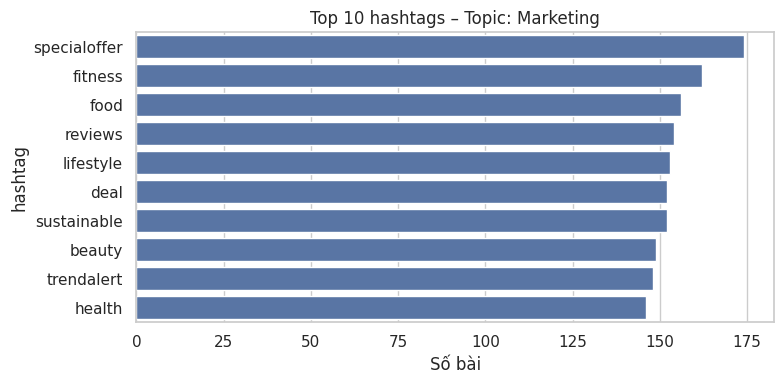

Saved -> outputs/figures/top10_keywords_topic_Marketing.png


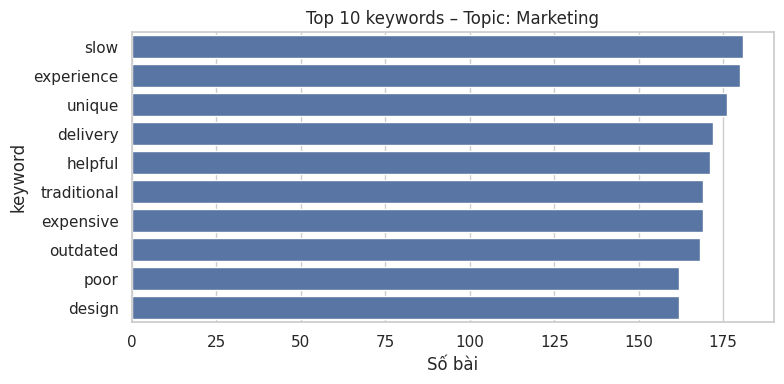

Saved -> outputs/figures/top10_hashtags_topic_Support.png


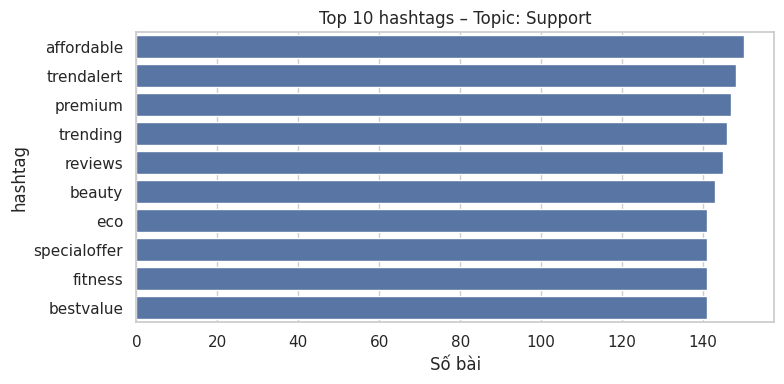

Saved -> outputs/figures/top10_keywords_topic_Support.png


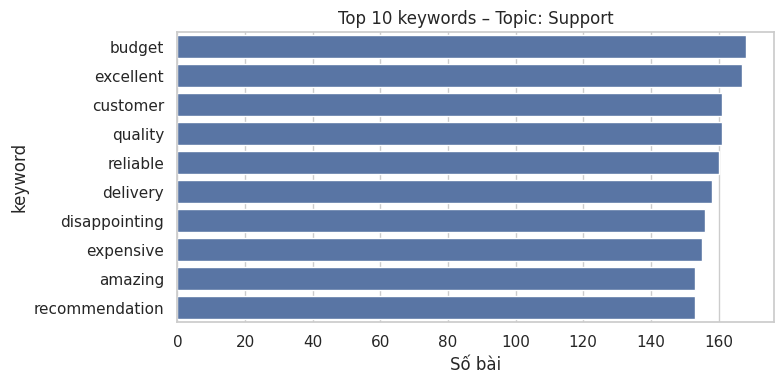

In [ ]:
# HK6 — Top N hashtags/keywords theo từng topic (barplot)
# ===== HK6: Top tags per topic =====
N = 10  # số lượng hiển thị mỗi topic

for tpc in df[topic_col].dropna().unique():
    sub_h = (h[h[topic_col]==tpc]['hashtag'].value_counts().head(N))
    if not sub_h.empty:
        plt.figure(figsize=(8,4))
        sns.barplot(x=sub_h.values, y=sub_h.index)
        plt.title(f"Top {N} hashtags – Topic: {tpc}")
        plt.xlabel("Số bài")
        savefig(f"top{N}_hashtags_topic_{tpc}.png")
        plt.show()

    sub_k = (k[k[topic_col]==tpc]['keyword'].value_counts().head(N))
    if not sub_k.empty:
        plt.figure(figsize=(8,4))
        sns.barplot(x=sub_k.values, y=sub_k.index)
        plt.title(f"Top {N} keywords – Topic: {tpc}")
        plt.xlabel("Số bài")
        savefig(f"top{N}_keywords_topic_{tpc}.png")
        plt.show()

In [ ]:
# HK7 — Sankey: Topic → Hashtag (top) và Topic → Keyword (top)
# ===== HK7: Sankey Topic -> Hashtag / Keyword =====
# ===== HK7 (FIXED): Sankey Topic -> Hashtag / Keyword =====
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def sankey_topic_to_tag(df_edges, src_col, dst_col, title, min_count=1):
    """
    df_edges: DataFrame gồm 2 cột [src_col, dst_col]
    min_count: chỉ vẽ các cạnh có tần suất >= min_count
    """
    # Bỏ NaN và ép về str để map ổn định
    df_edges = df_edges.dropna(subset=[src_col, dst_col]).copy()
    df_edges[src_col] = df_edges[src_col].astype(str)
    df_edges[dst_col] = df_edges[dst_col].astype(str)

    # Đếm số lần xuất hiện cho mỗi cạnh
    links = (df_edges.groupby([src_col, dst_col])
                       .size().reset_index(name='count'))
    if min_count > 1:
        links = links[links['count'] >= min_count]

    if links.empty:
        print(f"[Sankey] Không có dữ liệu sau khi lọc (min_count={min_count}).")
        return

    # Tạo danh sách node duy nhất (union của 2 cột)
    nodes = pd.unique(pd.concat(
        [links[src_col], links[dst_col]], ignore_index=True
    )).tolist()
    node_id = {n: i for i, n in enumerate(nodes)}

    # Map node -> index
    sources = links[src_col].map(node_id).astype(int)
    targets = links[dst_col].map(node_id).astype(int)
    values  = links['count'].astype(int)

    fig = go.Figure(go.Sankey(
        node=dict(label=nodes, pad=12, thickness=12),
        link=dict(source=sources, target=targets, value=values)
    ))
    fig.update_layout(title_text=title)
    fig.show()

# Topic -> Hashtag (top theo toàn cục)
edges_h = h[h['hashtag'].isin(top_h_global)][[topic_col, 'hashtag']]
sankey_topic_to_tag(edges_h, topic_col, 'hashtag',
                    "Sankey: Topic → Hashtag (top)", min_count=2)

# Topic -> Keyword (top theo toàn cục)
edges_k = k[k['keyword'].isin(top_k_global)][[topic_col, 'keyword']]
sankey_topic_to_tag(edges_k, topic_col, 'keyword',
                    "Sankey: Topic → Keyword (top)", min_count=2)

Saved -> outputs/figures/cooc_hashtag_keyword_topic_Pricing.png


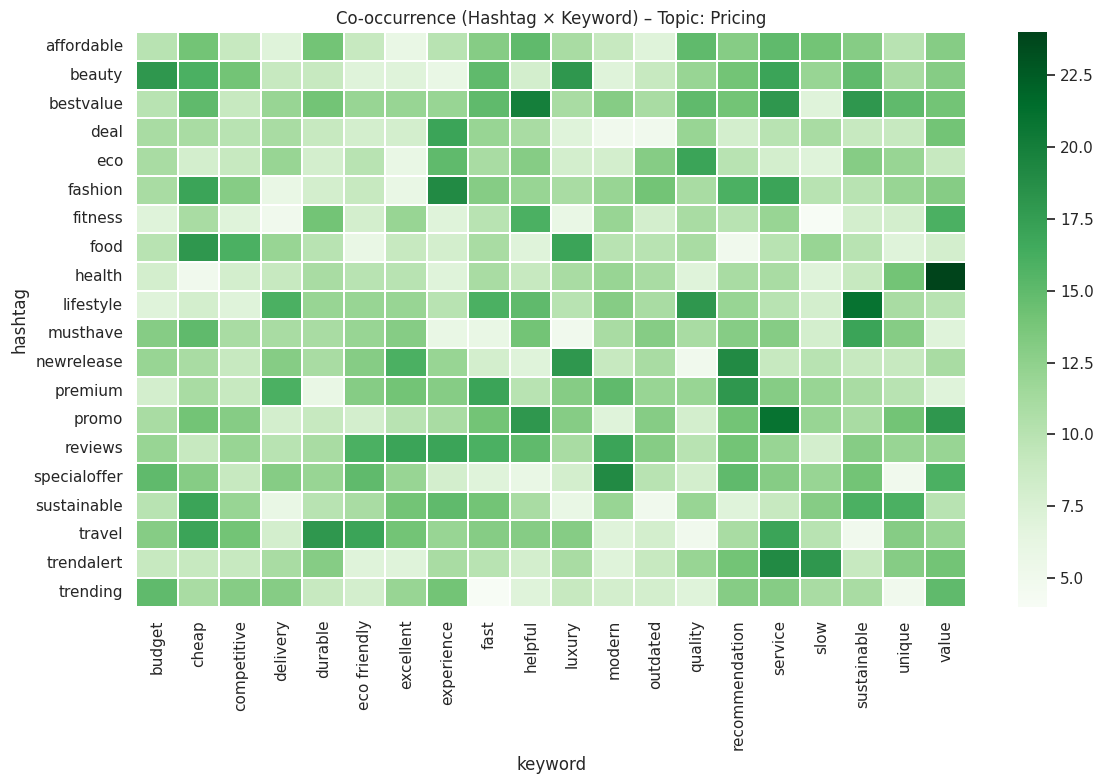

Saved -> outputs/figures/cooc_hashtag_keyword_topic_Returns.png


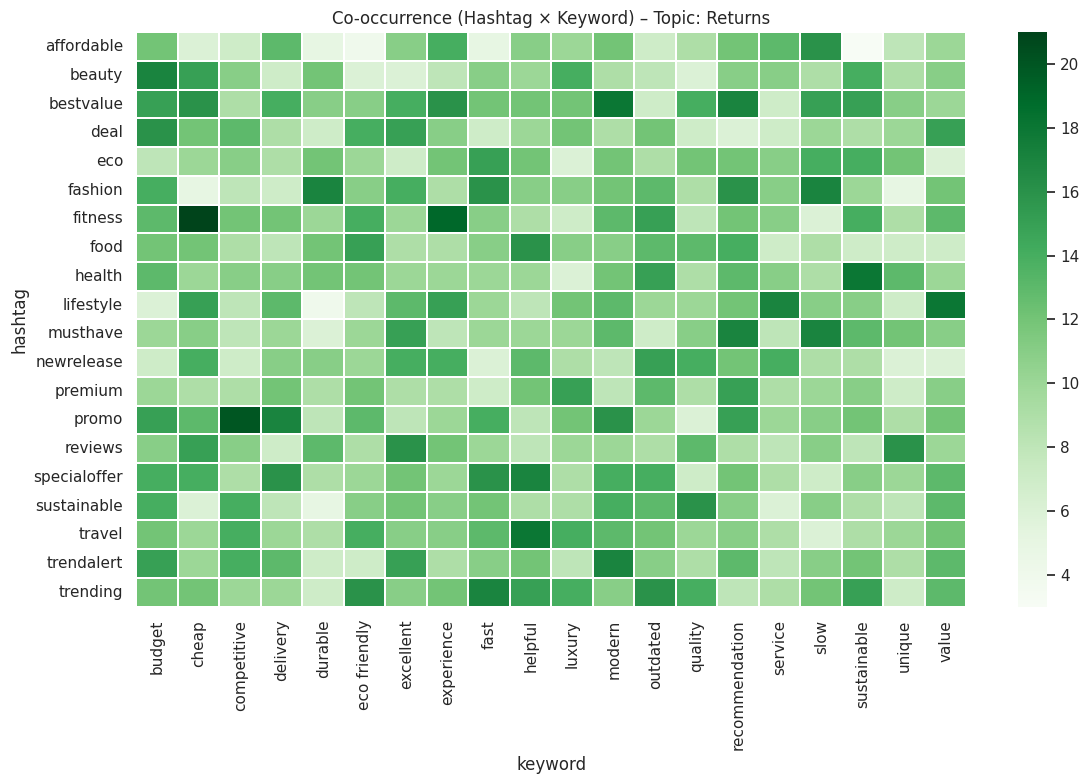

Saved -> outputs/figures/cooc_hashtag_keyword_topic_Product.png


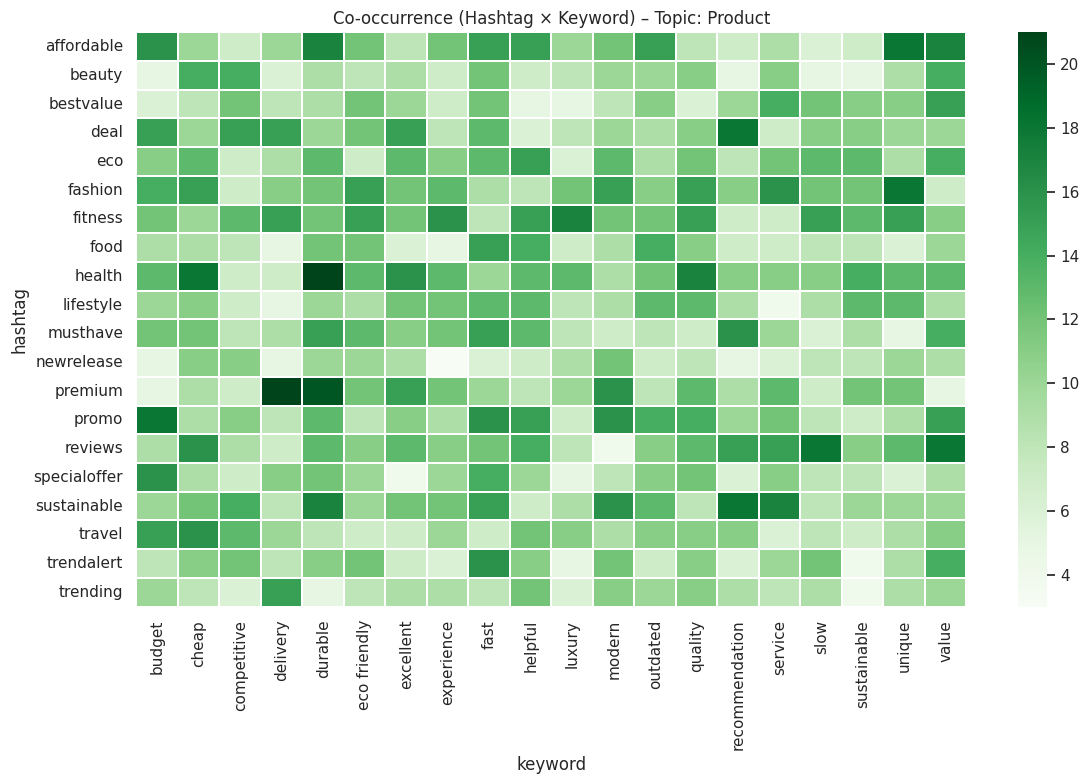

Saved -> outputs/figures/cooc_hashtag_keyword_topic_Delivery.png


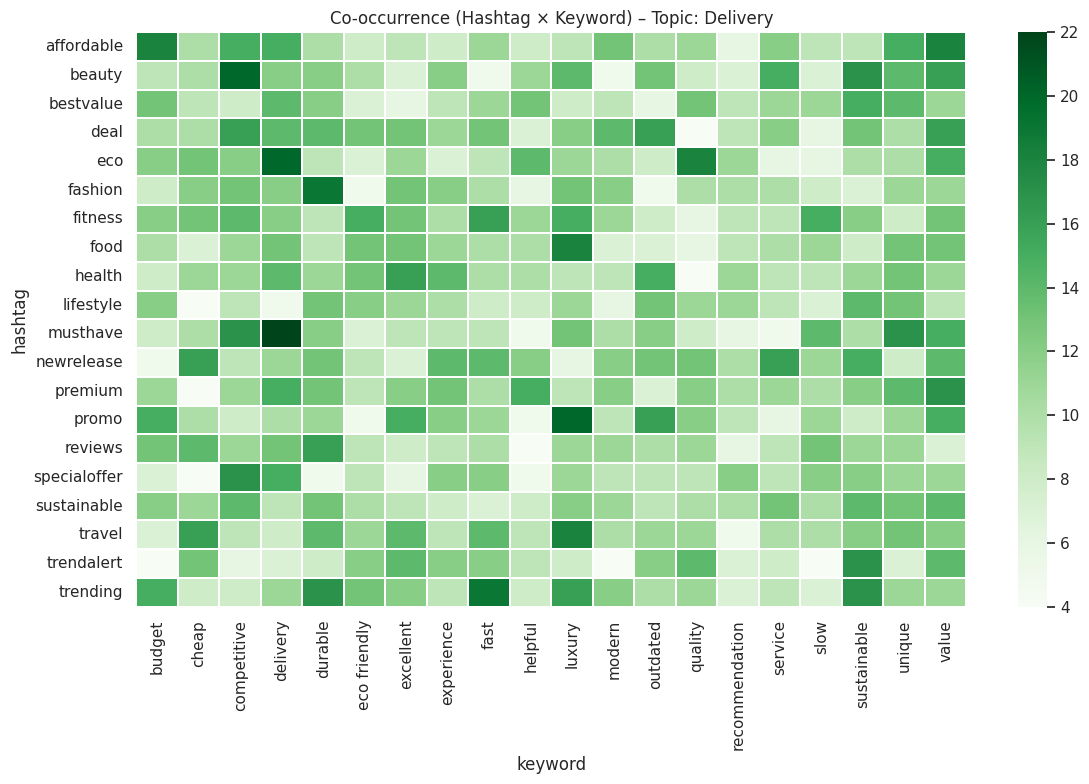

Saved -> outputs/figures/cooc_hashtag_keyword_topic_Marketing.png


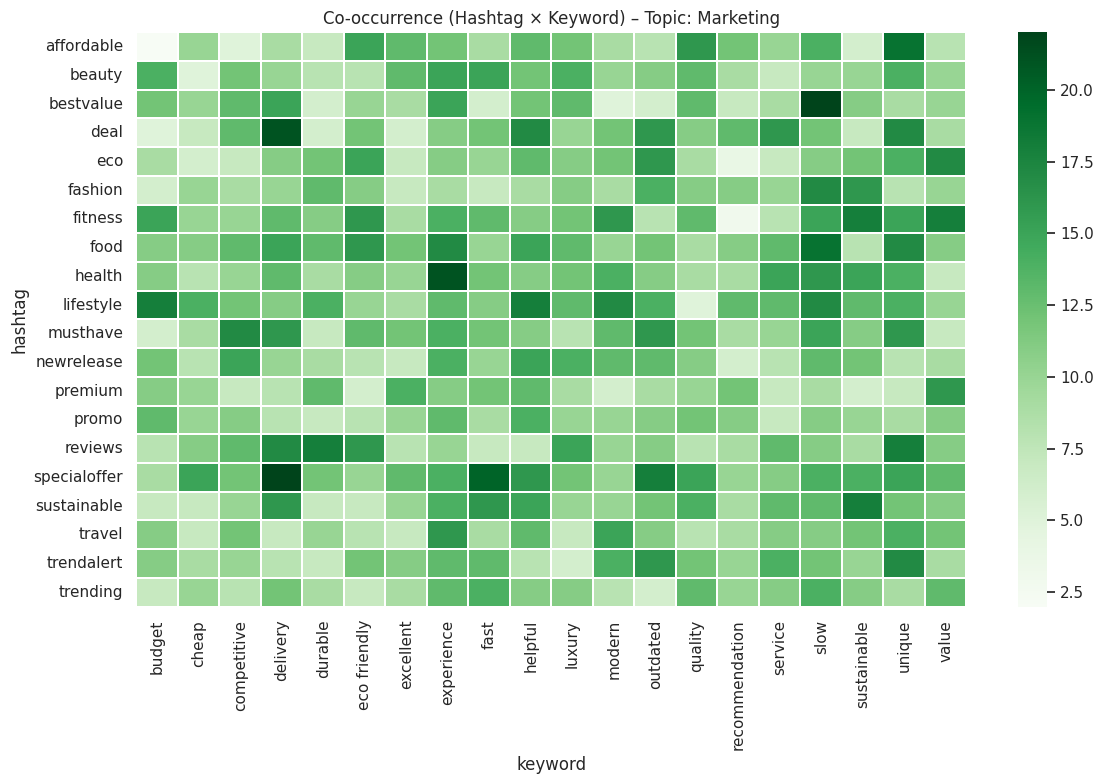

Saved -> outputs/figures/cooc_hashtag_keyword_topic_Support.png


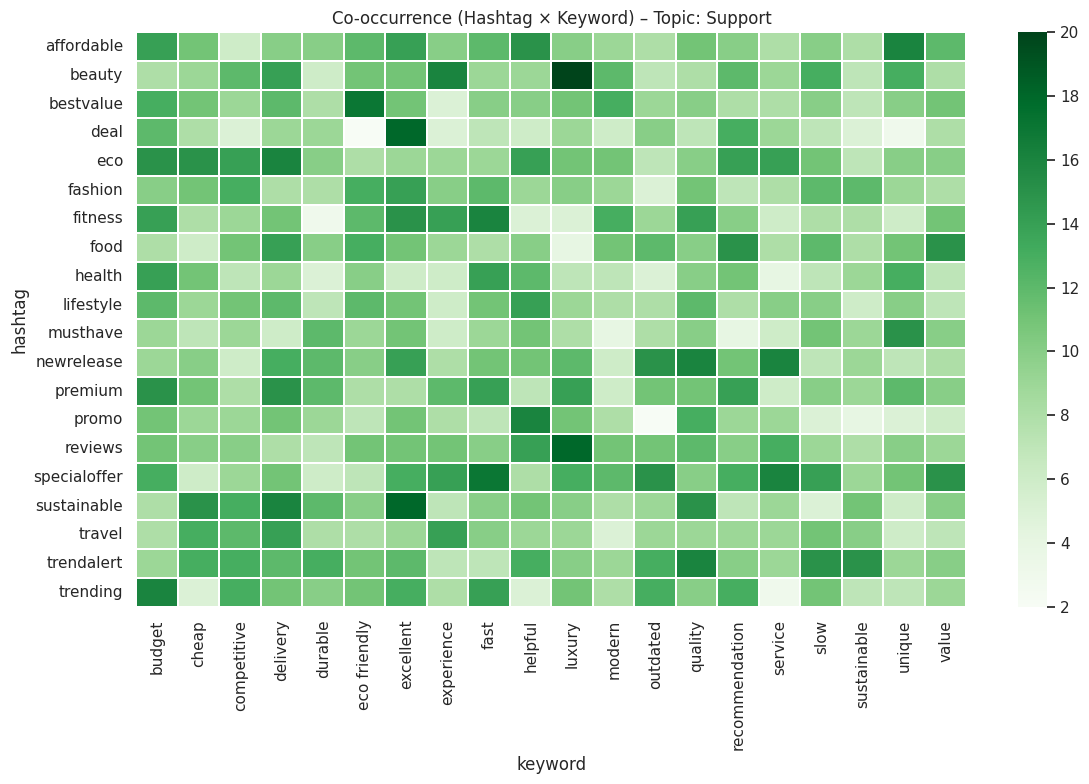

In [ ]:
# HK8 — Đồng xuất hiện Hashtag × Keyword (trong cùng bài) theo Topic (tuỳ chọn)
# ===== HK8: Hashtag × Keyword co-occurrence (optional) =====
# Tạo bảng đồng xuất hiện: trong cùng bài, 1 hashtag và 1 keyword (theo topic)
# Giới hạn top để nhẹ
TOP_H = 20; TOP_K = 20

# Lấy index bài với list đã chuẩn
posts = df[[topic_col, METRIC, '_hashtags_list','_keywords_list']].copy()
# Mở rộng thành các cặp (h, k) cho mỗi bài
pairs = []
for _, r in posts.iterrows():
    hs = r['_hashtags_list'] or []
    ks = r['_keywords_list'] or []
    if not hs or not ks:
        continue
    # giới hạn top toàn cục trước để nhẹ
    pairs.extend([(r[topic_col], h, k) for h in hs for k in ks])

if pairs:
    pairs_df = pd.DataFrame(pairs, columns=[topic_col,'hashtag','keyword'])
    # lọc theo top global để heatmap gọn
    topH = pairs_df['hashtag'].value_counts().head(TOP_H).index
    topK = pairs_df['keyword'].value_counts().head(TOP_K).index
    pairs_top = pairs_df[pairs_df['hashtag'].isin(topH) & pairs_df['keyword'].isin(topK)]

    for tpc in df[topic_col].dropna().unique():
        sub = pairs_top[pairs_top[topic_col]==tpc]
        if sub.empty:
            continue
        co = pd.crosstab(sub['hashtag'], sub['keyword'])
        plt.figure(figsize=(12, max(5, 0.4*len(co))))
        sns.heatmap(co, cmap="Greens", linewidths=.3)
        plt.title(f"Co-occurrence (Hashtag × Keyword) – Topic: {tpc}")
        savefig(f"cooc_hashtag_keyword_topic_{tpc}.png")
        plt.show()
else:
    print("Không đủ dữ liệu để tạo co-occurrence hashtag × keyword.")

In [ ]:
# HK9 — Xuất bảng tổng hợp cho BI (CSV)
# ===== HK9: Export compact BI tables =====
# 1) Top hashtag per topic (count & median metric)
top_h_topic = (h.groupby([topic_col,'hashtag'])
                 .agg(n=('hashtag','count'), med=(METRIC,'median'))
                 .reset_index()
                 .sort_values([topic_col,'n'], ascending=[True,False]))
top_h_topic.to_csv("outputs/tables/top_hashtags_by_topic.csv", index=False)

# 2) Top keyword per topic
top_k_topic = (k.groupby([topic_col,'keyword'])
                 .agg(n=('keyword','count'), med=(METRIC,'median'))
                 .reset_index()
                 .sort_values([topic_col,'n'], ascending=[True,False]))
top_k_topic.to_csv("outputs/tables/top_keywords_by_topic.csv", index=False)

print("Saved -> top_hashtags_by_topic.csv & top_keywords_by_topic.csv")

Saved -> top_hashtags_by_topic.csv & top_keywords_by_topic.csv
